In [78]:
#Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.graph_objects as go
from matplotlib.pyplot import figure

In [79]:
#importing database of stock data
googl_data = pd.read_csv('C:/Users/Jonat/Desktop/Springboard/Data/Data/Data/GOOGL/GOOGL.csv',parse_dates=['Date'],index_col='Date')

In [80]:
#checking data
googl_data.info(),googl_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4020 entries, 2004-08-19 to 2020-08-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4020 non-null   float64
 1   High       4020 non-null   float64
 2   Low        4020 non-null   float64
 3   Close      4020 non-null   float64
 4   Adj Close  4020 non-null   float64
 5   Volume     4020 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 219.8 KB


(None,
 Open         0
 High         0
 Low          0
 Close        0
 Adj Close    0
 Volume       0
 dtype: int64)

In [81]:
#renaming
df = googl_data

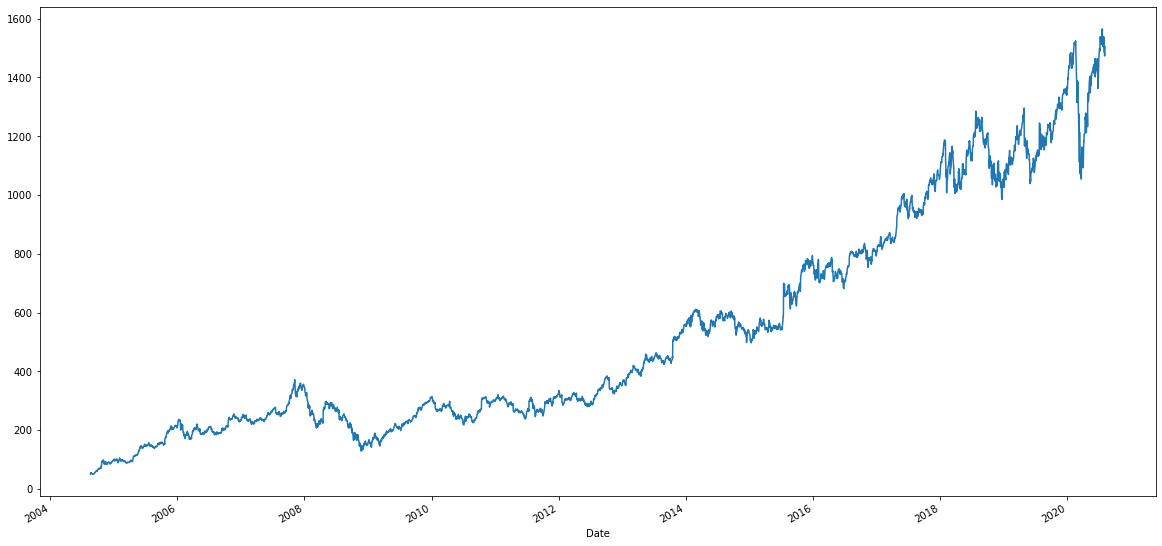

In [82]:
#Plot of data 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
df['Adj Close'].plot(ax=ax)

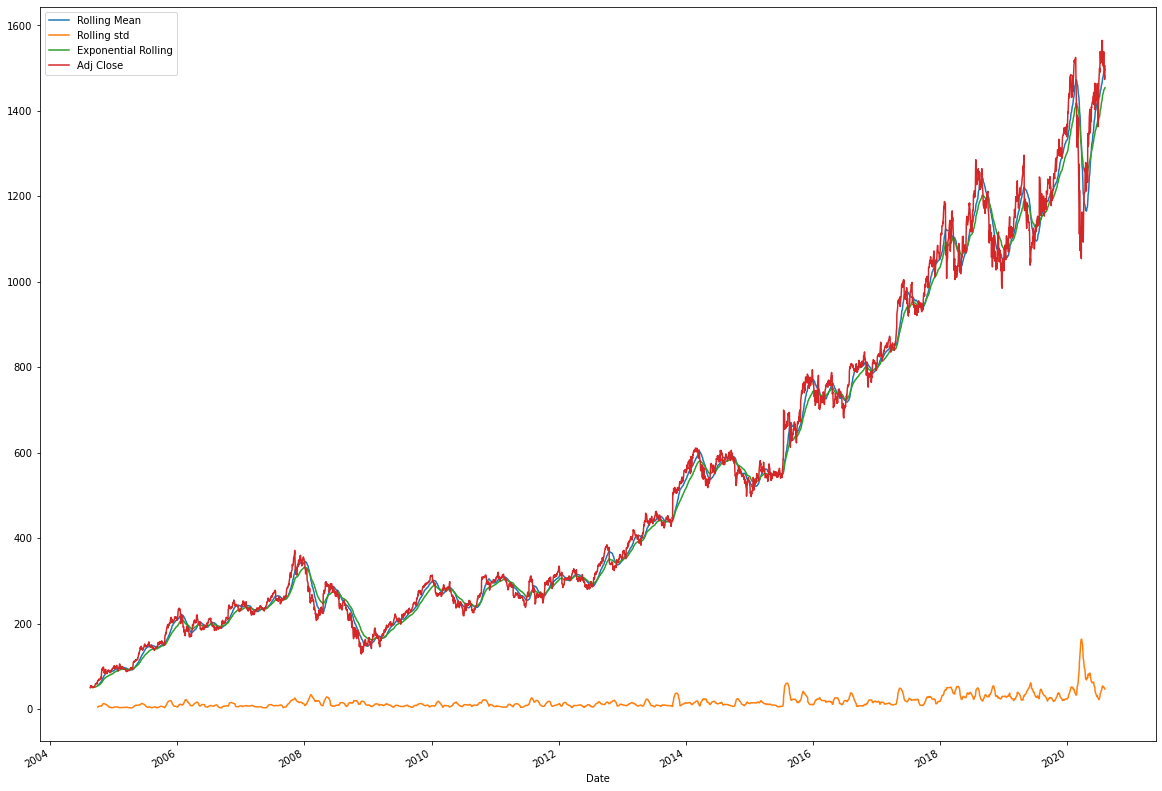

In [83]:
#Rolling data,std,mean and exponential rolling mean of data over a 30day period 
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
df['Adj Close'].rolling(30).mean().plot(ax=ax,label='Rolling Mean')
df['Adj Close'].rolling(30).std().plot(ax=ax,label='Rolling std')
df['Adj Close'].ewm(30,adjust=False).mean().plot(ax=ax,label='Exponential Rolling')
df['Adj Close'].plot(ax=ax,label='Adj Close')
plt.legend()

In [84]:
#normalizing
df['Open'] = df['Open']/df['Open'].iloc[0]-1
df['High'] = df['High']/df['High'].iloc[0]-1
df['Low'] = df['Low']/df['Low'].iloc[0]-1
df['Close'] = df['Close']/df['Close'].iloc[0]-1
df['Adj Close'] = df['Adj Close']/df['Adj Close'].iloc[0]-1
df['Volume'] = df['Volume']/df['Volume'].iloc[0]-1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000282CB6CA430>,
      dtype=object)

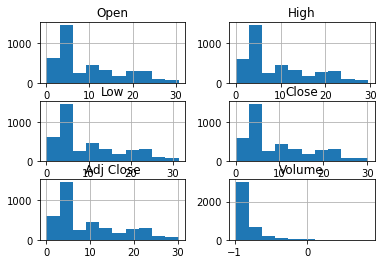

In [85]:
df.hist()

In [86]:
#Creating functions of indicators to add to data frame to check which ones are best for predicting future stock price

In [87]:
from ta.momentum import RSIIndicator,AwesomeOscillatorIndicator,KAMAIndicator,PercentagePriceOscillator,PercentageVolumeOscillator
from ta.momentum import ROCIndicator,StochRSIIndicator,StochasticOscillator,TSIIndicator,UltimateOscillator
from ta.momentum import WilliamsRIndicator

In [88]:
rsi_indicator = RSIIndicator(close=df['Adj Close'])
awesome_oscillator_indicator = AwesomeOscillatorIndicator(high=df['High'],low=df['Low'])
kama_indicator = KAMAIndicator(close=df['Adj Close'])
percentage_price_oscillator_indicator = PercentagePriceOscillator(close=df['Adj Close'])
percentage_volume_oscillator_indicator = PercentageVolumeOscillator(volume=df['Volume'])
roc_indicator = ROCIndicator(close=df['Adj Close'])
stoch_rsi_indicator = StochRSIIndicator(close=df['Adj Close'])
stoch_rsi_oscillator_indicator = StochasticOscillator(high=df['High'],low=df['Low'],close=df['Adj Close'])
tsi_indicator = TSIIndicator(close=df['Adj Close'])
ultimate_oscillator_indicator = UltimateOscillator(high=df['High'],low=df['Low'],close=df['Adj Close'])
williams_r_indicator = WilliamsRIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'])

In [89]:
df['RSI'] = rsi_indicator.rsi()
df['Awesome Oscillator'] = awesome_oscillator_indicator.awesome_oscillator()
df['KAMA'] = kama_indicator.kama()
df['PPO'] = percentage_price_oscillator_indicator.ppo()
df['PVO'] = percentage_volume_oscillator_indicator.pvo()
df['ROC'] = roc_indicator.roc()
df['Stoch RSI In'] = stoch_rsi_indicator.stochrsi()
df['Stoch RSI OS'] = stoch_rsi_oscillator_indicator.stoch()
df['TSI'] = tsi_indicator.tsi()
df['Ult Osc'] = ultimate_oscillator_indicator.ultimate_oscillator()
df['Williams R'] = williams_r_indicator.williams_r() 

In [90]:
from ta.trend import MACD, ADXIndicator, AroonIndicator,CCIIndicator,DPOIndicator
from ta.trend import EMAIndicator,IchimokuIndicator,KSTIndicator,MassIndex,PSARIndicator
from ta.trend import STCIndicator,TRIXIndicator,VortexIndicator,WMAIndicator

In [91]:
macd_indicator = MACD(df['Adj Close'])
adx_indicator = ADXIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'])
aroon_indicator = AroonIndicator(close=df['Adj Close'])
cci_indicator = CCIIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'])
dpo_indicator = DPOIndicator(close=df['Adj Close'])
ema_indicator = EMAIndicator(close=df['Adj Close'])
ichimoku_indicator = IchimokuIndicator(high=df['High'],low=df['Low'])
kst_indicator = KSTIndicator(close=df['Adj Close'])
mass_indicator = MassIndex(high=df['High'],low=df['Low'])
psar_indicator = PSARIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'])
stc_indicator = STCIndicator(close=df['Adj Close'])
trix_indicator = TRIXIndicator(close=df['Adj Close'])
vortex_indicator = VortexIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'])
wma_indicator = WMAIndicator(close=df['Adj Close'])

In [92]:
df['MACD'] = macd_indicator.macd()
df['ADX'] = adx_indicator.adx()
df['Aroon'] = aroon_indicator.aroon_indicator()
df['CCI'] = cci_indicator.cci()
df['DPO'] = dpo_indicator.dpo()
df['EMA'] = ema_indicator.ema_indicator()
df['Ichimoku Base'] = ichimoku_indicator.ichimoku_base_line() 
df['Ichimoku CL'] = ichimoku_indicator.ichimoku_conversion_line()
df['KST'] = kst_indicator.kst()
df['MASS'] = mass_indicator.mass_index() 
df['PSAR'] = psar_indicator.psar()
df['STC'] = stc_indicator.stc()
df['TRIX'] = trix_indicator.trix() 
df['VI'] = vortex_indicator.vortex_indicator_diff()
df['WMA'] = wma_indicator.wma()

C:\Users\Jonat\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Jonat\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [93]:
from ta.volatility import BollingerBands,AverageTrueRange,DonchianChannel,KeltnerChannel,UlcerIndex

In [94]:
bollinger_band_indicator = BollingerBands(close=df['Adj Close'])
average_true_range_indicator = AverageTrueRange(high=df['High'],low=df['Low'],close=df['Adj Close'])
donchain_channel_indicator = DonchianChannel(high=df['High'],low=df['Low'],close=df['Adj Close'])
keltner_channel_indicator = KeltnerChannel(high=df['High'],low=df['Low'],close=df['Adj Close'])
ulcer_indicator = UlcerIndex(close=df['Adj Close'])

In [95]:
df['Bollinger Avg'] = bollinger_band_indicator.bollinger_mavg()
df['Bollinger High'] = bollinger_band_indicator.bollinger_hband()
df['Bollinger Low'] = bollinger_band_indicator.bollinger_lband()
df['ATR'] = average_true_range_indicator.average_true_range()
df['Donchain Mid'] = donchain_channel_indicator.donchian_channel_mband()
df['Donchain High'] = donchain_channel_indicator.donchian_channel_hband()
df['Donchain Low'] = donchain_channel_indicator.donchian_channel_lband()
df['Keltner Mid'] = keltner_channel_indicator.keltner_channel_mband()
df['Keltner High'] = keltner_channel_indicator.keltner_channel_hband()
df['Keltner Low'] = keltner_channel_indicator.keltner_channel_lband()
df['Ulcer'] = ulcer_indicator.ulcer_index()

In [96]:
from ta.volume import OnBalanceVolumeIndicator,AccDistIndexIndicator,ChaikinMoneyFlowIndicator,EaseOfMovementIndicator,ForceIndexIndicator
from ta.volume import MFIIndicator,NegativeVolumeIndexIndicator,VolumePriceTrendIndicator,VolumeWeightedAveragePrice

In [97]:
on_balance_volume_indicator = OnBalanceVolumeIndicator(close=df['Adj Close'],volume=df['Volume'])
acc_dist_indicator_indicator = AccDistIndexIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'],volume=df['Volume'])
chaikin_money_flow_indicator = ChaikinMoneyFlowIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'],volume=df['Volume'])
ease_movement_indicator = EaseOfMovementIndicator(high=df['High'],low=df['Low'],volume=df['Volume'])
rorce_index_indicator = ForceIndexIndicator(close=df['Adj Close'],volume=df['Volume'])
mfi_indicator = MFIIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'],volume=df['Volume'])
nvi_indicator = NegativeVolumeIndexIndicator(close=df['Adj Close'],volume=df['Volume'])
vpt_indicator = VolumePriceTrendIndicator(close=df['Adj Close'],volume=df['Volume'])
vwap_indicator = VolumeWeightedAveragePrice(high=df['High'],low=df['Low'],close=df['Adj Close'],volume=df['Volume'])

In [98]:
df['OBV'] = on_balance_volume_indicator.on_balance_volume() 
df['ADI'] = acc_dist_indicator_indicator.acc_dist_index()
df['CMF'] = chaikin_money_flow_indicator.chaikin_money_flow()
df['EoM'] = ease_movement_indicator.ease_of_movement()
df['FI'] = rorce_index_indicator.force_index()
df['MFI'] = mfi_indicator.money_flow_index()
#df['NVI'] = nvi_indicator.negative_volume_index()
df['VPT'] = vpt_indicator.volume_price_trend()
df['VWAP'] = vwap_indicator.volume_weighted_average_price()

In [99]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI,Awesome Oscillator,KAMA,PPO,...,Keltner Low,Ulcer,OBV,ADI,CMF,EoM,FI,MFI,VPT,VWAP
Date,,,,,,,,,,,,,,,,,,,,,
2004-08-19,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,-inf,NaN
2004-08-20,0.0101,0.048241,0.047311,0.079430,0.079430,-0.488697,NaN,NaN,NaN,NaN,...,0.028699,NaN,-0.488697,-33.267577,NaN,-9091.693754,NaN,NaN,-inf,NaN
2004-08-23,0.1075,0.090525,0.136411,0.090293,0.090293,-0.591211,NaN,NaN,NaN,NaN,...,0.069676,NaN,-1.079908,-33.864758,NaN,509858.033987,NaN,NaN,-inf,NaN
2004-08-24,0.1124,0.072458,0.079304,0.045147,0.045147,-0.658584,NaN,NaN,NaN,NaN,...,0.070377,NaN,-0.421324,-39.778292,NaN,-39070.095641,NaN,NaN,0.248436,NaN
2004-08-25,0.0496,0.037863,0.082534,0.056408,0.056408,-0.794250,NaN,NaN,NaN,NaN,...,0.077023,NaN,-1.215574,-39.913075,NaN,-88204.041635,NaN,NaN,0.131167,NaN


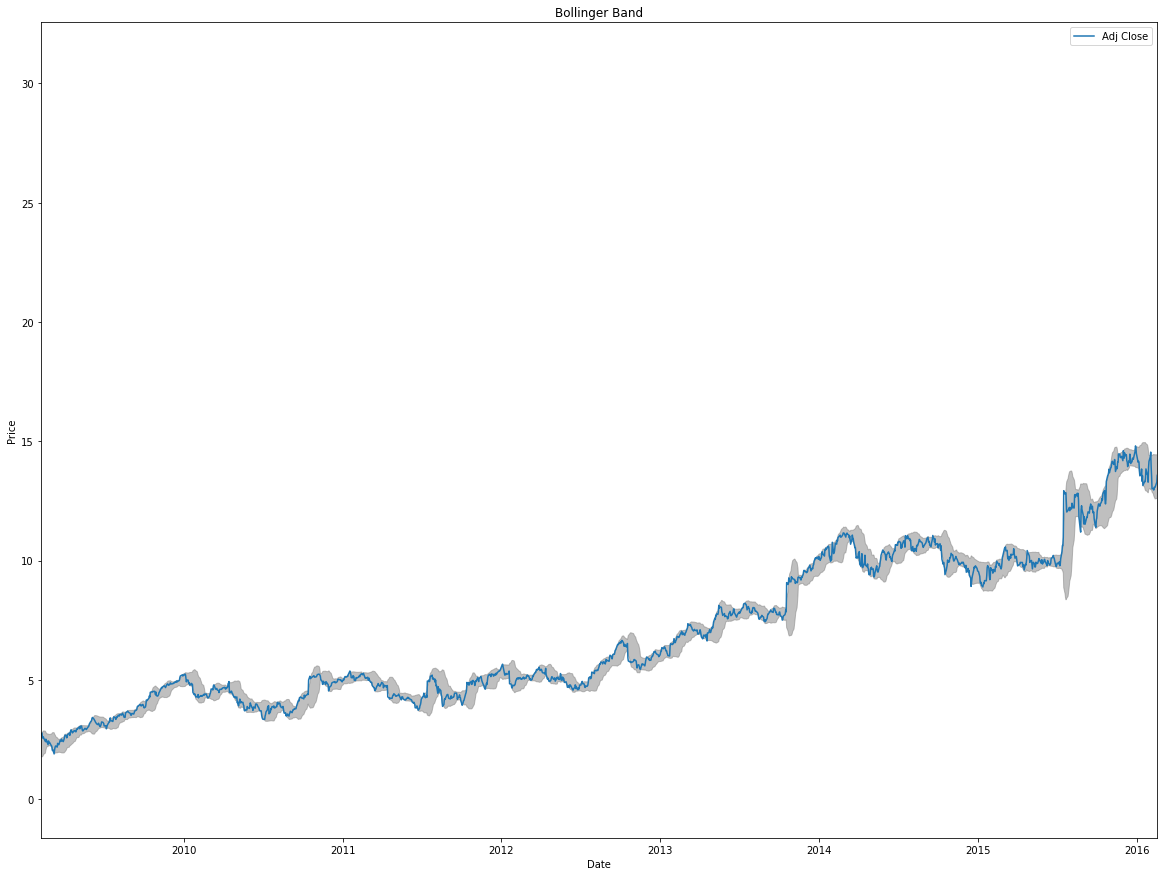

In [100]:
#Plotting Bollinger Band 
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
x_axis = df.index
plt.fill_between(x_axis,df['Bollinger High'],df['Bollinger Low'],color='grey',alpha=.5)
ax.plot(x_axis,df['Adj Close'],label='Adj Close')
ax.set_title('Bollinger Band')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.xaxis.zoom(3)
ax.legend()

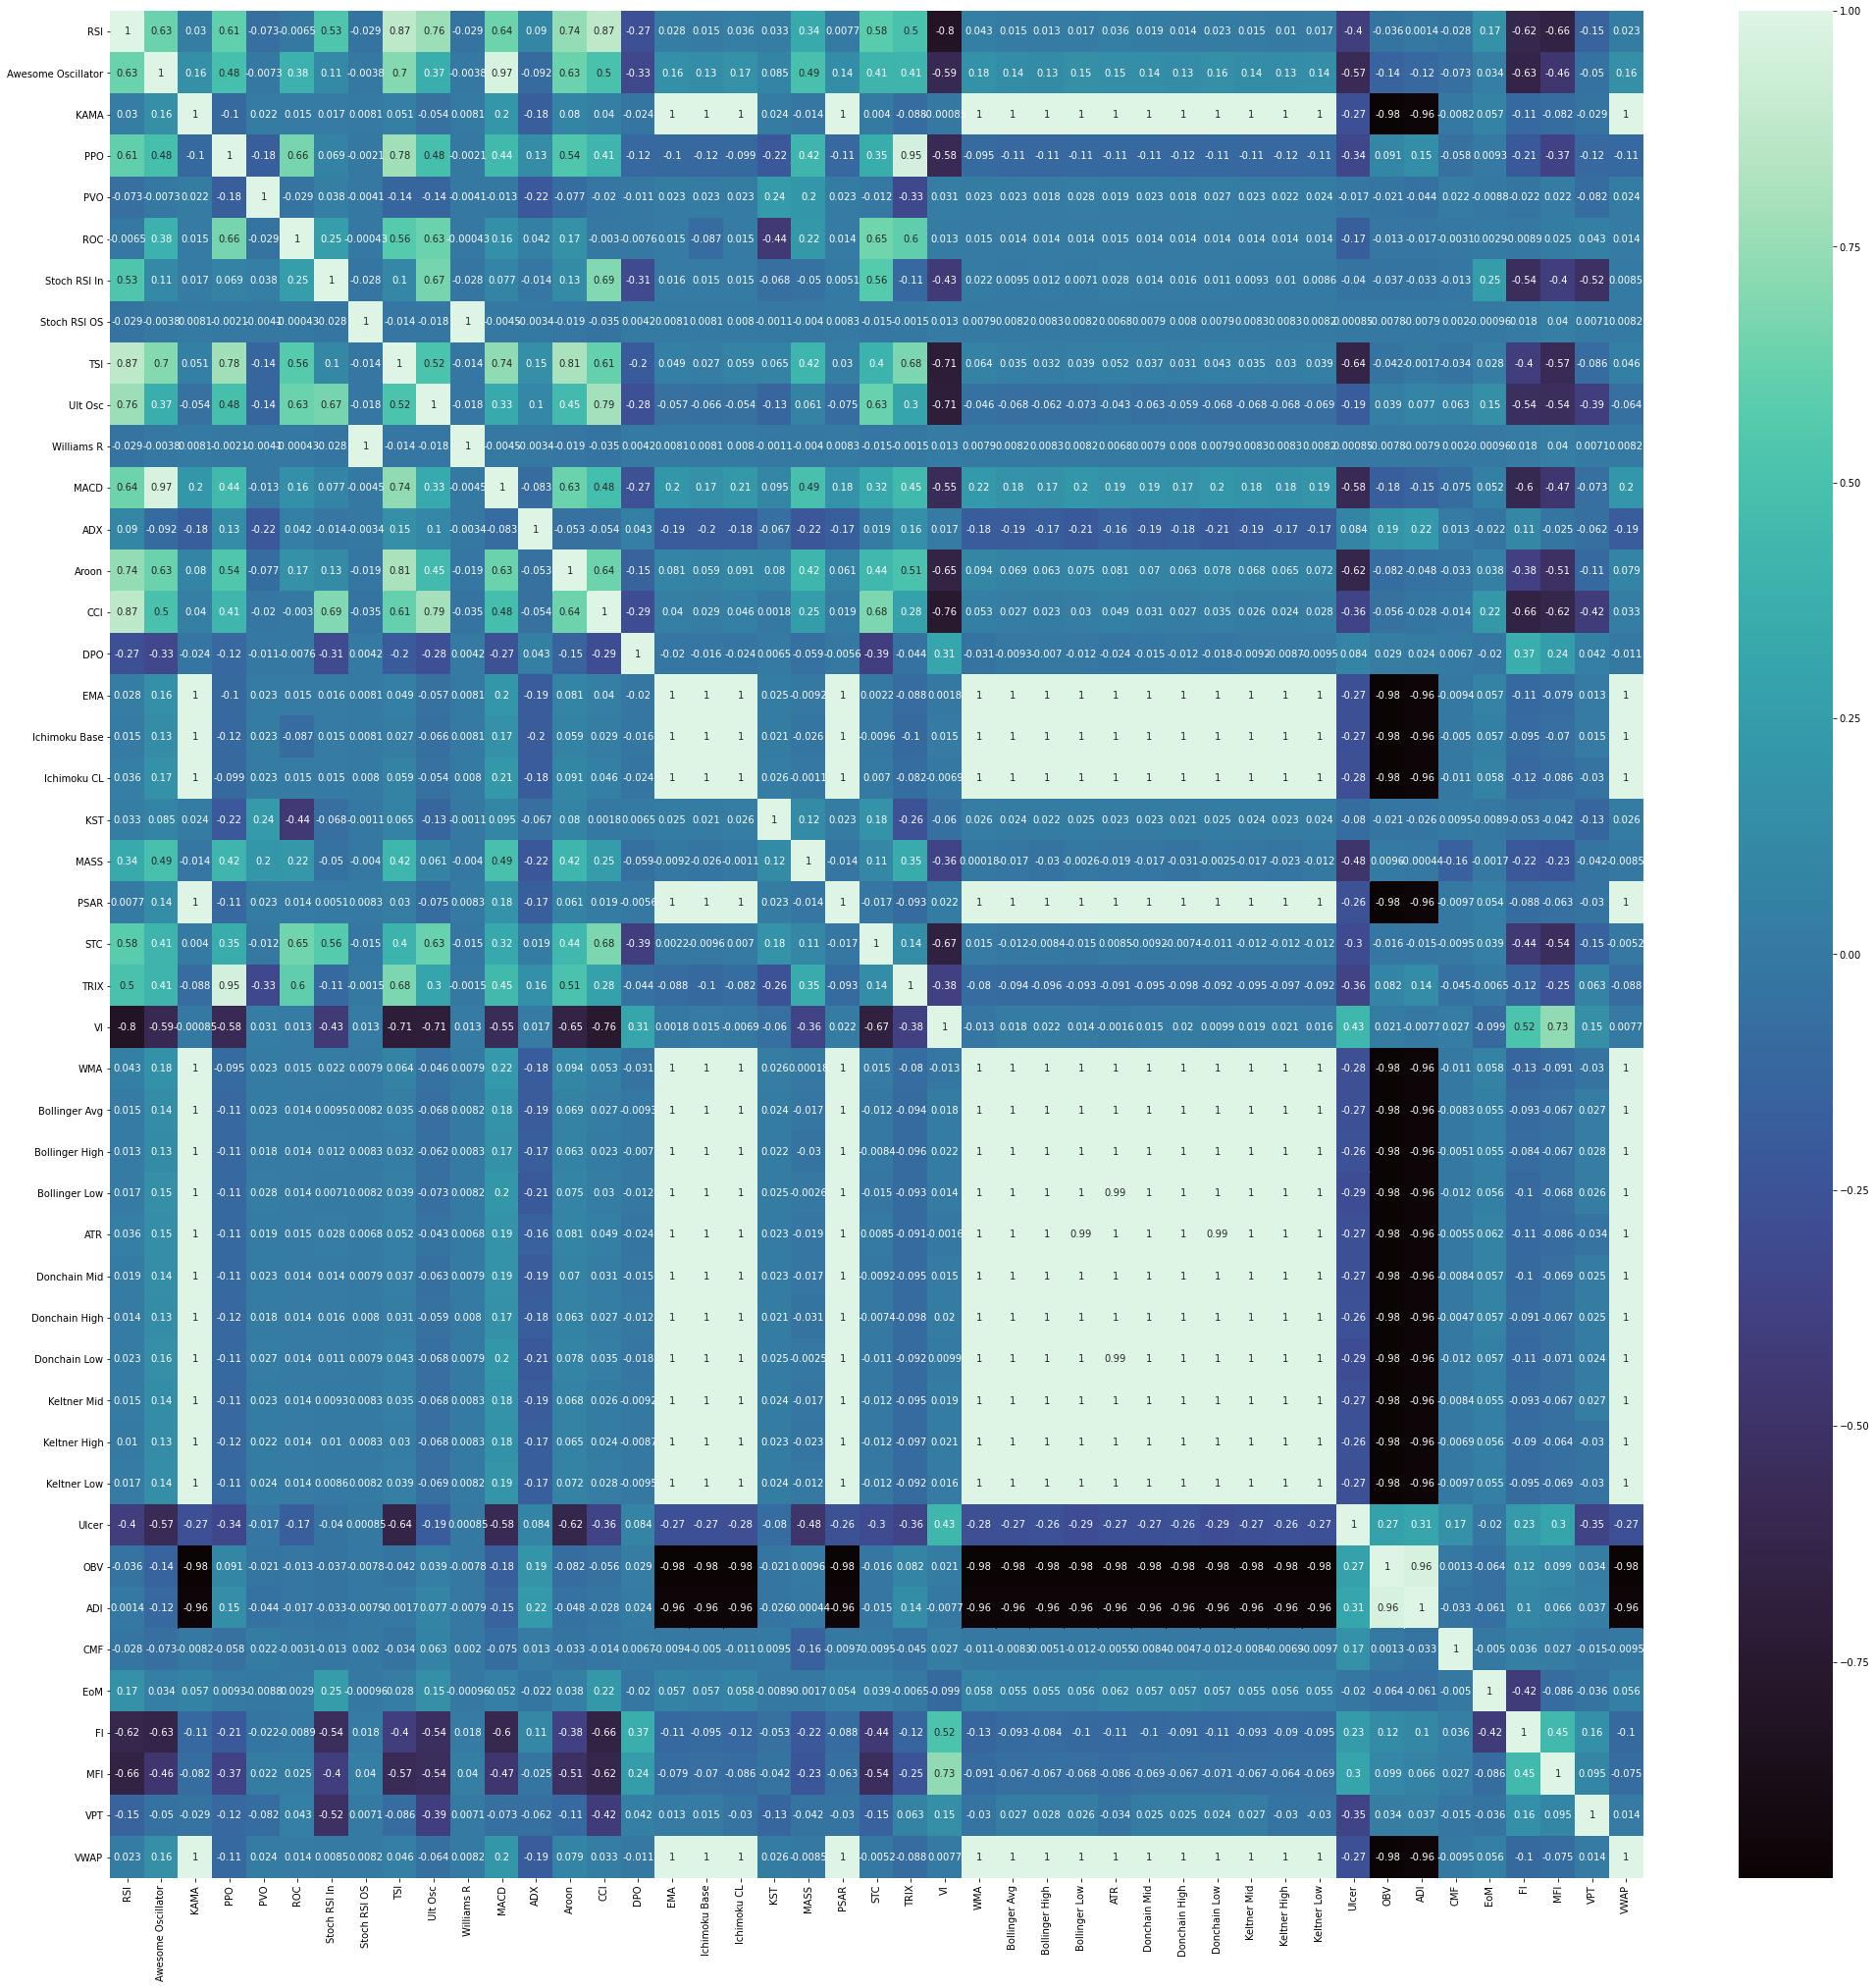

In [101]:
#Checking Corr
fig, ax = plt.subplots(figsize=(35,35))
sns.heatmap(df.drop(columns=['Open','Close','High','Low','Adj Close','Volume']).corr(),annot=True,cmap='mako')

In [102]:
#We will be predicting the next day price. We are shifting the data by 1 day
df['Adj Close Shift'] = df['Adj Close'].shift(-1)
df.dropna(inplace=True)

In [103]:
#Checking data before we split it into training and testing 
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3948 entries, 2004-11-30 to 2020-08-05
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                3948 non-null   float64
 1   High                3948 non-null   float64
 2   Low                 3948 non-null   float64
 3   Close               3948 non-null   float64
 4   Adj Close           3948 non-null   float64
 5   Volume              3948 non-null   float64
 6   RSI                 3948 non-null   float64
 7   Awesome Oscillator  3948 non-null   float64
 8   KAMA                3948 non-null   float64
 9   PPO                 3948 non-null   float64
 10  PVO                 3948 non-null   float64
 11  ROC                 3948 non-null   float64
 12  Stoch RSI In        3948 non-null   float64
 13  Stoch RSI OS        3948 non-null   float64
 14  TSI                 3948 non-null   float64
 15  Ult Osc             3948 non-null   f

,Open,High,Low,Close,Adj Close,Volume,RSI,Awesome Oscillator,KAMA,PPO,...,Ulcer,OBV,ADI,CMF,EoM,FI,MFI,VPT,VWAP,Adj Close Shift
Date,,,,,,,,,,,,,,,,,,,,,
2004-11-30,0.8071,0.758601,0.878387,0.813634,0.813634,-0.655510,59.376760,0.042434,0.784841,6.046950,...,20.190168,-11.962288,-49.817761,1.093280,265281.248044,-0.007233,32.974943,-0.018531,0.749826,0.793502
2004-12-01,0.8195,0.753796,0.871092,0.793502,0.793502,-0.648169,57.383357,0.055695,0.785235,6.008174,...,18.658772,-11.314118,-50.027104,1.071035,-109481.022346,-0.004335,35.389875,0.008484,0.761480,0.787921
2004-12-02,0.7990,0.744282,0.860671,0.787921,0.787921,-0.719895,56.813906,0.054463,0.785343,5.844640,...,18.383068,-10.594223,-50.207165,0.958414,-161147.110625,-0.003142,44.977180,0.021101,0.764710,0.797887
2004-12-03,0.7995,0.739958,0.850771,0.797887,0.797887,-0.737419,57.622635,0.047340,0.786927,5.749704,...,18.016088,-11.331642,-50.173588,0.885322,-106877.228776,-0.003743,52.993616,-0.004264,0.765764,0.756926
2004-12-06,0.7913,0.736498,0.834306,0.756926,0.756926,-0.720204,53.212079,0.033839,0.785627,5.180134,...,17.841905,-10.611438,-50.592947,0.533645,-135294.513831,0.001006,61.764353,0.027645,0.761983,0.708491


In [104]:
#Spliting the dta into training and testing
X = df.drop(columns=['Adj Close Shift','Open','High','Low','Close','Volume'])
y = df['Adj Close Shift']
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]

In [105]:
X_train_columns= X_train.columns
print(X.shape,y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3948, 46) (3948,)
(2763, 46)
(2763,)
(1185, 46)
(1185,)


R^2 Score: 0.9983933628082344
LM Mean Absolute Error: 0.2377038519290828
LM Mean Squared Error: 0.13731658614598952


Text(0, 0.5, 'y_pred')

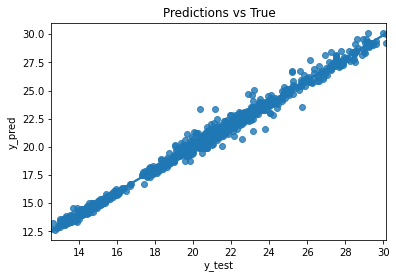

In [106]:
#OLS Linear Model
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
rModel = linear_model.LinearRegression()
rModel.fit(X_train,y_train)
y_pred = rModel.predict(X_test)
#R-Squared coefficent
r2 = rModel.score(X_train,y_train)
lm_mean_abs_error = mean_absolute_error(y_test,y_pred)
lm_mean_squared_error = mean_squared_error(y_test,y_pred)
print('R^2 Score:',r2)
print('LM Mean Absolute Error:',lm_mean_abs_error)
print('LM Mean Squared Error:',lm_mean_squared_error)
#check to see how prediction repersnt true results
sns.regplot(x=y_test,y=y_pred)
plt.title('Predictions vs True')
plt.xlabel('y_test')
plt.ylabel('y_pred')



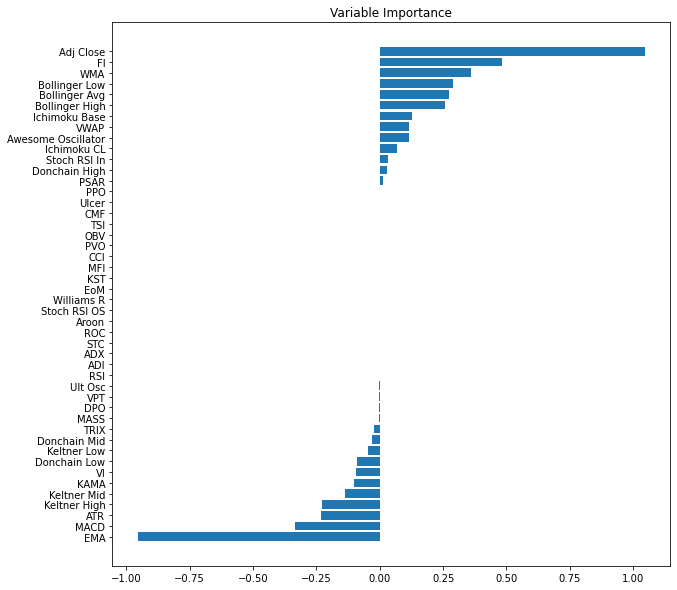

In [107]:
#Feature Importance
lm_imp = rModel.coef_
sorted_idx = np.argsort(lm_imp)
num_features = np.arange(sorted_idx.shape[0])

plt.figure(figsize=(10,10))
plt.barh(num_features,lm_imp[sorted_idx],align='center')
plt.yticks(num_features, X_train_columns[sorted_idx])
#plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.59207e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


R^2 Score: 0.9983856696846353
Ridge Mean Absolute Error: 0.2371861397572631
Ridge Mean Squared Error: 0.1355595060133529


Text(0, 0.5, 'y_pred_ridge')

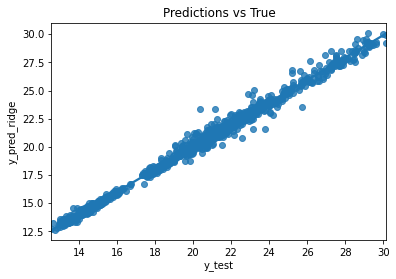

In [108]:
#Ridge Model
ridge_model = linear_model.Ridge()
ridge_model.fit(X_train,y_train)
y_pred_ridge = ridge_model.predict(X_test)
#R-Squared coefficent
r2 = ridge_model.score(X_train,y_train)
ridge_mean_abs_error = mean_absolute_error(y_test,y_pred_ridge)
ridge_mean_squared_error = mean_squared_error(y_test,y_pred_ridge)
print('R^2 Score:',r2)
print('Ridge Mean Absolute Error:',ridge_mean_abs_error)
print('Ridge Mean Squared Error:',ridge_mean_squared_error)
sns.regplot(x=y_test,y=y_pred_ridge)
plt.title('Predictions vs True')
plt.xlabel('y_test')
plt.ylabel('y_pred_ridge')




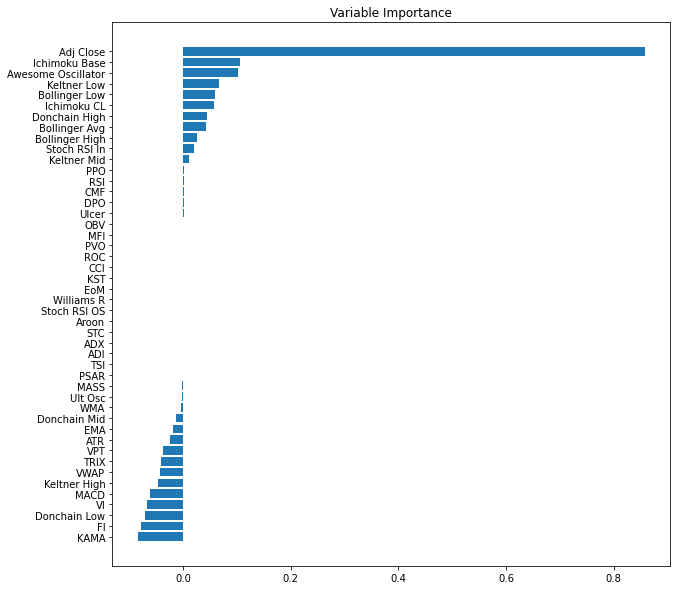

In [109]:
#Feature Importance
ridge_imp = ridge_model.coef_
sorted_idx = np.argsort(ridge_imp)
num_features = np.arange(sorted_idx.shape[0])

plt.figure(figsize=(10,10))
plt.barh(num_features,ridge_imp[sorted_idx],align='center')
plt.yticks(num_features, X_train_columns[sorted_idx])
#plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

random_grid = {'n_estimators':np.arange(1,5),'max_depth':np.arange(1,3)}
rfr = RandomForestRegressor(random_state=49)
rfr_cv = GridSearchCV(rfr,random_grid,cv=5)
rfr_cv.fit(X_train,y_train)

print("Best Parameters: " + str(rfr_cv.best_params_))

rfr = RandomForestRegressor(n_estimators = rfr_cv.best_params_['n_estimators'],max_depth = rfr_cv.best_params_['max_depth'],random_state=49)
rfr.fit(X_train,y_train)

y_pred_rfr = rfr.predict(X_test)

mean_abs_error = mean_absolute_error(y_test,y_pred_rfr)
mean_sqrd_error = mean_squared_error(y_test,y_pred_rfr)
print('R^2:',rfr.score(X_train,y_train))
print('Mean Absolute Error:',mean_abs_error)
print('Mean Squared Error:',mean_sqrd_error)



Best Parameters: {'max_depth': 2, 'n_estimators': 4}
R^2: 0.9272575943383043
Mean Absolute Error: 9.245747808717343
Mean Squared Error: 104.1192565272833


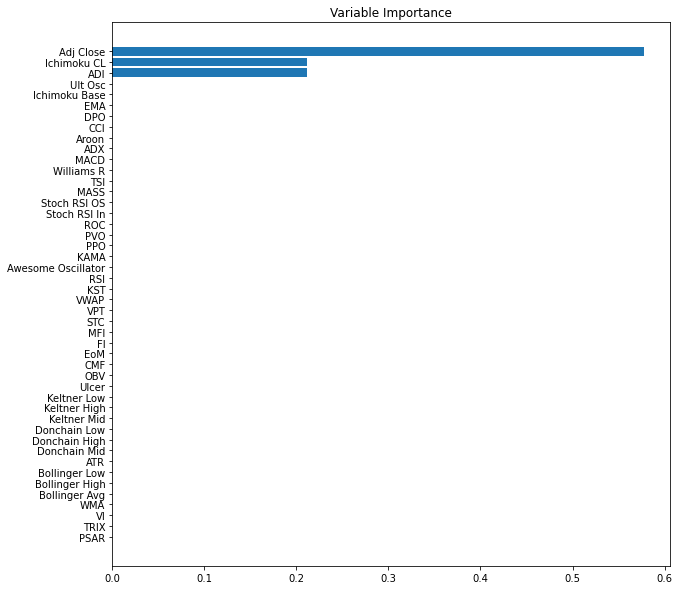

In [117]:
rfr_imp = rfr.feature_importances_
sorted_idx = np.argsort(rfr_imp)
num_features = np.arange(sorted_idx.shape[0])

plt.figure(figsize=(10,10))
plt.barh(num_features,rfr_imp[sorted_idx],align='center')
plt.yticks(num_features, X_train_columns[sorted_idx])
#plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Now we are going to make separate models for each Technical category and see which performs best and then see if mixing the best
does better

In [121]:
df_momentum = df[['Adj Close Shift','Adj Close','RSI','Awesome Oscillator','KAMA','PPO','PVO','ROC','Stoch RSI In','Stoch RSI OS','TSI','Ult Osc','Williams R']]

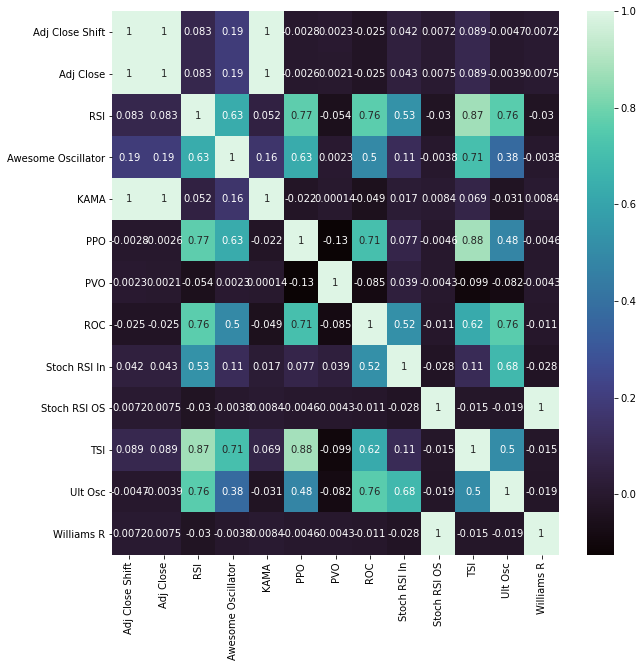

In [122]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_momentum.corr(),annot=True,cmap='mako')

In [123]:
#We can drop KAMA and Williams R as they have a perfect corr with other indicators
df_momentum.drop(columns=['KAMA','Williams R'],inplace=True)

C:\Users\Jonat\anaconda3\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [124]:
#Separating Data
X = df_momentum.drop(columns=['Adj Close Shift'])
y = df_momentum['Adj Close Shift']
X_train_columns = X.columns

R^2 Score: 0.9955172610521512
Mean Absolute Error: 0.07993607749212439
Mean Squared Error: 0.012873133934056565


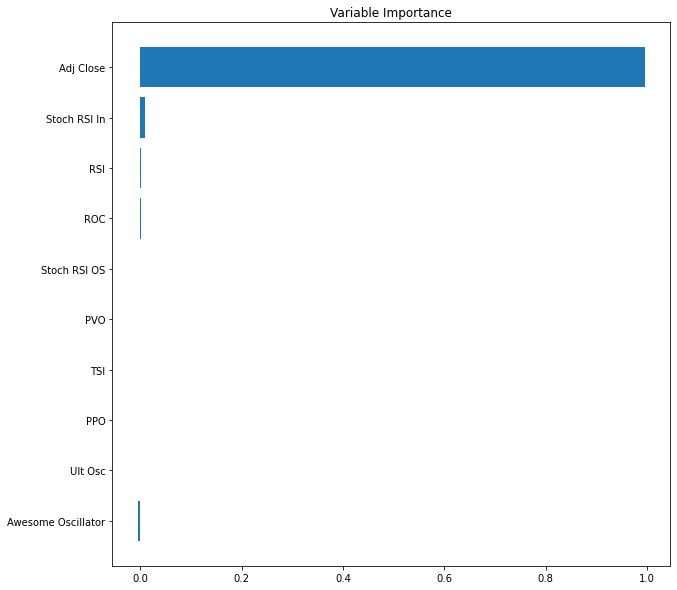

R^2 Score: 0.9939997032556461
Mean Absolute Error: 0.06649431551387691
Mean Squared Error: 0.009236961307013498


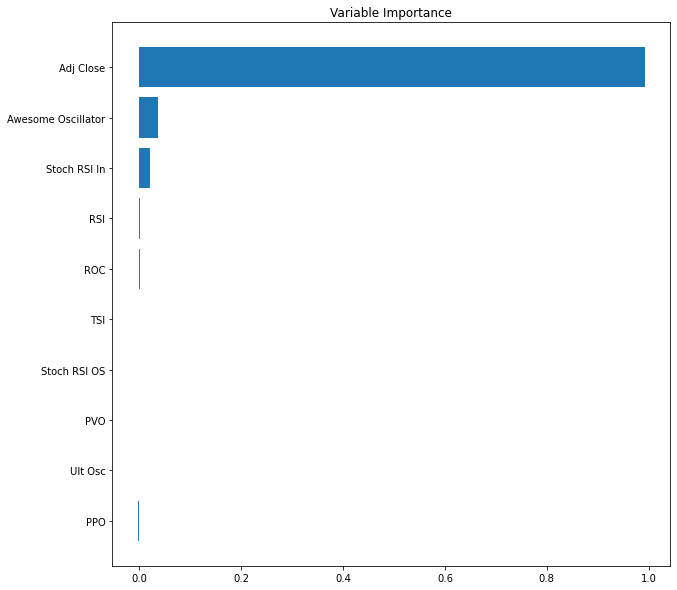

R^2 Score: 0.9943220300265506
Mean Absolute Error: 0.09793583495133144
Mean Squared Error: 0.019158094650791817


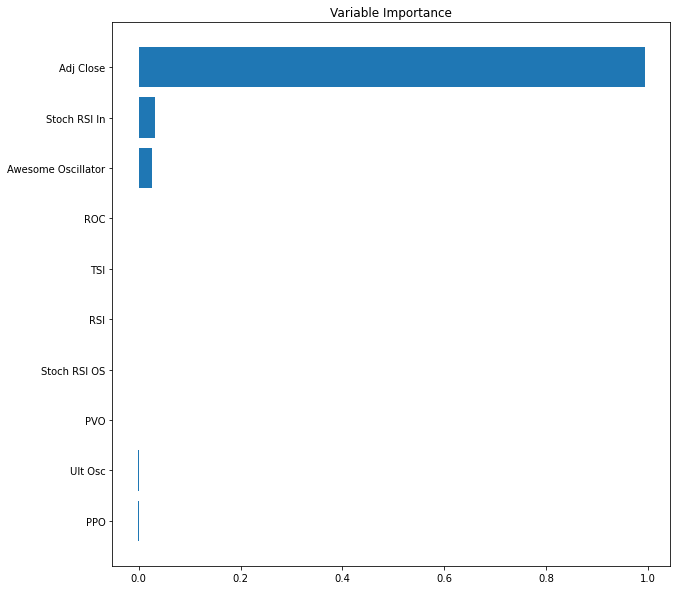

R^2 Score: 0.9983473930070554
Mean Absolute Error: 0.14220286459341816
Mean Squared Error: 0.04305640798248547


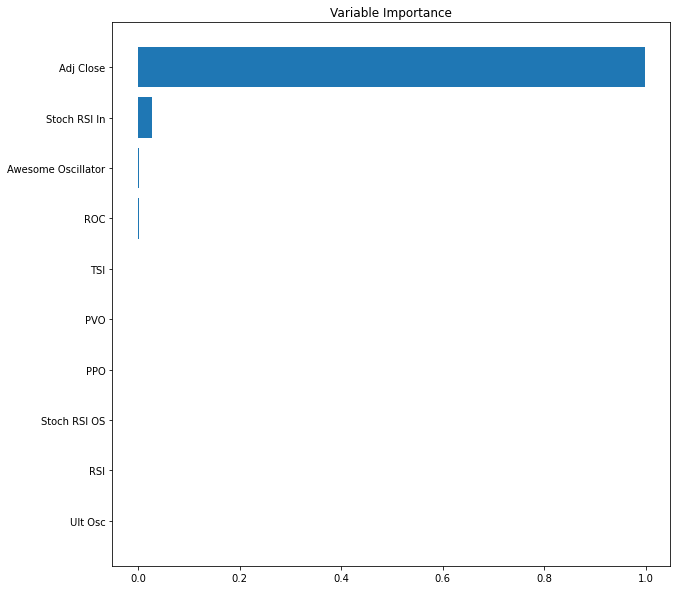

R^2 Score: 0.9992301420453885
Mean Absolute Error: 0.3122415659262558
Mean Squared Error: 0.2143351482799013


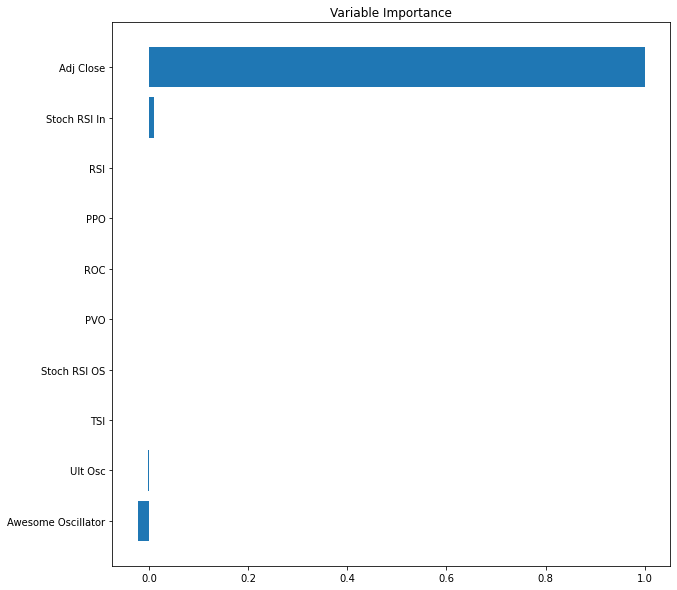

In [125]:
#OLS
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit()

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    
    rModel = linear_model.LinearRegression()
    rModel.fit(X_tr,y_tr)
    
    y_pred = rModel.predict(X_ts)
    
    r2 = rModel.score(X_tr,y_tr)
    mean_abs_error = mean_absolute_error(y_ts,y_pred)
    mean_sqr_error =  mean_squared_error(y_ts,y_pred)
    print('R^2 Score:',r2)
    print('Mean Absolute Error:',mean_abs_error)
    print('Mean Squared Error:',mean_sqr_error)

    lm_imp = rModel.coef_
    sorted_idx = np.argsort(lm_imp)
    num_features = np.arange(sorted_idx.shape[0])
    plt.figure(figsize=(10,10))
    plt.barh(num_features,lm_imp[sorted_idx],align='center')
    plt.yticks(num_features, X_train_columns[sorted_idx])
    plt.title('Variable Importance')
    plt.show()


Alpha is: 0.1
R^2 Score: 0.995517229161711
Mean Absolute Error: 0.0799314525455469
Mean Squared Error: 0.012868221332678037


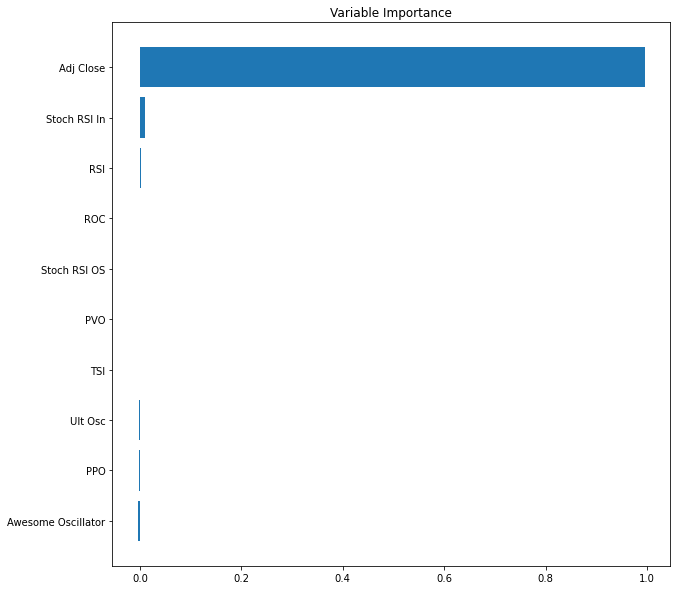

Alpha is: 1.0
R^2 Score: 0.995514189008628
Mean Absolute Error: 0.07992809713964545
Mean Squared Error: 0.01283769636934466


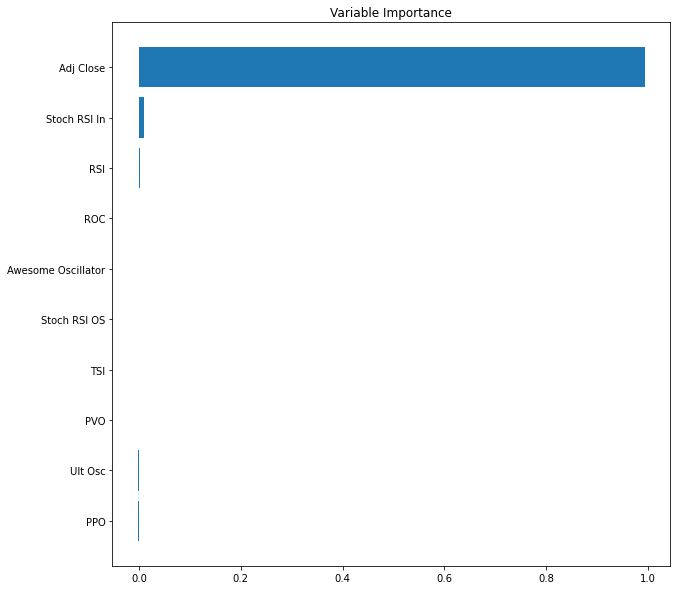

Alpha is: 10.0
R^2 Score: 0.9952393644339426
Mean Absolute Error: 0.08340426815382677
Mean Squared Error: 0.013505819077624777


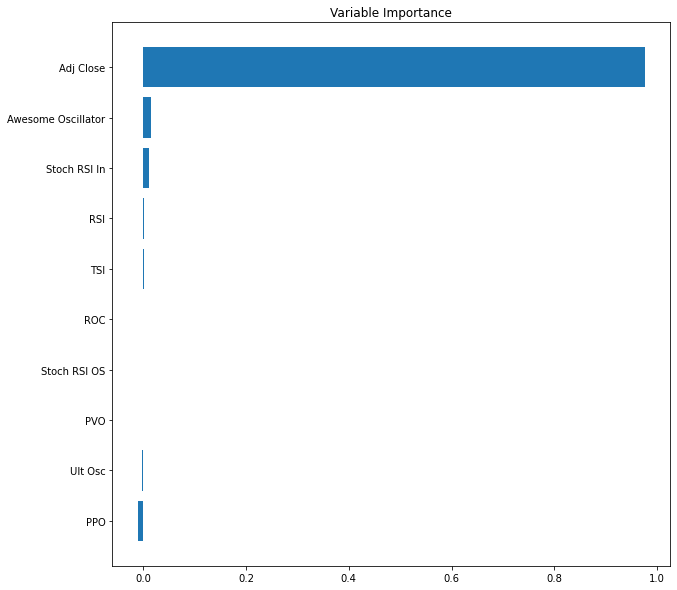

Alpha is: 0.1
R^2 Score: 0.9939997001395751
Mean Absolute Error: 0.06650663527193897
Mean Squared Error: 0.009238457367009319


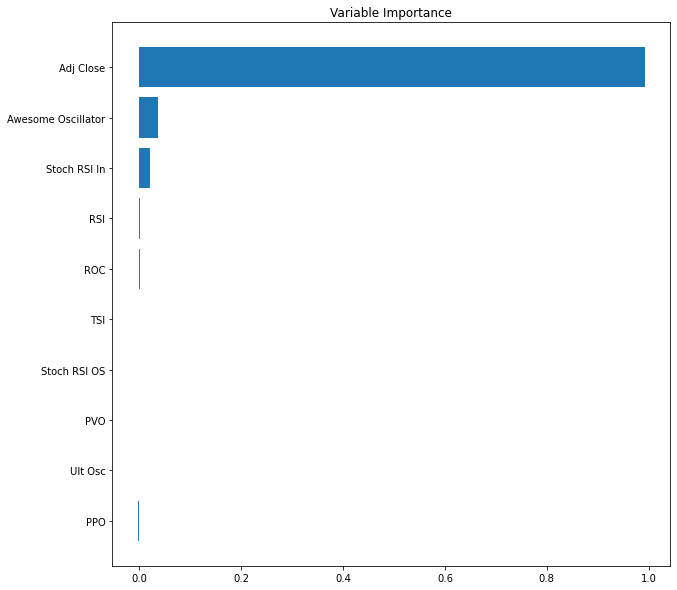

Alpha is: 1.0
R^2 Score: 0.9939993931779538
Mean Absolute Error: 0.06662310031935355
Mean Squared Error: 0.009252764033588377


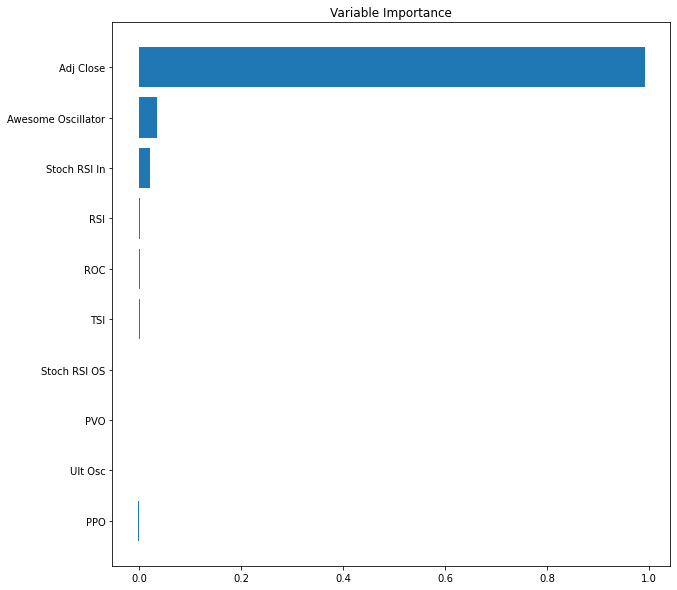

Alpha is: 10.0
R^2 Score: 0.993969608558082
Mean Absolute Error: 0.06825931330160961
Mean Squared Error: 0.009474824122879639


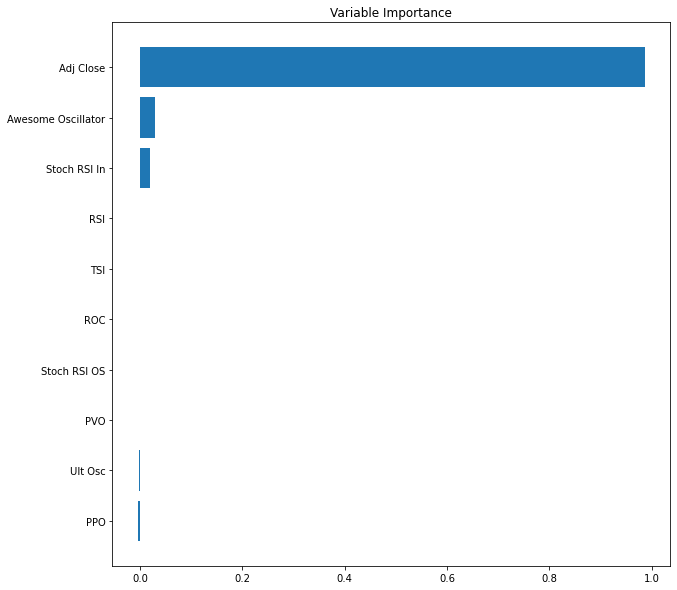

Alpha is: 0.1
R^2 Score: 0.9943220288687175
Mean Absolute Error: 0.09796221302901834
Mean Squared Error: 0.019167813006088566


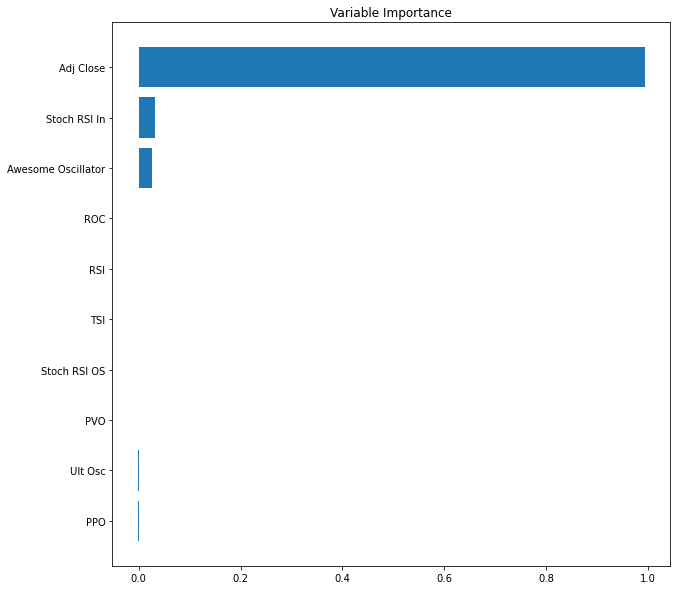

Alpha is: 1.0
R^2 Score: 0.9943219144405199
Mean Absolute Error: 0.09820755723508419
Mean Squared Error: 0.019258340127571442


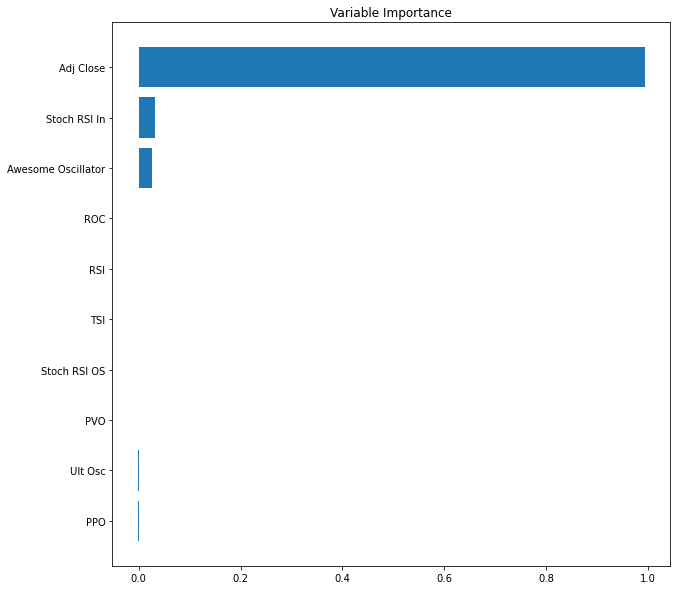

Alpha is: 10.0
R^2 Score: 0.9943106340581457
Mean Absolute Error: 0.10199312522628012
Mean Squared Error: 0.020465479398349508


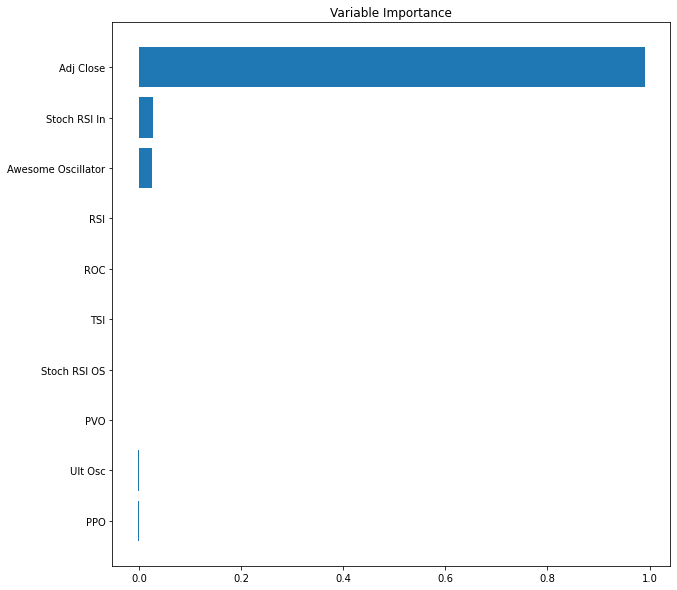

Alpha is: 0.1
R^2 Score: 0.9983473929662633
Mean Absolute Error: 0.14220931524403052
Mean Squared Error: 0.04305871010315952


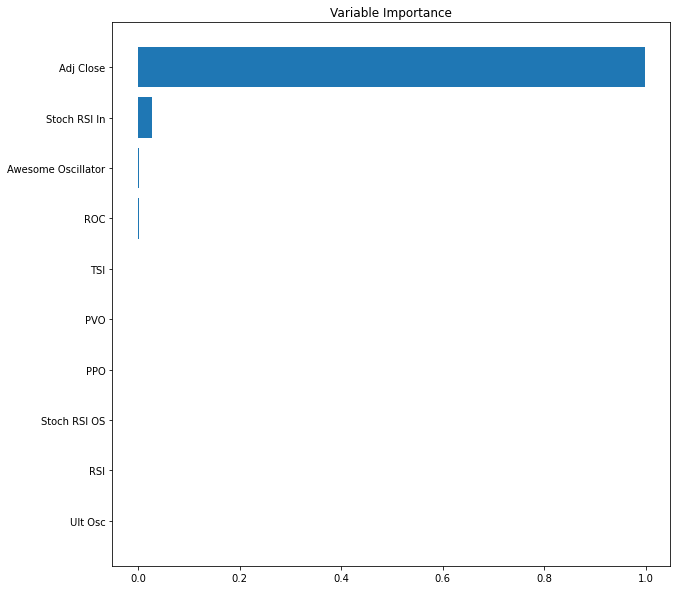

Alpha is: 1.0
R^2 Score: 0.9983473889571322
Mean Absolute Error: 0.1422687721952319
Mean Squared Error: 0.0430797239680232


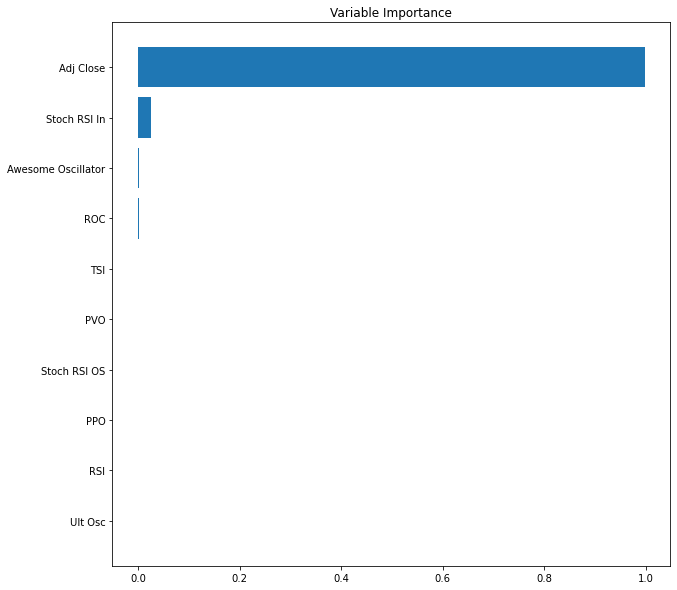

Alpha is: 10.0
R^2 Score: 0.998347010483616
Mean Absolute Error: 0.1429584607779874
Mean Squared Error: 0.04331928484552046


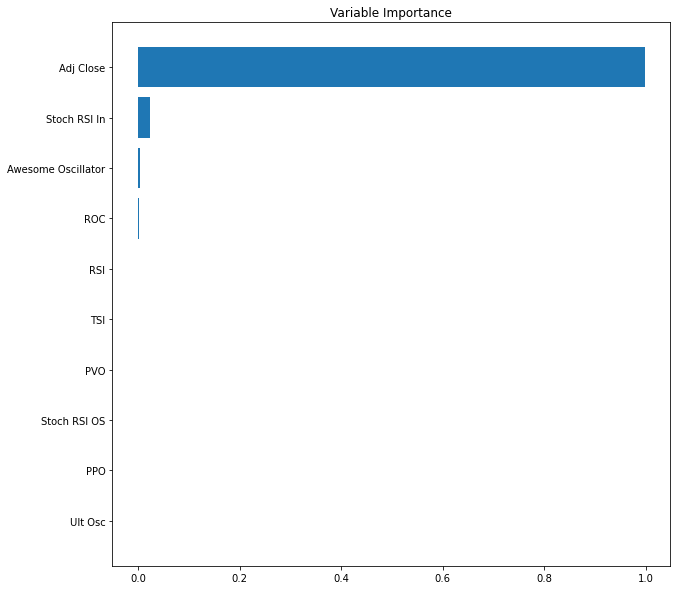

Alpha is: 0.1
R^2 Score: 0.9992301420417239
Mean Absolute Error: 0.312242059510771
Mean Squared Error: 0.21433323224970496


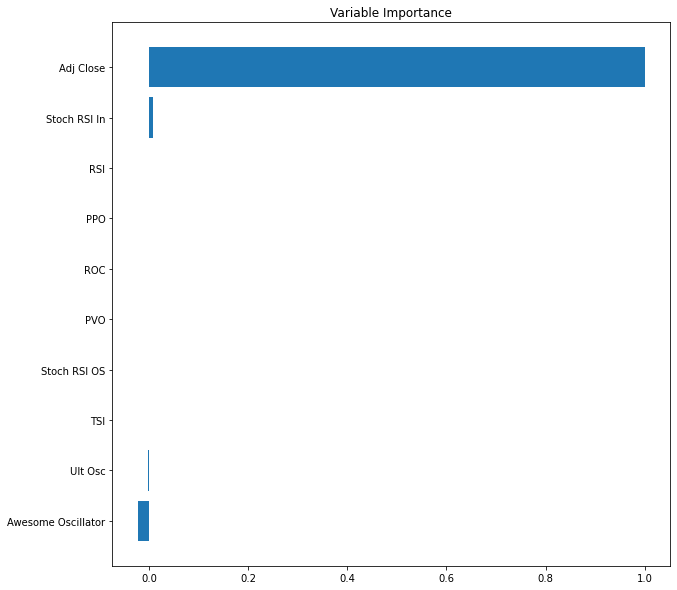

Alpha is: 1.0
R^2 Score: 0.9992301416822771
Mean Absolute Error: 0.31224654670251306
Mean Squared Error: 0.21431630598113965


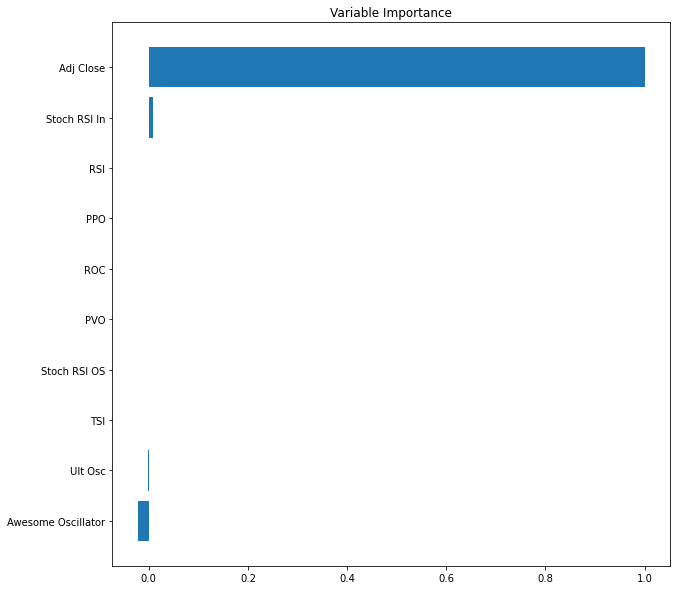

Alpha is: 10.0
R^2 Score: 0.9992301086029449
Mean Absolute Error: 0.31230188746607346
Mean Squared Error: 0.21417512421605142


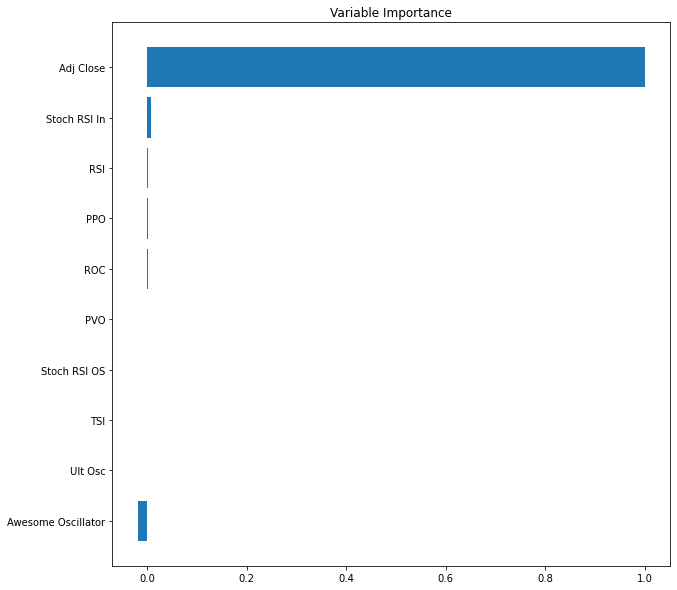

In [126]:
#Ridge Model

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    

    for alpha in [0.1, 1.0, 10.0]:
        print('Alpha is:',alpha)
        ridge_model = linear_model.Ridge(alpha)
        ridge_model.fit(X_tr,y_tr)
        
        ridge_y_pred = ridge_model.predict(X_ts)

        r2 = ridge_model.score(X_tr,y_tr)
        mean_abs_error = mean_absolute_error(y_ts,ridge_y_pred)
        mean_sqr_error =  mean_squared_error(y_ts,ridge_y_pred)
        print('R^2 Score:',r2)
        print('Mean Absolute Error:',mean_abs_error)
        print('Mean Squared Error:',mean_sqr_error)


        lm_imp = ridge_model.coef_
        sorted_idx = np.argsort(lm_imp)
        num_features = np.arange(sorted_idx.shape[0])
        plt.figure(figsize=(10,10))
        plt.barh(num_features,lm_imp[sorted_idx],align='center')
        plt.yticks(num_features, X_train_columns[sorted_idx])
        plt.title('Variable Importance')
        plt.show()


Best Parameters:{'max_depth': 2, 'n_estimators': 1}
R^2 Score: 0.9549983894159116
Mean Absolute Error: 0.5907533151483683
Mean Squared Error: 0.6510587069621034


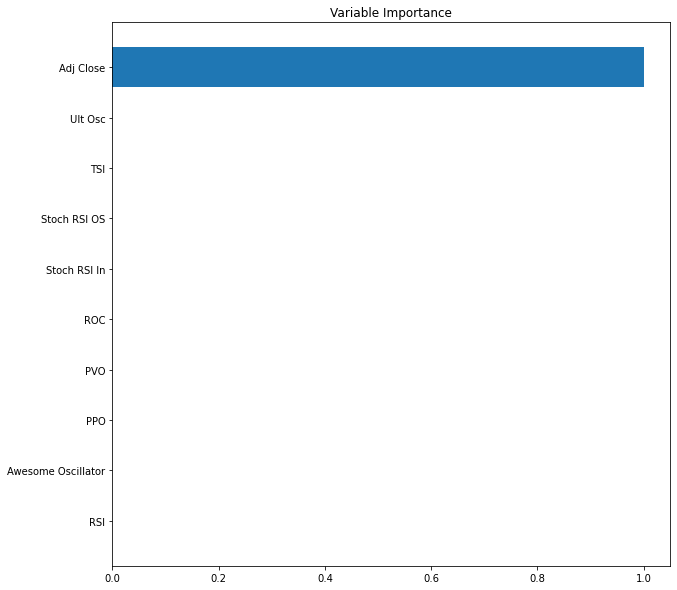

Best Parameters:{'max_depth': 2, 'n_estimators': 2}
R^2 Score: 0.9333647849008002
Mean Absolute Error: 0.22705027812112322
Mean Squared Error: 0.10544169497515693


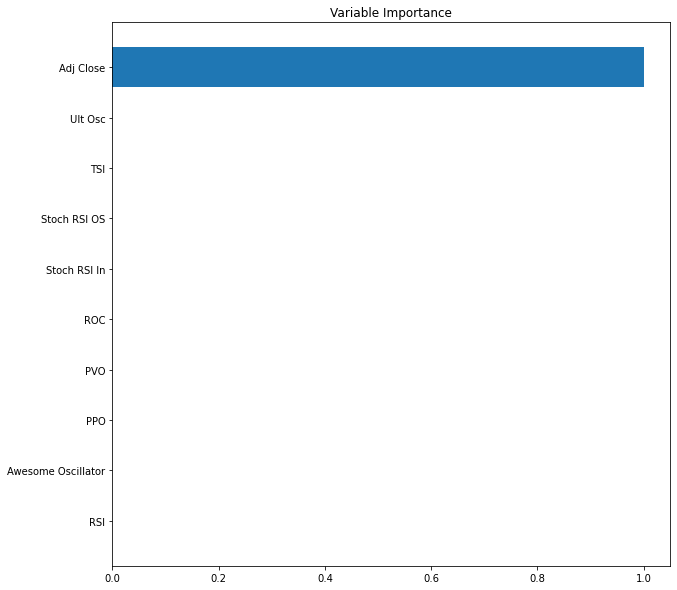

Best Parameters:{'max_depth': 2, 'n_estimators': 4}
R^2 Score: 0.9106770847112159
Mean Absolute Error: 3.747703023828078
Mean Squared Error: 16.680986147622114


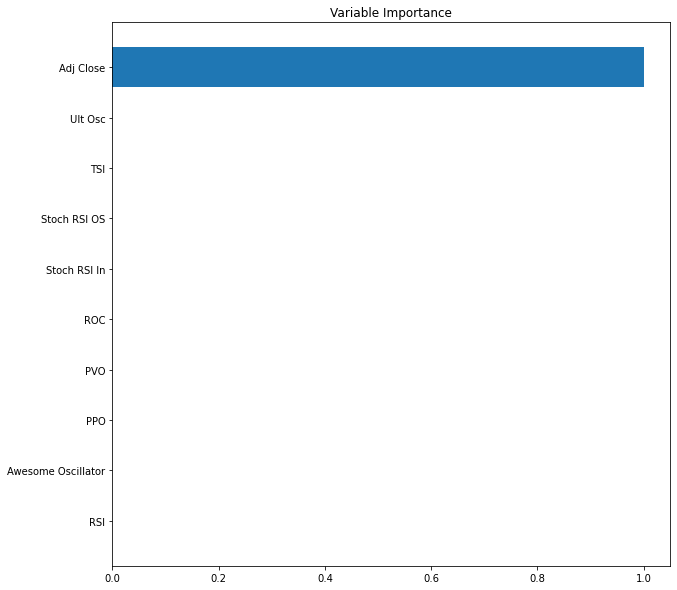

Best Parameters:{'max_depth': 2, 'n_estimators': 3}
R^2 Score: 0.9285265792188202
Mean Absolute Error: 4.945976955409479
Mean Squared Error: 30.721723716235367


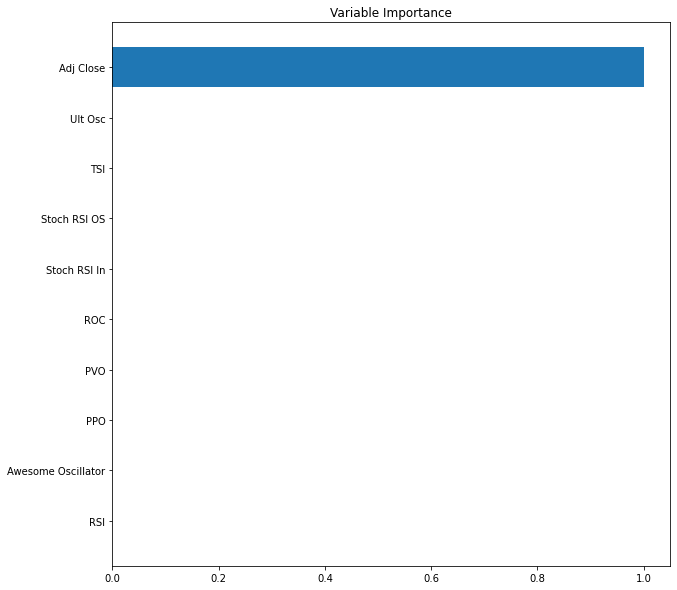

Best Parameters:{'max_depth': 2, 'n_estimators': 2}
R^2 Score: 0.9344758319870732
Mean Absolute Error: 7.211458784334717
Mean Squared Error: 59.07368945755896


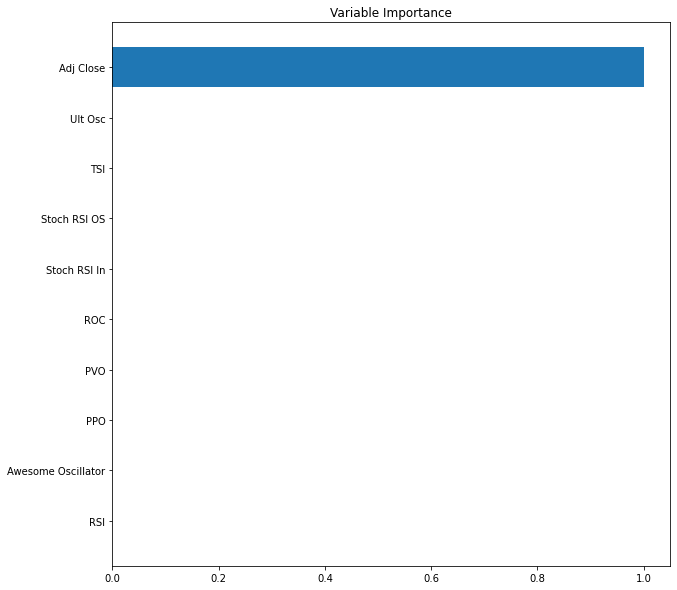

In [128]:
#Random Forest

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    
    random_grid = {'n_estimators':np.arange(1,5),'max_depth':np.arange(1,3)}
    rfr = RandomForestRegressor(random_state=49)
    rfr_cv = GridSearchCV(rfr,random_grid,cv=5)
    rfr_cv.fit(X_tr,y_tr)
    print('Best Parameters:' + str(rfr_cv.best_params_))
    
    
    rfr = RandomForestRegressor(n_estimators = rfr_cv.best_params_['n_estimators'],max_depth = rfr_cv.best_params_['max_depth'],random_state=49)
    rfr.fit(X_tr,y_tr)
    
    y_pred_rfr = rfr.predict(X_ts)
    
    r2 = rfr.score(X_tr,y_tr)
    mean_abs_error = mean_absolute_error(y_ts,y_pred_rfr)
    mean_sqr_error =  mean_squared_error(y_ts,y_pred_rfr)
    print('R^2 Score:',r2)
    print('Mean Absolute Error:',mean_abs_error)
    print('Mean Squared Error:',mean_sqr_error)

    rfr_imp = rfr.feature_importances_
    sorted_idx = np.argsort(rfr_imp)
    num_features = np.arange(sorted_idx.shape[0])
    plt.figure(figsize=(10,10))
    plt.barh(num_features,rfr_imp[sorted_idx],align='center')
    plt.yticks(num_features, X_train_columns[sorted_idx])
    plt.title('Variable Importance')
    plt.show()


In [42]:
df_trend = df[['Adj Close Shift','Adj Close','MACD','ADX','Aroon','CCI','DPO','EMA','Ichimoku Base','Ichimoku CL','KST','MASS','PSAR','STC','TRIX','VI','WMA']]

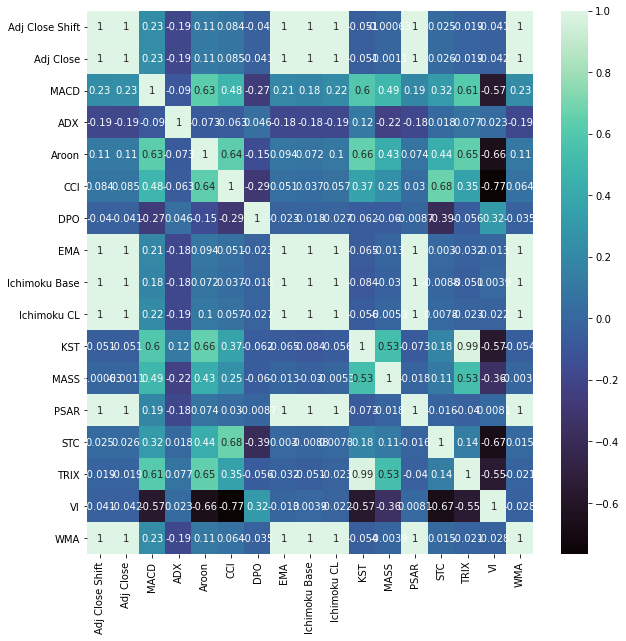

In [43]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_trend.corr(),annot=True,cmap='mako')

In [44]:
#We can drop Ichimoku Base, Ichimoku CL,EMA and PSAR, WMA as they have a perfect corr with other indicators
df_trend.drop(columns=['Ichimoku Base','Ichimoku CL','PSAR','EMA','WMA'],inplace=True)

C:\Users\Jonat\anaconda3\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [45]:
#Separating Data
X = df_trend.drop(columns=['Adj Close Shift'])
y = df_trend['Adj Close Shift']
X_train_columns = X.columns

R^2 Score: 0.9954392061362968
Mean Absolute Error: 0.08045816136214406
Mean Squared Error: 0.013112866311428951


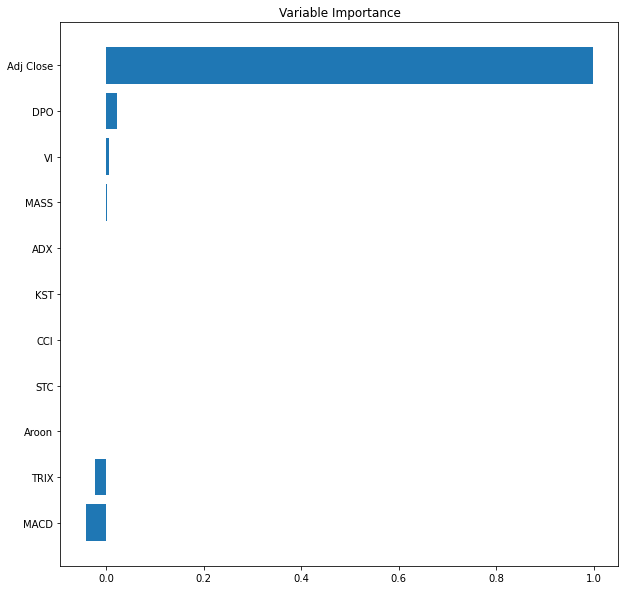

R^2 Score: 0.9939231221965789
Mean Absolute Error: 0.06627741180769094
Mean Squared Error: 0.009298043879368745


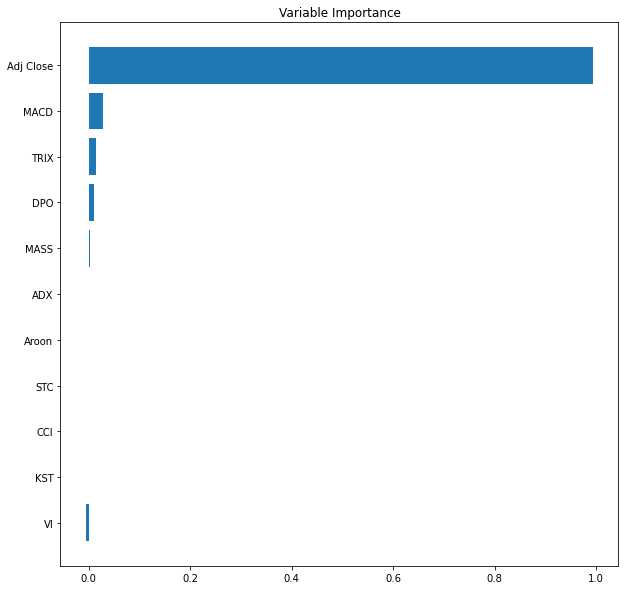

R^2 Score: 0.9942594057120349
Mean Absolute Error: 0.09643405521099022
Mean Squared Error: 0.018636829874665577


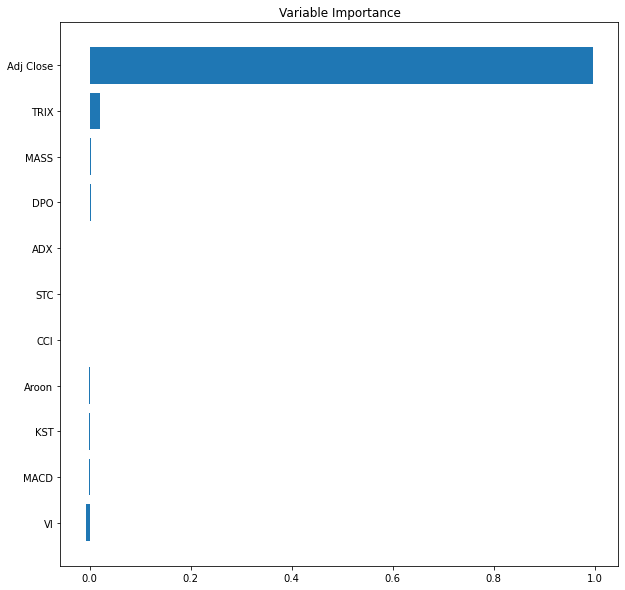

R^2 Score: 0.9983393196878078
Mean Absolute Error: 0.14191900207658312
Mean Squared Error: 0.04283891995863221


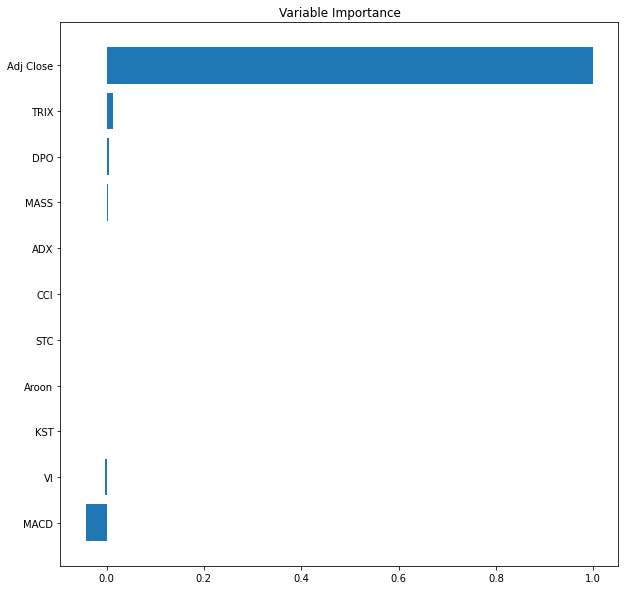

R^2 Score: 0.9992293836027932
Mean Absolute Error: 0.31146963807377026
Mean Squared Error: 0.2134915599982943


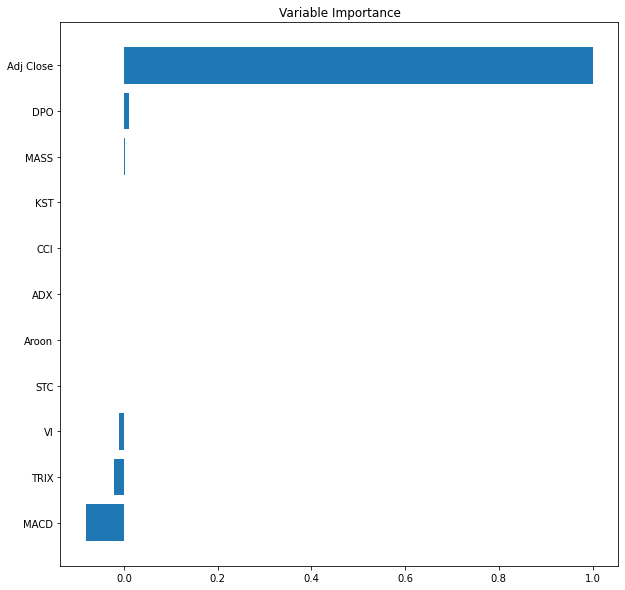

In [46]:
#OLS

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    
    rModel = linear_model.LinearRegression()
    rModel.fit(X_tr,y_tr)
    
    y_pred = rModel.predict(X_ts)
    
    r2 = rModel.score(X_tr,y_tr)
    mean_abs_error = mean_absolute_error(y_ts,y_pred)
    mean_sqr_error =  mean_squared_error(y_ts,y_pred)
    print('R^2 Score:',r2)
    print('Mean Absolute Error:',mean_abs_error)
    print('Mean Squared Error:',mean_sqr_error)

    lm_imp = rModel.coef_
    sorted_idx = np.argsort(lm_imp)
    num_features = np.arange(sorted_idx.shape[0])
    plt.figure(figsize=(10,10))
    plt.barh(num_features,lm_imp[sorted_idx],align='center')
    plt.yticks(num_features, X_train_columns[sorted_idx])
    plt.title('Variable Importance')
    plt.show()

Alpha is: 0.1
R^2 Score: 0.9954391201269401
Mean Absolute Error: 0.0804366969922777
Mean Squared Error: 0.013098259426365557


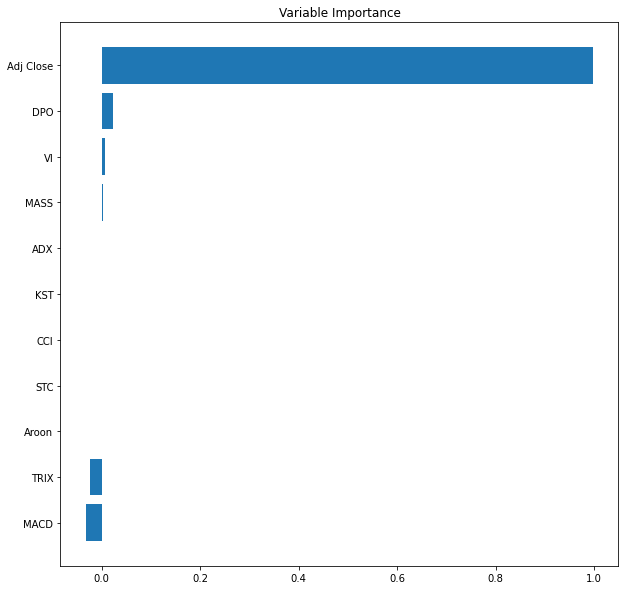

Alpha is: 1.0
R^2 Score: 0.9954354895392639
Mean Absolute Error: 0.08040186515509058
Mean Squared Error: 0.013047373543306746


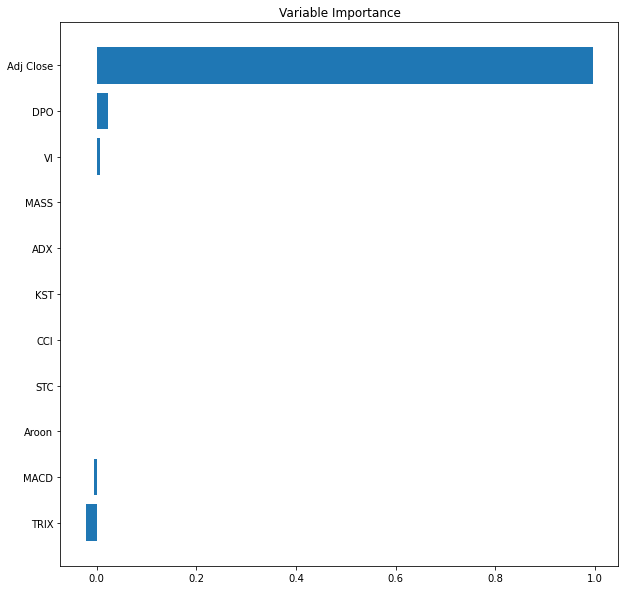

Alpha is: 10.0
R^2 Score: 0.9951974921432777
Mean Absolute Error: 0.08318077111874349
Mean Squared Error: 0.013536625026679293


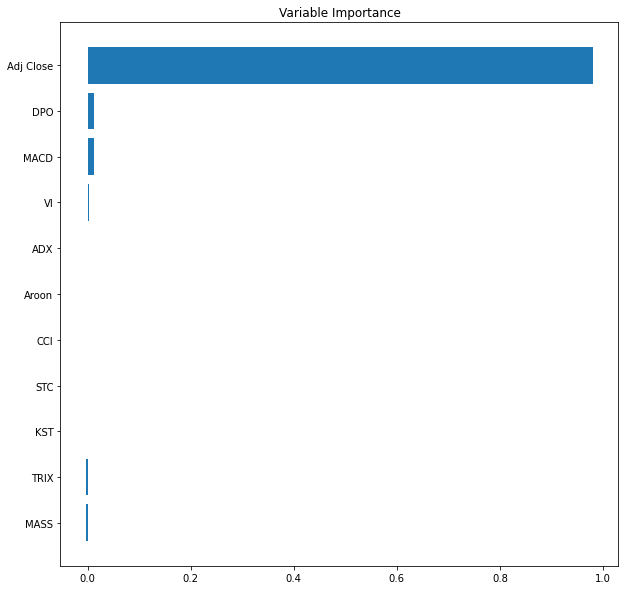

Alpha is: 0.1
R^2 Score: 0.9939231189335088
Mean Absolute Error: 0.0662914850677281
Mean Squared Error: 0.009299453614975178


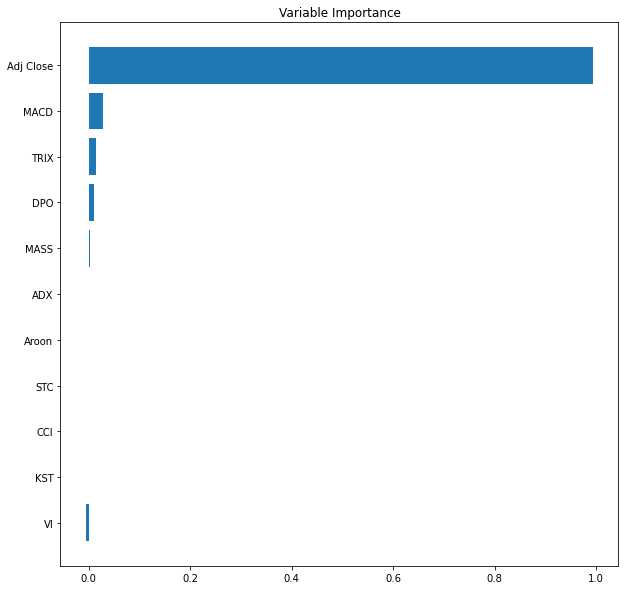

Alpha is: 1.0
R^2 Score: 0.9939228052403971
Mean Absolute Error: 0.06642381592741729
Mean Squared Error: 0.009313480253815079


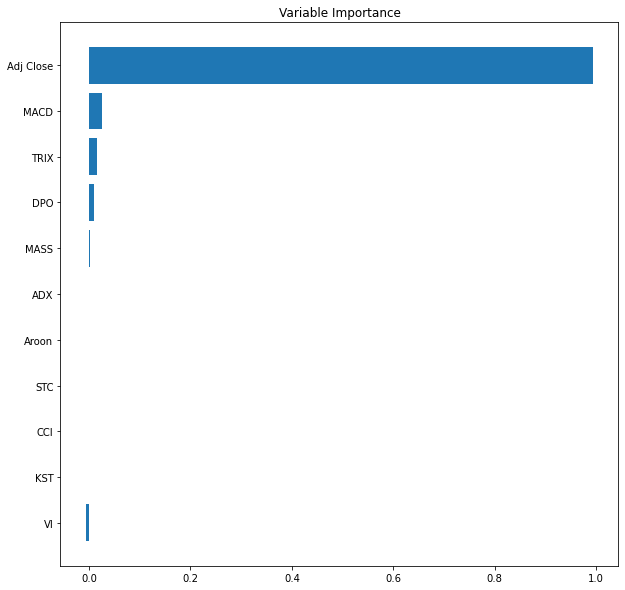

Alpha is: 10.0
R^2 Score: 0.993893003581702
Mean Absolute Error: 0.06833671120421186
Mean Squared Error: 0.00954825670986944


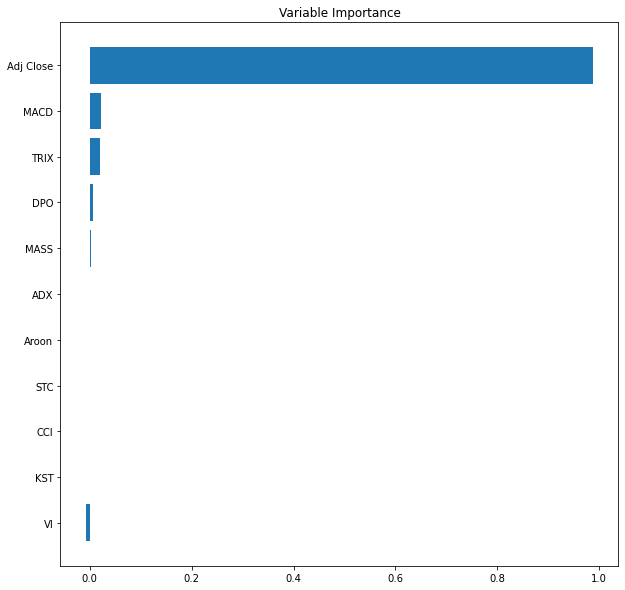

Alpha is: 0.1
R^2 Score: 0.994259404276792
Mean Absolute Error: 0.09645676836159406
Mean Squared Error: 0.018645380972141412


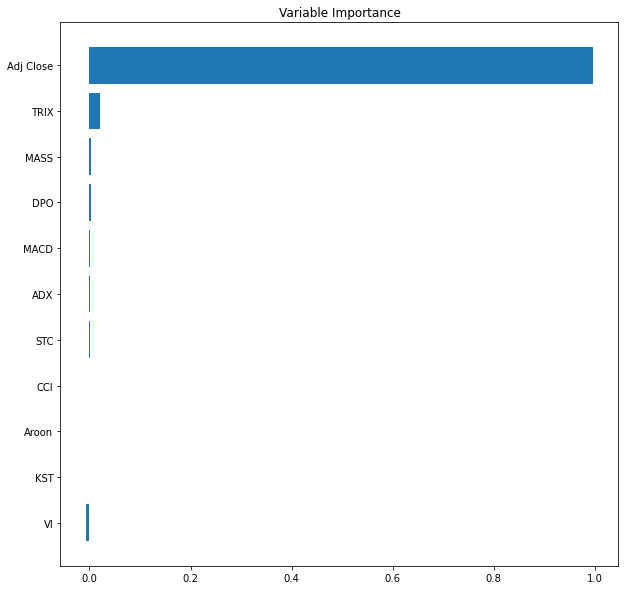

Alpha is: 1.0
R^2 Score: 0.9942592760470453
Mean Absolute Error: 0.09666273746803308
Mean Squared Error: 0.018723013467225106


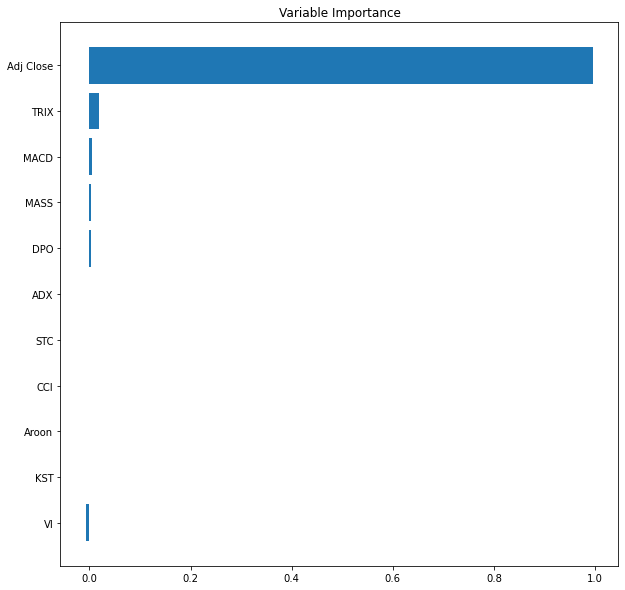

Alpha is: 10.0
R^2 Score: 0.9942483494187944
Mean Absolute Error: 0.09979457835227128
Mean Squared Error: 0.01973995385435414


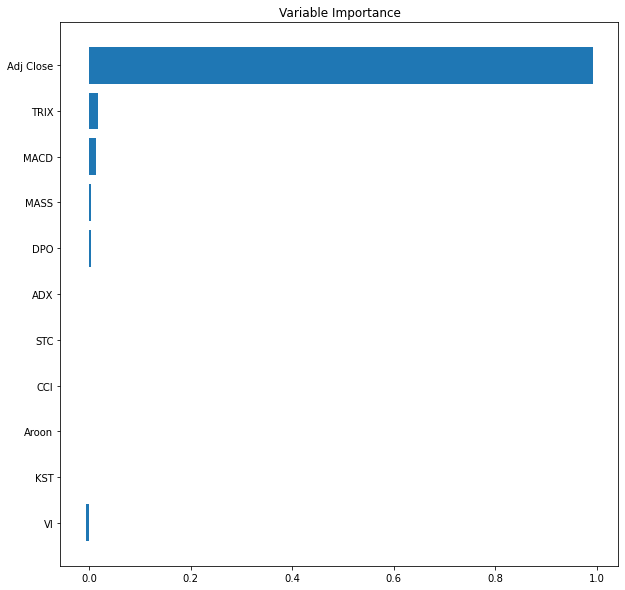

Alpha is: 0.1
R^2 Score: 0.9983393194277755
Mean Absolute Error: 0.14192572246661875
Mean Squared Error: 0.042842366064154


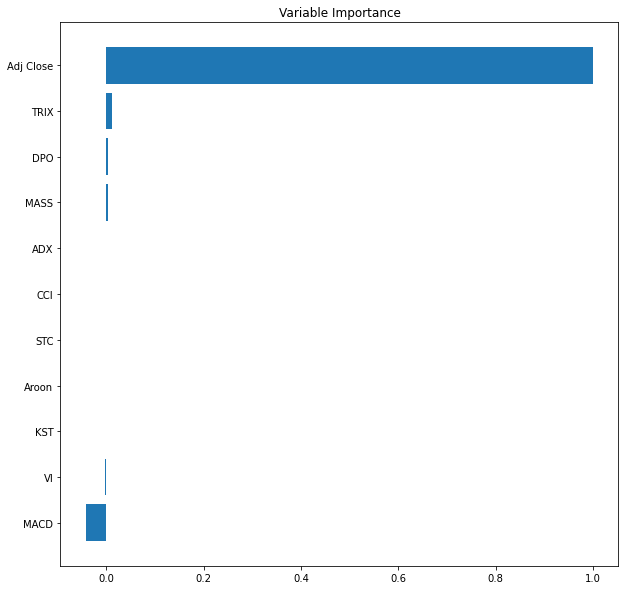

Alpha is: 1.0
R^2 Score: 0.9983392992177224
Mean Absolute Error: 0.1419927554907554
Mean Squared Error: 0.042872704033243586


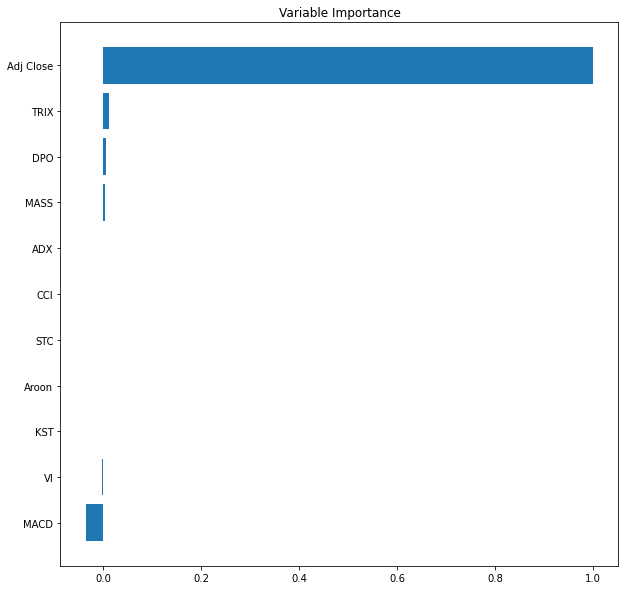

Alpha is: 10.0
R^2 Score: 0.9983386595040771
Mean Absolute Error: 0.14268754143715362
Mean Squared Error: 0.0431471823578553


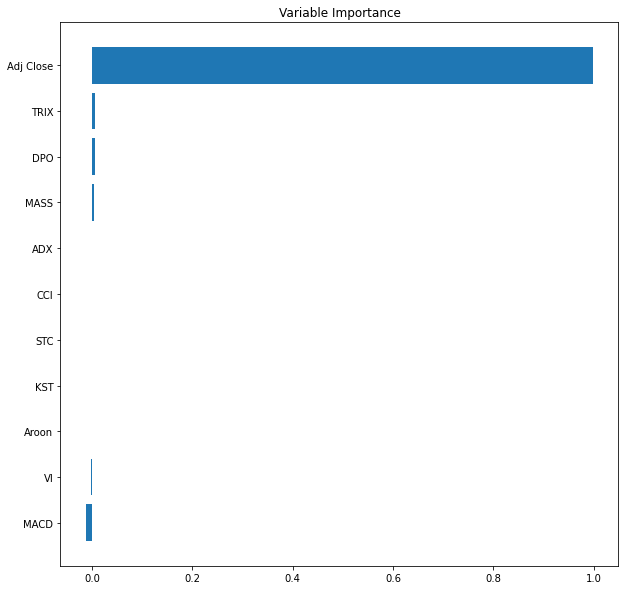

Alpha is: 0.1
R^2 Score: 0.9992293835404092
Mean Absolute Error: 0.31146646461258787
Mean Squared Error: 0.2134826236431491


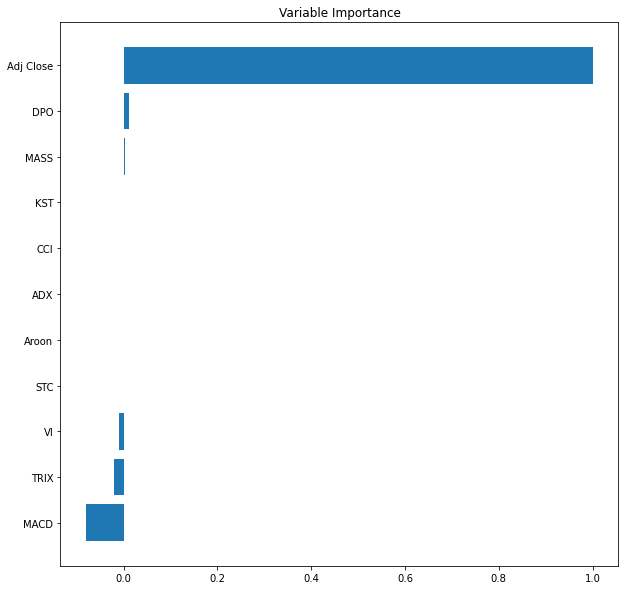

Alpha is: 1.0
R^2 Score: 0.999229377918328
Mean Absolute Error: 0.31144260706031873
Mean Squared Error: 0.2134091676552043


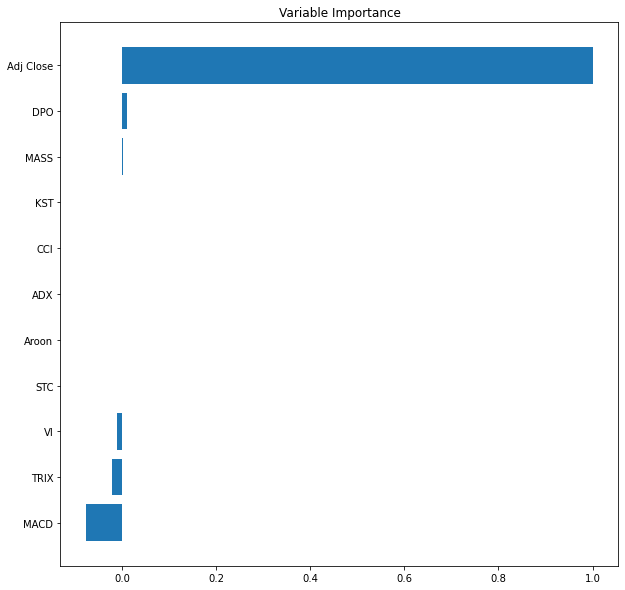

Alpha is: 10.0
R^2 Score: 0.9992291068772166
Mean Absolute Error: 0.3114489700893789
Mean Squared Error: 0.21305041012367035


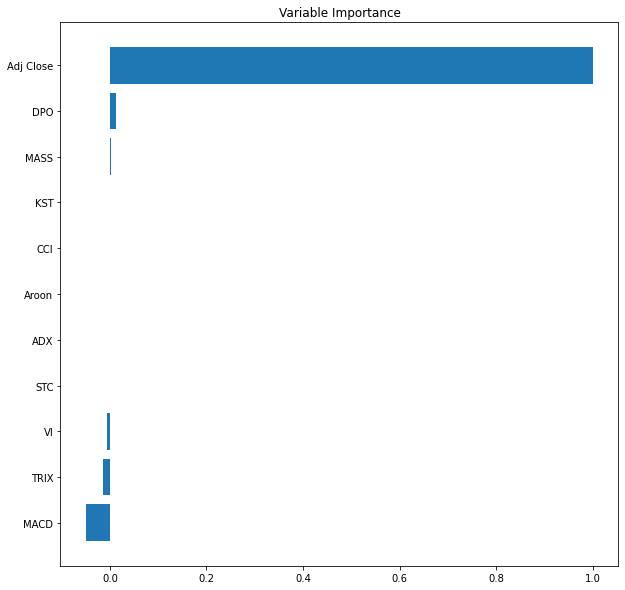

In [47]:
#Ridge Model

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    

    for alpha in [0.1, 1.0, 10.0]:
        print('Alpha is:',alpha)
        ridge_model = linear_model.Ridge(alpha)
        ridge_model.fit(X_tr,y_tr)
        
        ridge_y_pred = ridge_model.predict(X_ts)
        
        r2 = ridge_model.score(X_tr,y_tr)
        mean_abs_error = mean_absolute_error(y_ts,ridge_y_pred)
        mean_sqr_error =  mean_squared_error(y_ts,ridge_y_pred)
        print('R^2 Score:',r2)
        print('Mean Absolute Error:',mean_abs_error)
        print('Mean Squared Error:',mean_sqr_error)
        
        lm_imp = ridge_model.coef_
        sorted_idx = np.argsort(lm_imp)
        num_features = np.arange(sorted_idx.shape[0])
        plt.figure(figsize=(10,10))
        plt.barh(num_features,lm_imp[sorted_idx],align='center')
        plt.yticks(num_features, X_train_columns[sorted_idx])
        plt.title('Variable Importance')
        plt.show()


Best Parameters:{'max_depth': 2, 'n_estimators': 1}
R^2 Score: 0.9549983894159116
Mean Absolute Error: 0.590753315148368
Mean Squared Error: 0.6510587069621031


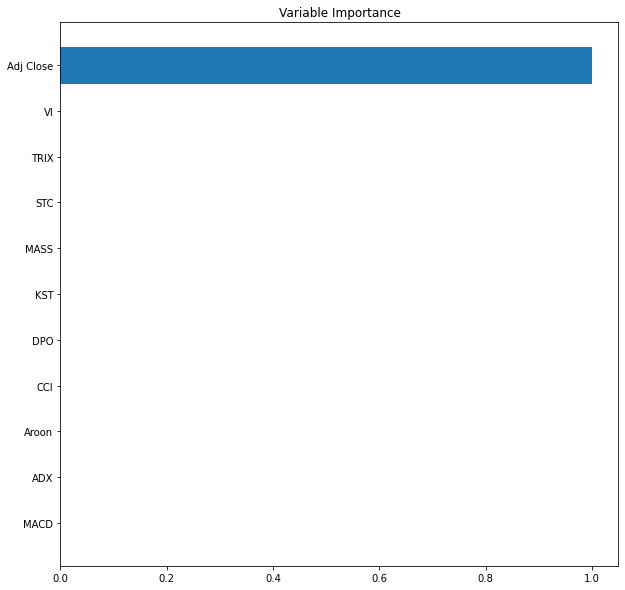

Best Parameters:{'max_depth': 2, 'n_estimators': 2}
R^2 Score: 0.9333647849008002
Mean Absolute Error: 0.22705027812112327
Mean Squared Error: 0.10544169497515697


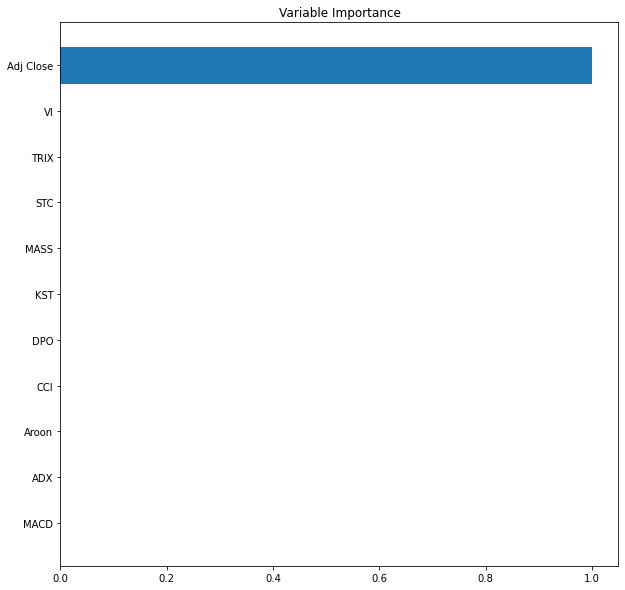

Best Parameters:{'max_depth': 2, 'n_estimators': 4}
R^2 Score: 0.9106770847112159
Mean Absolute Error: 3.747703023828075
Mean Squared Error: 16.68098614762209


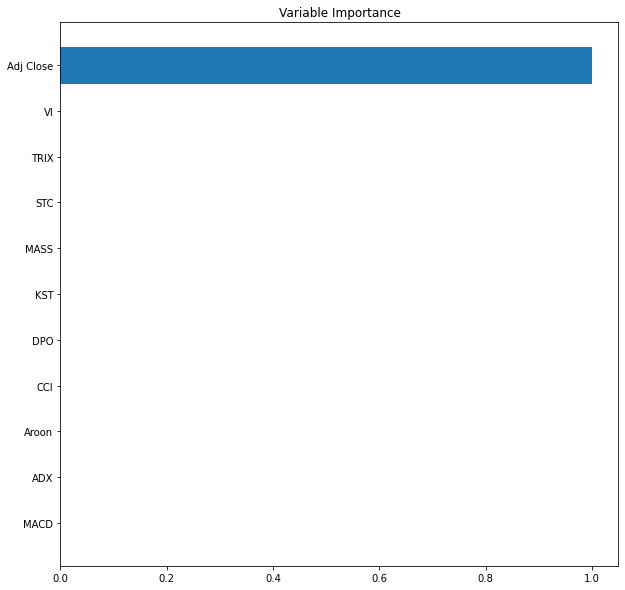

Best Parameters:{'max_depth': 2, 'n_estimators': 3}
R^2 Score: 0.9285265792188202
Mean Absolute Error: 4.945976955409476
Mean Squared Error: 30.721723716235346


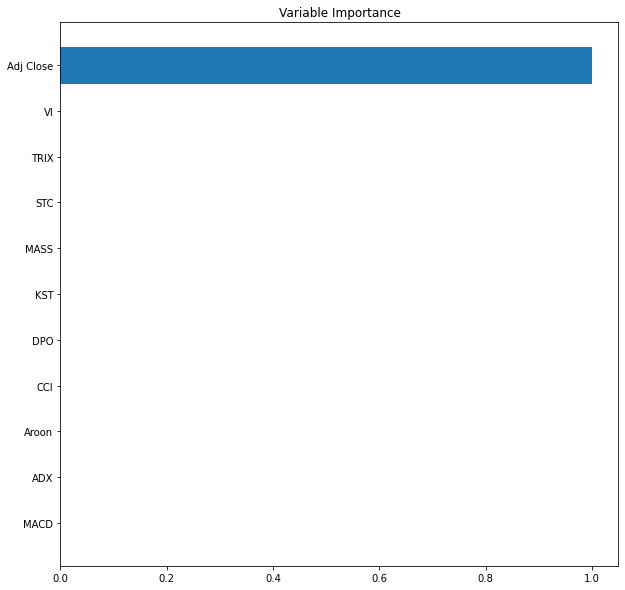

Best Parameters:{'max_depth': 2, 'n_estimators': 2}
R^2 Score: 0.9344758319870732
Mean Absolute Error: 7.211458784334708
Mean Squared Error: 59.07368945755888


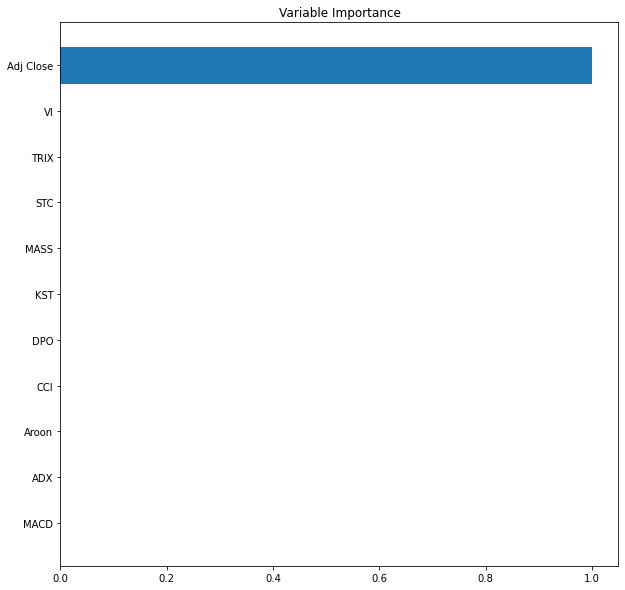

In [48]:
#Random Forest

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    
    random_grid = {'n_estimators':np.arange(1,5),'max_depth':np.arange(1,3)}
    rfr = RandomForestRegressor(random_state=49)
    rfr_cv = GridSearchCV(rfr,random_grid,cv=5)
    rfr_cv.fit(X_tr,y_tr)
    print('Best Parameters:' + str(rfr_cv.best_params_))
    
    rfr = RandomForestRegressor(n_estimators = rfr_cv.best_params_['n_estimators'],max_depth = rfr_cv.best_params_['max_depth'],random_state=49)
    rfr.fit(X_tr,y_tr)
    
    y_pred_rfr = rfr.predict(X_ts)
    
    r2 = rfr.score(X_tr,y_tr)
    mean_abs_error = mean_absolute_error(y_ts,y_pred_rfr)
    mean_sqr_error =  mean_squared_error(y_ts,y_pred_rfr)
    print('R^2 Score:',r2)
    print('Mean Absolute Error:',mean_abs_error)
    print('Mean Squared Error:',mean_sqr_error)

    
    rfr_imp = rfr.feature_importances_
    sorted_idx = np.argsort(rfr_imp)
    num_features = np.arange(sorted_idx.shape[0])
    plt.figure(figsize=(10,10))
    plt.barh(num_features,rfr_imp[sorted_idx],align='center')
    plt.yticks(num_features, X_train_columns[sorted_idx])
    plt.title('Variable Importance')
    plt.show()

In [49]:
df_volatility = df[['Adj Close Shift','Adj Close','Bollinger Avg','Bollinger High','Bollinger Low','ATR','Donchain Mid','Donchain High','Donchain Low','Keltner Mid','Keltner High','Keltner Low','Ulcer']]

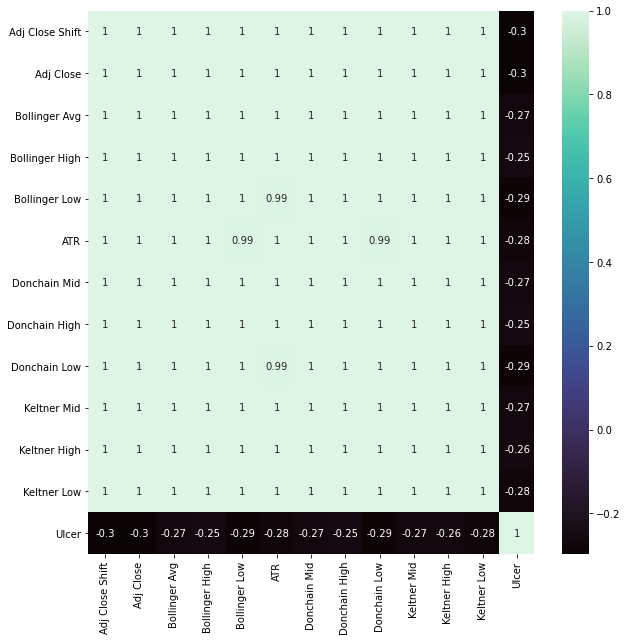

In [50]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_volatility.corr(),annot=True,cmap='mako')

In [51]:
#Drop all but Ulcer
df_volatility = df[['Adj Close Shift','Adj Close','Ulcer']]

In [52]:
#Separating Data
X = df_volatility.drop(columns=['Adj Close Shift'])
y = df_volatility['Adj Close Shift']
X_train_columns = X.columns

R^2 Score: 0.9954274358337865
Mean Absolute Error: 0.08018595170305197
Mean Squared Error: 0.012946221863361947


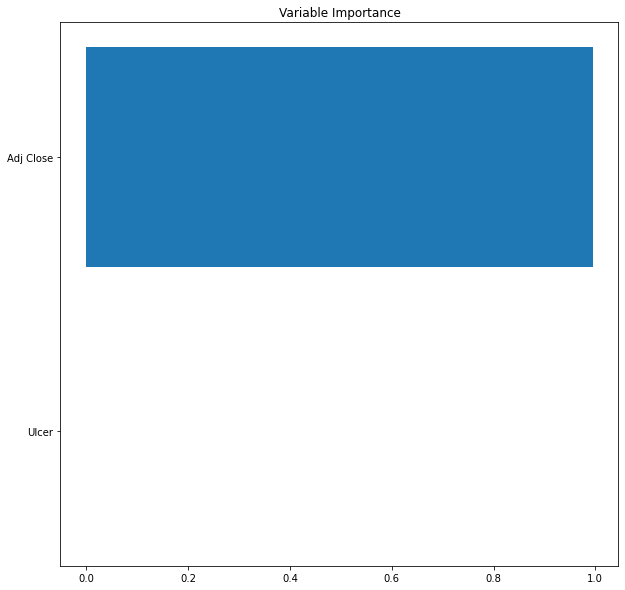

R^2 Score: 0.9939035780322758
Mean Absolute Error: 0.06606258252038201
Mean Squared Error: 0.00925495202687297


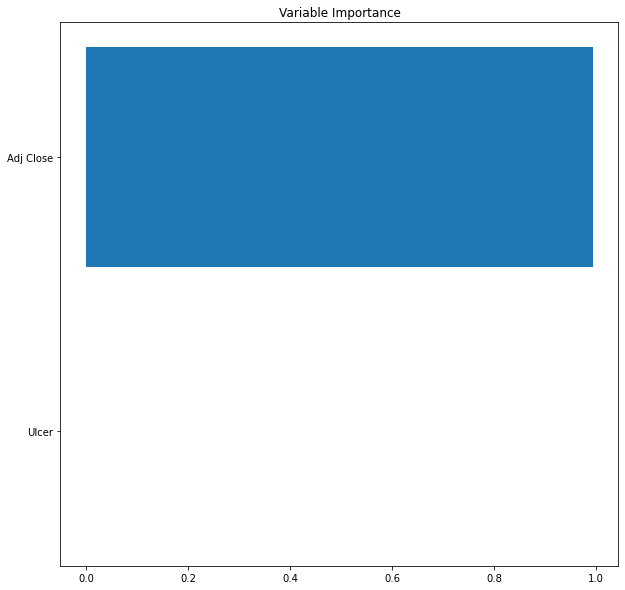

R^2 Score: 0.9942452921450357
Mean Absolute Error: 0.09632434598242841
Mean Squared Error: 0.01863934126040409


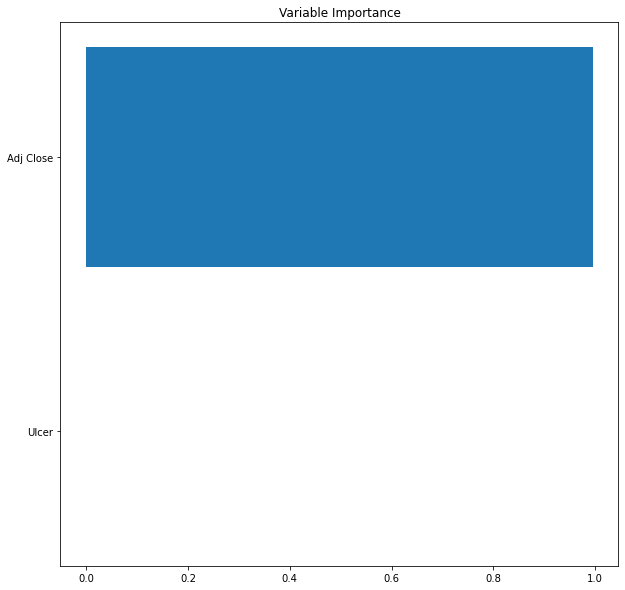

R^2 Score: 0.9983366845691168
Mean Absolute Error: 0.14224769173103866
Mean Squared Error: 0.043046158132151006


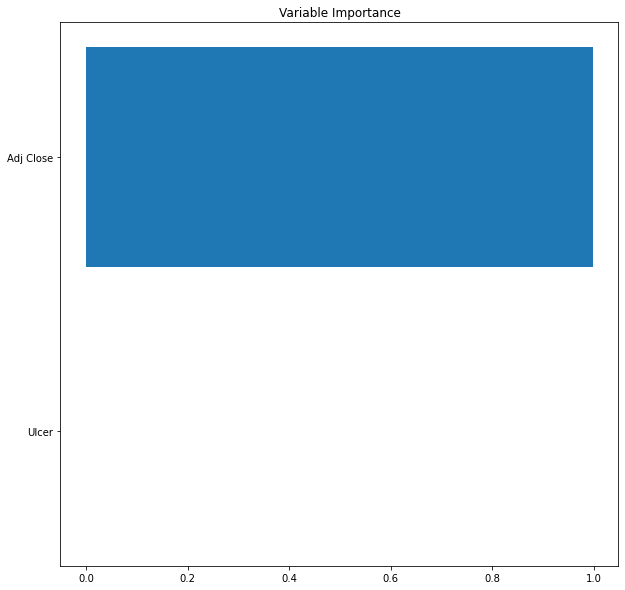

R^2 Score: 0.9992263868745626
Mean Absolute Error: 0.31209205796792344
Mean Squared Error: 0.21345619829978735


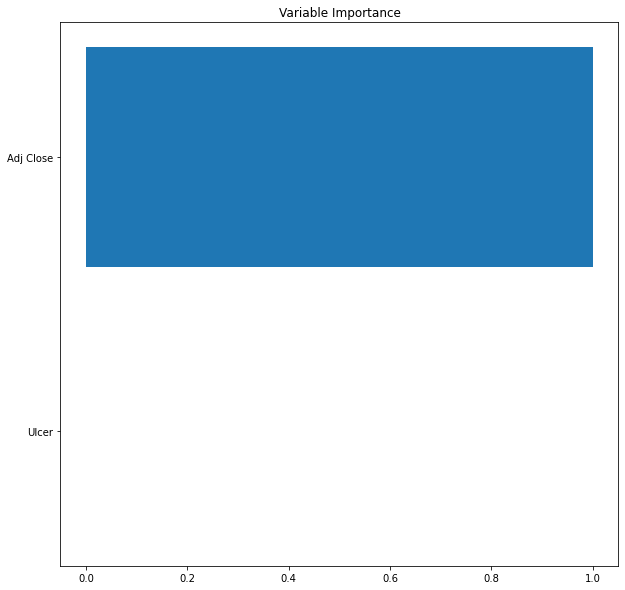

In [53]:
#OLS

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    
    rModel = linear_model.LinearRegression()
    rModel.fit(X_tr,y_tr)
    
    y_pred = rModel.predict(X_ts)
    
    r2 = rModel.score(X_tr,y_tr)
    test_score = rModel.score(X_ts,y_ts)
    mean_abs_error = mean_absolute_error(y_ts,y_pred)
    mean_sqr_error = mean_squared_error(y_ts,y_pred)
    print('R^2 Score:',r2)
    print('Mean Absolute Error:',mean_abs_error)
    print('Mean Squared Error:',mean_sqr_error)

    lm_imp = rModel.coef_
    sorted_idx = np.argsort(lm_imp)
    num_features = np.arange(sorted_idx.shape[0])
    plt.figure(figsize=(10,10))
    plt.barh(num_features,lm_imp[sorted_idx],align='center')
    plt.yticks(num_features, X_train_columns[sorted_idx])
    plt.title('Variable Importance')
    plt.show()

Alpha is: 0.1
R^2 Score: 0.9954274105801775
Mean Absolute Error: 0.08018799197902039
Mean Squared Error: 0.012945244240414917


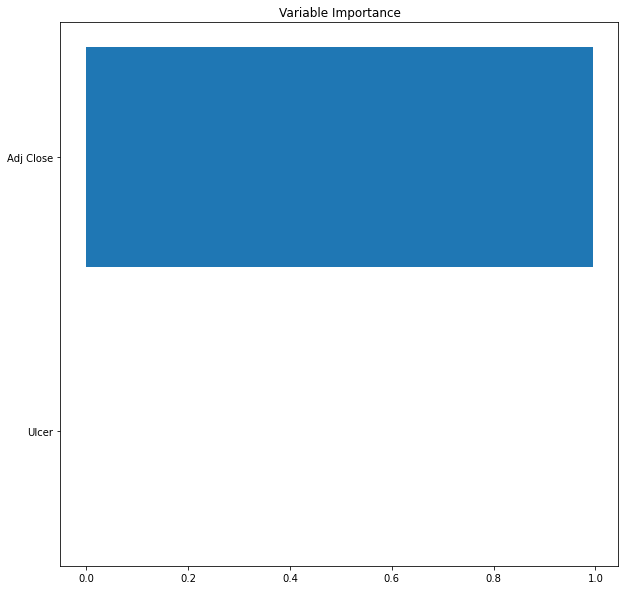

Alpha is: 1.0
R^2 Score: 0.9954249186380333
Mean Absolute Error: 0.08020632191076839
Mean Squared Error: 0.012943913213385703


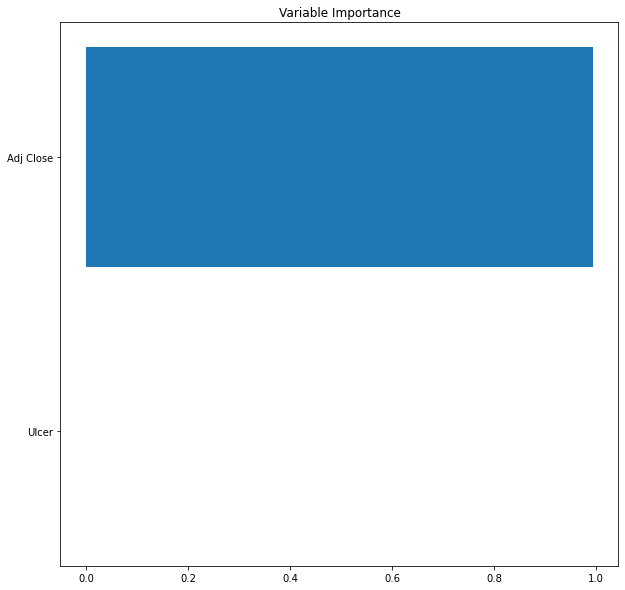

Alpha is: 10.0
R^2 Score: 0.9951836680109917
Mean Absolute Error: 0.08333562569449304
Mean Squared Error: 0.013643882003495705


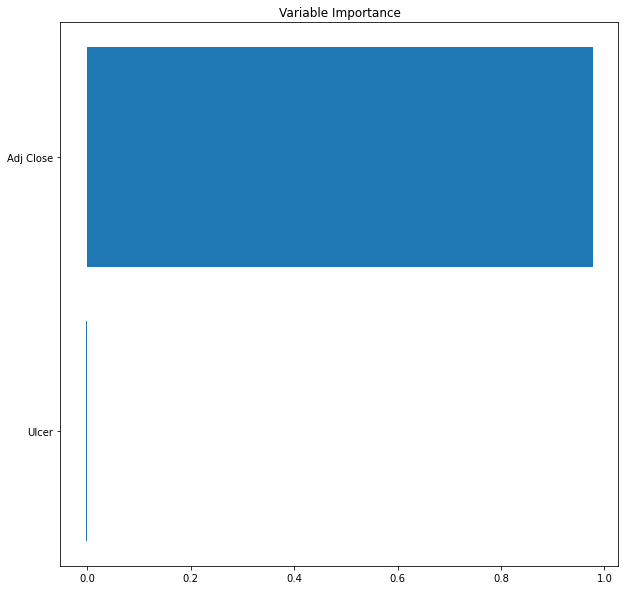

Alpha is: 0.1
R^2 Score: 0.9939035750273212
Mean Absolute Error: 0.06607410203356377
Mean Squared Error: 0.009256049899926164


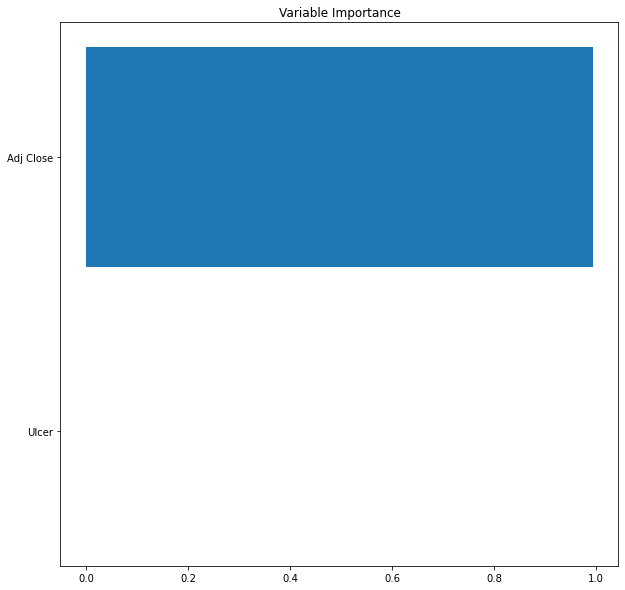

Alpha is: 1.0
R^2 Score: 0.993903277854332
Mean Absolute Error: 0.06618269357836666
Mean Squared Error: 0.009266528171665272


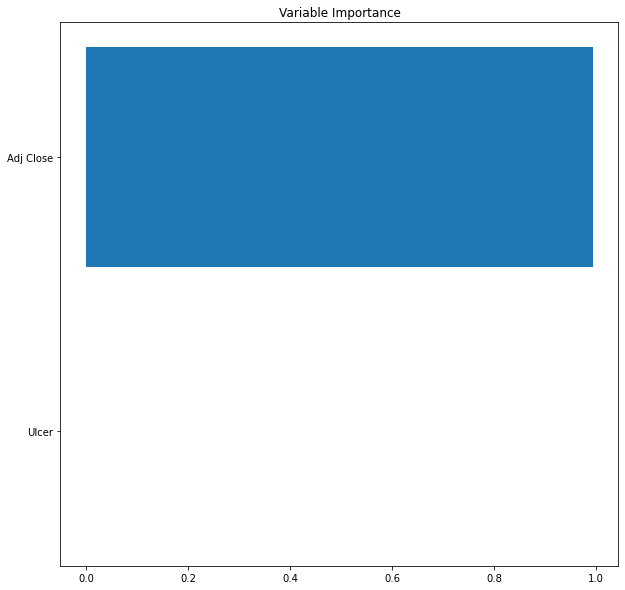

Alpha is: 10.0
R^2 Score: 0.9938738750056881
Mean Absolute Error: 0.06753685838881228
Mean Squared Error: 0.009429765745467236


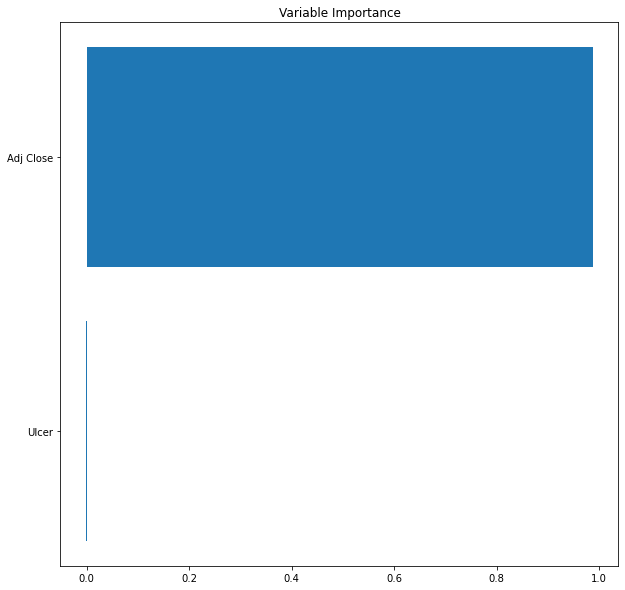

Alpha is: 0.1
R^2 Score: 0.9942452909127726
Mean Absolute Error: 0.09634689678839167
Mean Squared Error: 0.01864730000481496


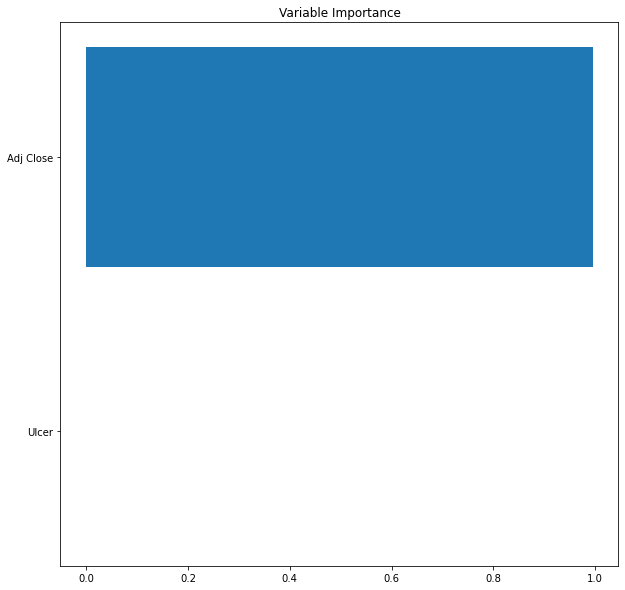

Alpha is: 1.0
R^2 Score: 0.9942451690047751
Mean Absolute Error: 0.09656381904981716
Mean Squared Error: 0.018722350013231706


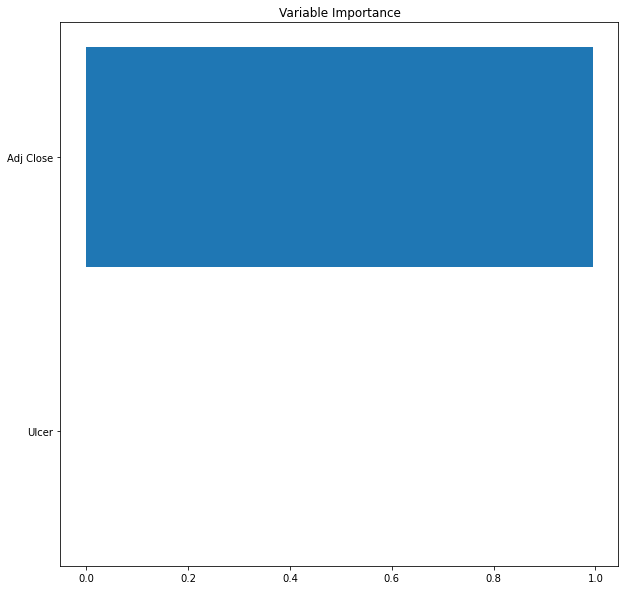

Alpha is: 10.0
R^2 Score: 0.9942330636719453
Mean Absolute Error: 0.1000231077386048
Mean Squared Error: 0.01980894225320154


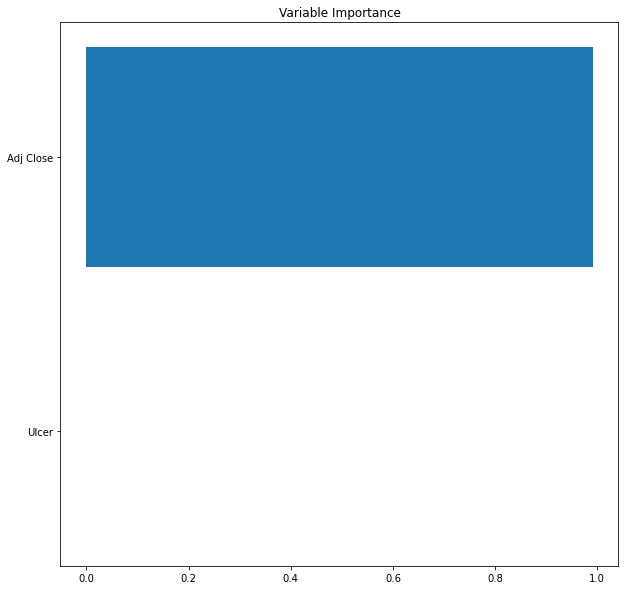

Alpha is: 0.1
R^2 Score: 0.9983366845322564
Mean Absolute Error: 0.1422544778971503
Mean Squared Error: 0.04304869600736717


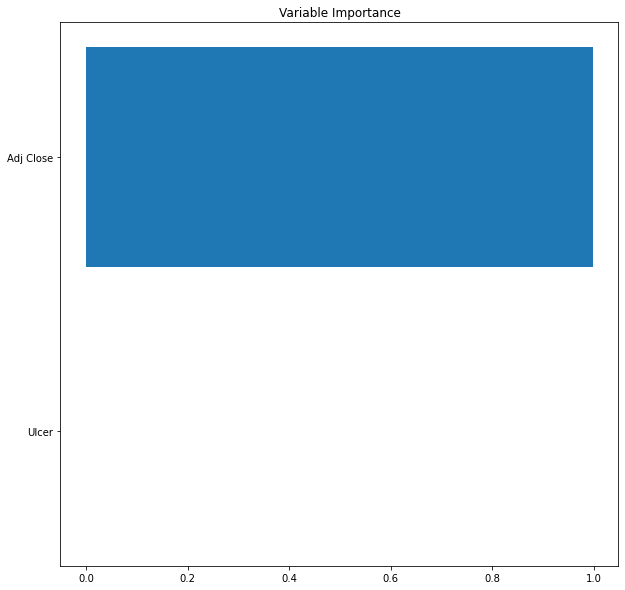

Alpha is: 1.0
R^2 Score: 0.9983366808835394
Mean Absolute Error: 0.14231645246024563
Mean Squared Error: 0.04307190828796232


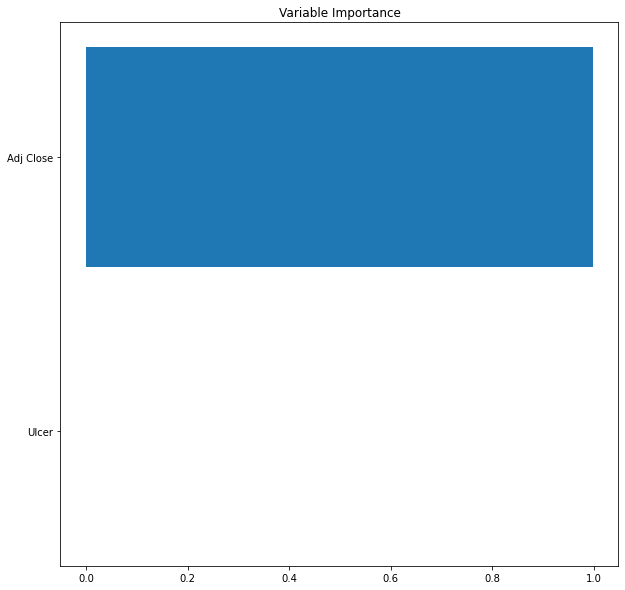

Alpha is: 10.0
R^2 Score: 0.998336316473258
Mean Absolute Error: 0.14314383545393003
Mean Squared Error: 0.04334074955082356


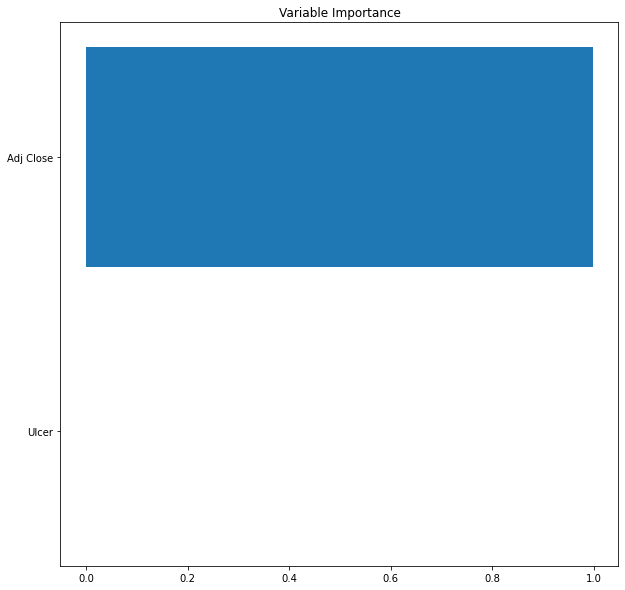

Alpha is: 0.1
R^2 Score: 0.9992263868724404
Mean Absolute Error: 0.3120928300032131
Mean Squared Error: 0.21345589910842083


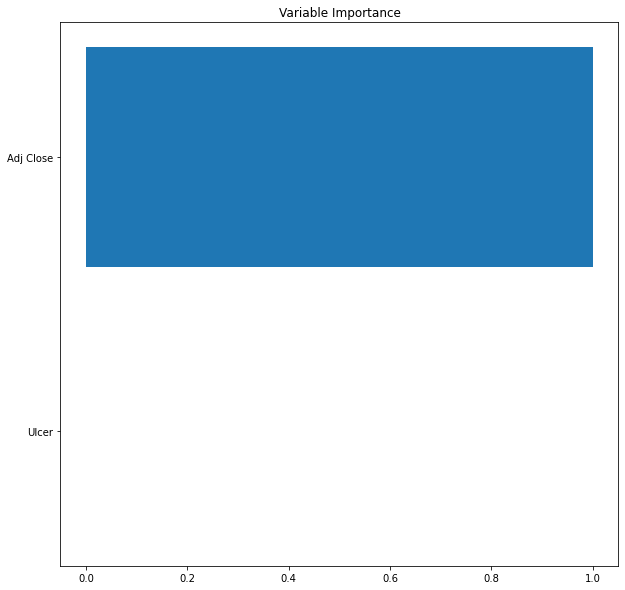

Alpha is: 1.0
R^2 Score: 0.9992263866623561
Mean Absolute Error: 0.31209977818711926
Mean Squared Error: 0.21345326333348993


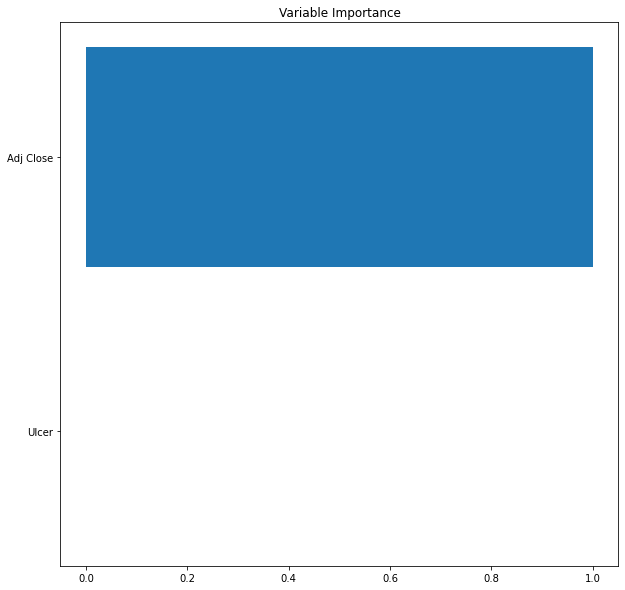

Alpha is: 10.0
R^2 Score: 0.9992263656611728
Mean Absolute Error: 0.31218060158945
Mean Squared Error: 0.21343254126986225


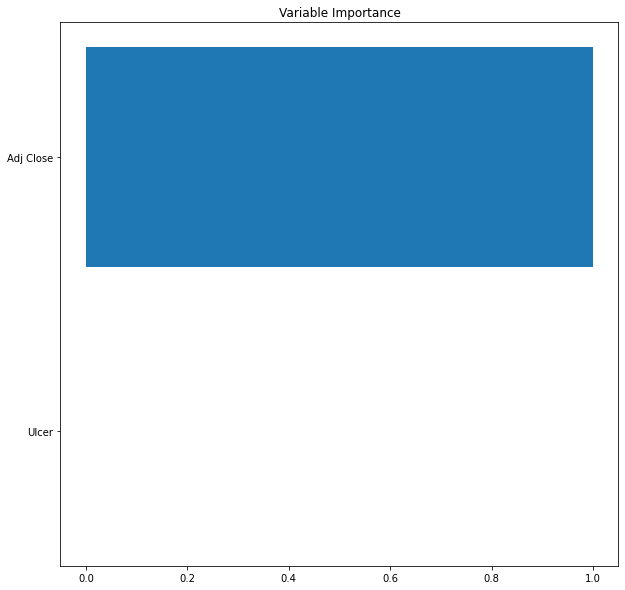

In [54]:
#Ridge Model

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    

    for alpha in [0.1, 1.0, 10.0]:
        print('Alpha is:',alpha)
        ridge_model = linear_model.Ridge(alpha)
        ridge_model.fit(X_tr,y_tr)
        
        ridge_y_pred = ridge_model.predict(X_ts)
        
        r2 = ridge_model.score(X_tr,y_tr)
        mean_abs_error = mean_absolute_error(y_ts,ridge_y_pred)
        mean_sqr_error = mean_squared_error(y_ts,ridge_y_pred)
        print('R^2 Score:',r2)
        print('Mean Absolute Error:',mean_abs_error)
        print('Mean Squared Error:',mean_sqr_error)

        lm_imp = ridge_model.coef_
        sorted_idx = np.argsort(lm_imp)
        num_features = np.arange(sorted_idx.shape[0])
        plt.figure(figsize=(10,10))
        plt.barh(num_features,lm_imp[sorted_idx],align='center')
        plt.yticks(num_features, X_train_columns[sorted_idx])
        plt.title('Variable Importance')
        plt.show()

Best Parameters:{'max_depth': 2, 'n_estimators': 4}
R^2 Score: 0.9585180025490719
Mean Absolute Error: 0.5815353406137448
Mean Squared Error: 0.6565408338270743


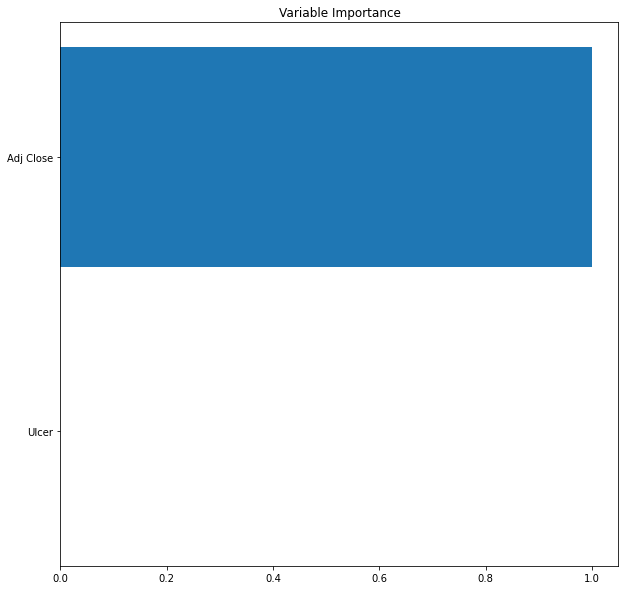

Best Parameters:{'max_depth': 2, 'n_estimators': 2}
R^2 Score: 0.9333647849008003
Mean Absolute Error: 0.22705027812112327
Mean Squared Error: 0.10544169497515693


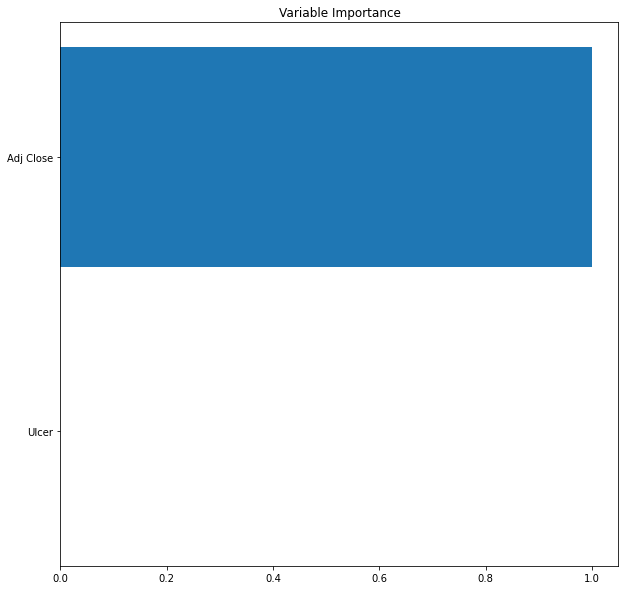

Best Parameters:{'max_depth': 2, 'n_estimators': 4}
R^2 Score: 0.9106770847112159
Mean Absolute Error: 3.747703023828077
Mean Squared Error: 16.680986147622104


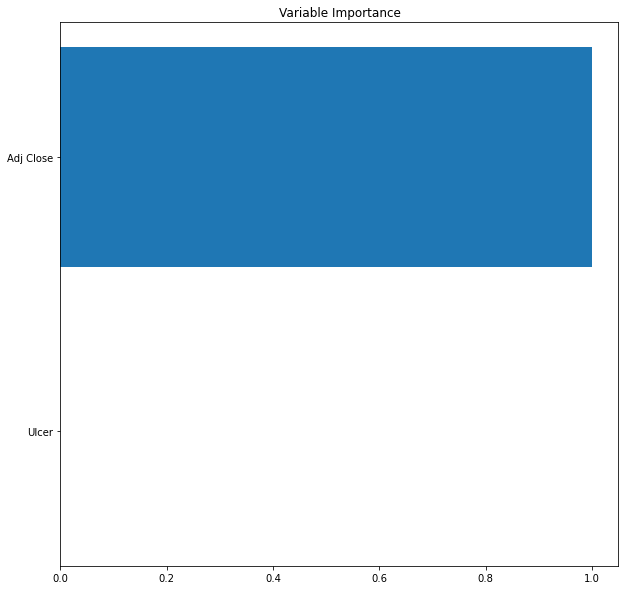

Best Parameters:{'max_depth': 2, 'n_estimators': 3}
R^2 Score: 0.9285265792188202
Mean Absolute Error: 4.945976955409479
Mean Squared Error: 30.721723716235367


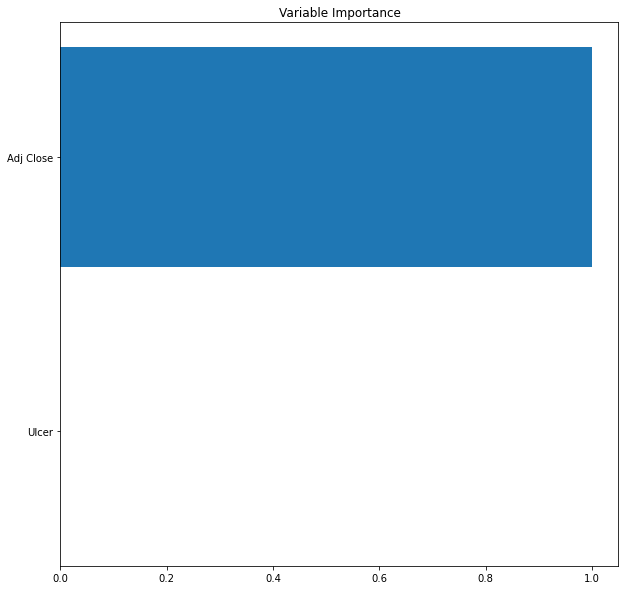

Best Parameters:{'max_depth': 2, 'n_estimators': 2}
R^2 Score: 0.9344758319870732
Mean Absolute Error: 7.211458784334712
Mean Squared Error: 59.07368945755892


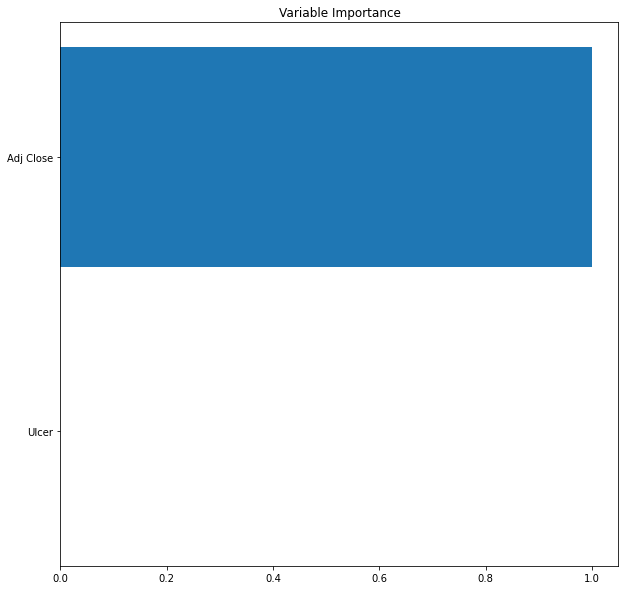

In [55]:
#Random Forest

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    
    random_grid = {'n_estimators':np.arange(1,5),'max_depth':np.arange(1,3)}
    rfr = RandomForestRegressor(random_state=49)
    rfr_cv = GridSearchCV(rfr,random_grid,cv=5)
    rfr_cv.fit(X_tr,y_tr)
    print('Best Parameters:' + str(rfr_cv.best_params_))
    
    rfr = RandomForestRegressor(n_estimators = rfr_cv.best_params_['n_estimators'],max_depth = rfr_cv.best_params_['max_depth'],random_state=49)
    rfr.fit(X_tr,y_tr)
    
    y_pred_rfr = rfr.predict(X_ts)
    
    r2 = rfr.score(X_tr,y_tr)
    mean_abs_error = mean_absolute_error(y_ts,y_pred_rfr)
    mean_sqr_error = mean_squared_error(y_ts,y_pred_rfr)
    print('R^2 Score:',r2)
    print('Mean Absolute Error:',mean_abs_error)
    print('Mean Squared Error:',mean_sqr_error)

    rfr_imp = rfr.feature_importances_
    sorted_idx = np.argsort(rfr_imp)
    num_features = np.arange(sorted_idx.shape[0])
    plt.figure(figsize=(10,10))
    plt.barh(num_features,rfr_imp[sorted_idx],align='center')
    plt.yticks(num_features, X_train_columns[sorted_idx])
    plt.title('Variable Importance')
    plt.show()

In [56]:
df_volume = df[['Adj Close Shift','Adj Close','OBV','ADI','CMF','EoM','FI','MFI','VPT','VWAP']]

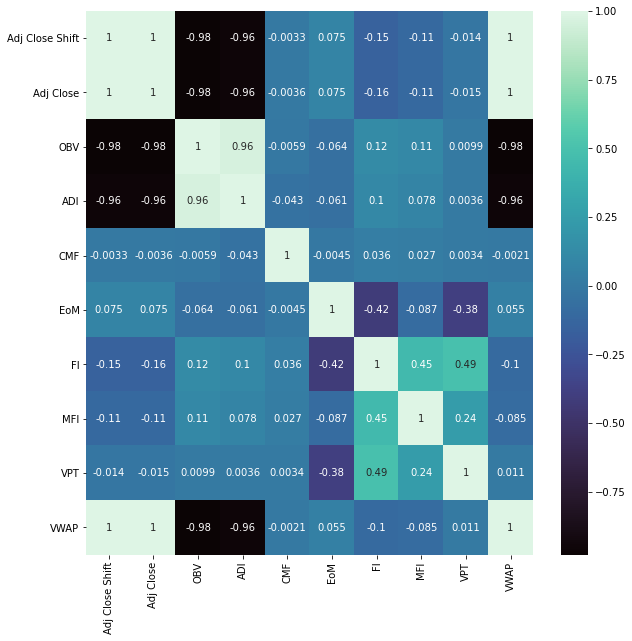

In [57]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_volume.corr(),annot=True,cmap='mako')

In [58]:
#Going to drop VWAP
df_volume.drop(columns=['VWAP'],inplace=True)

C:\Users\Jonat\anaconda3\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [59]:
#Separating Data
X = df_volume.drop(columns=['Adj Close Shift'])
y = df_volume['Adj Close Shift']
X_train_columns = X.columns

R^2 Score: 0.995500986600485
Mean Absolute Error: 0.08304252556186578
Mean Squared Error: 0.014242634621099409


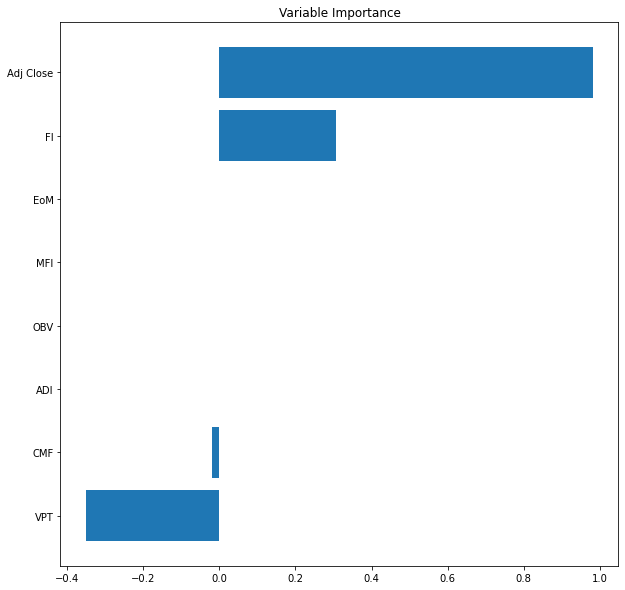

R^2 Score: 0.9939214910552632
Mean Absolute Error: 0.06676098090596422
Mean Squared Error: 0.009473988915218239


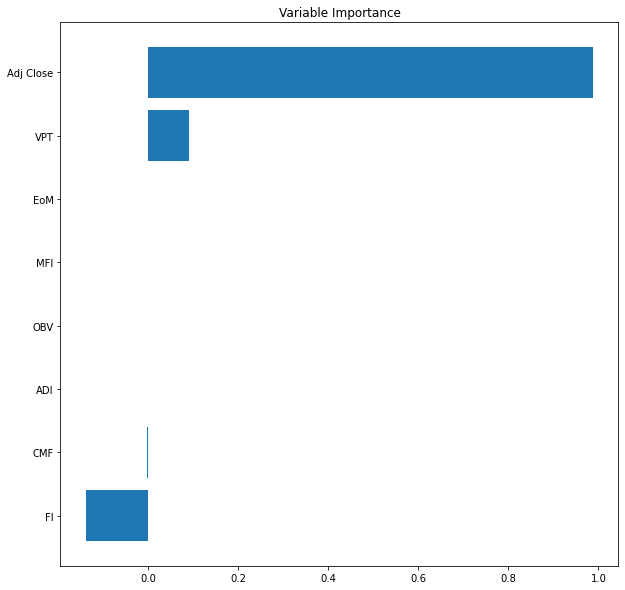

R^2 Score: 0.9942728016156518
Mean Absolute Error: 0.0973382509238291
Mean Squared Error: 0.018938616002457588


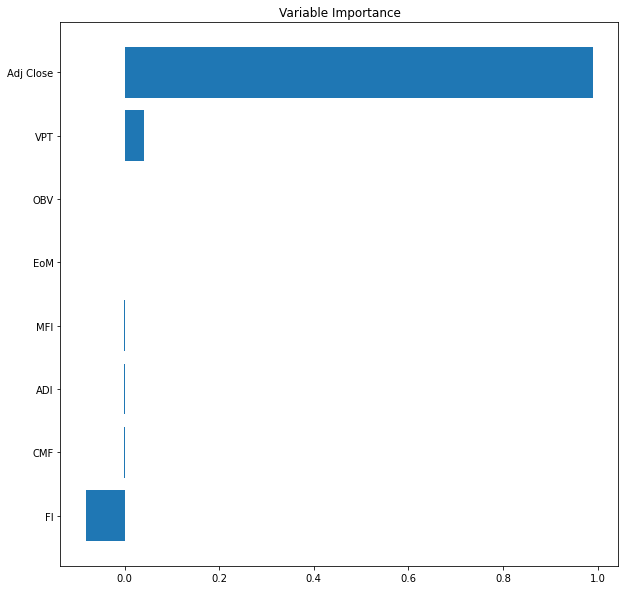

R^2 Score: 0.9983429745872957
Mean Absolute Error: 0.14403867031850373
Mean Squared Error: 0.043511377809188144


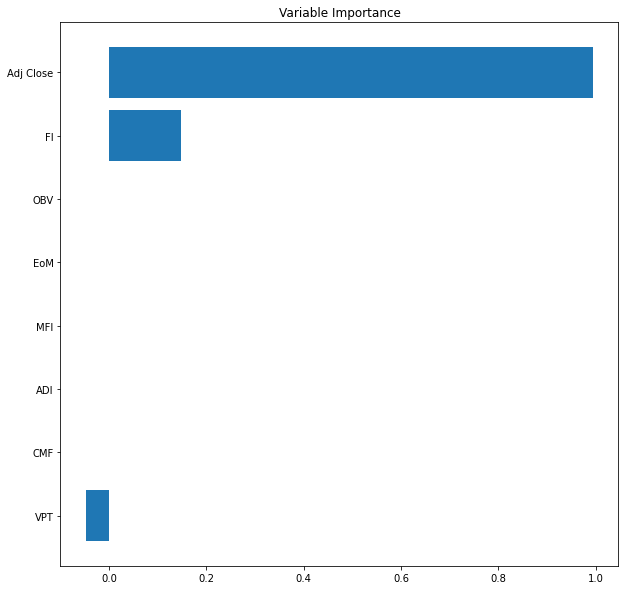

R^2 Score: 0.9992294786170928
Mean Absolute Error: 0.31165655800247494
Mean Squared Error: 0.21221864799927534


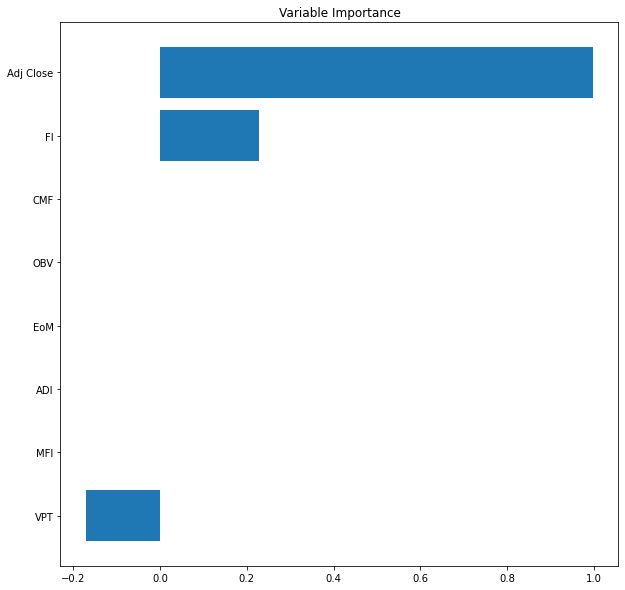

In [60]:
#OLS

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    rModel = linear_model.LinearRegression()
    rModel.fit(X_tr,y_tr)
    
    y_pred = rModel.predict(X_ts)
    
    r2 = rModel.score(X_tr,y_tr)
    mean_abs_error = mean_absolute_error(y_ts,y_pred)
    mean_sqr_error = mean_squared_error(y_ts,y_pred)
    print('R^2 Score:',r2)
    print('Mean Absolute Error:',mean_abs_error)
    print('Mean Squared Error:',mean_sqr_error)


    lm_imp = rModel.coef_
    sorted_idx = np.argsort(lm_imp)
    num_features = np.arange(sorted_idx.shape[0])
    plt.figure(figsize=(10,10))
    plt.barh(num_features,lm_imp[sorted_idx],align='center')
    plt.yticks(num_features, X_train_columns[sorted_idx])
    plt.title('Variable Importance')
    plt.show()

Alpha is: 0.1
R^2 Score: 0.9954956365260813
Mean Absolute Error: 0.08362053880461993
Mean Squared Error: 0.014419524266799684


C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.54665e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


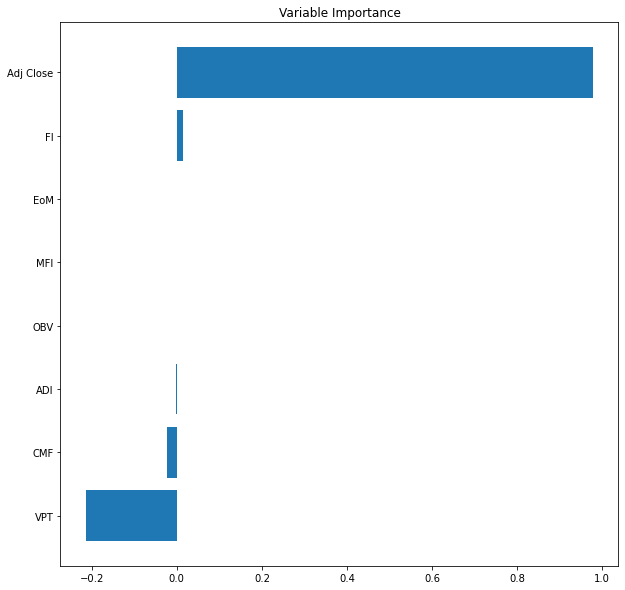

Alpha is: 1.0
R^2 Score: 0.9954547396094579
Mean Absolute Error: 0.08780136092622103
Mean Squared Error: 0.015490991673949572


C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39779e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


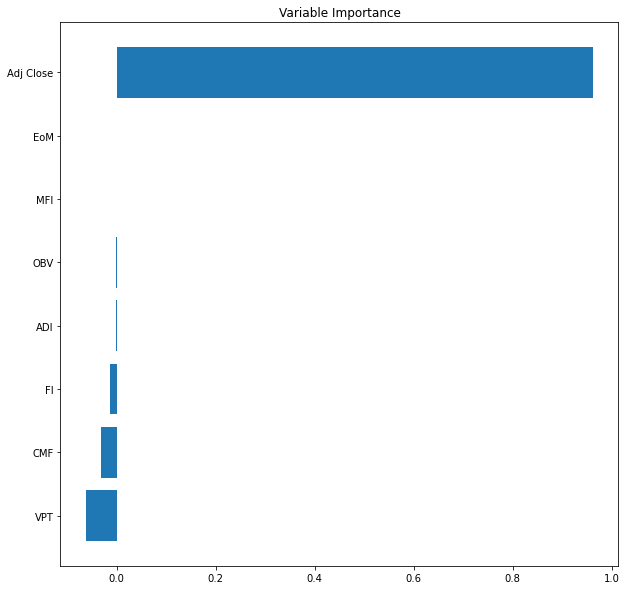

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.41517e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 10.0
R^2 Score: 0.9937751753907004
Mean Absolute Error: 0.16584215563152624
Mean Squared Error: 0.042440979852102344


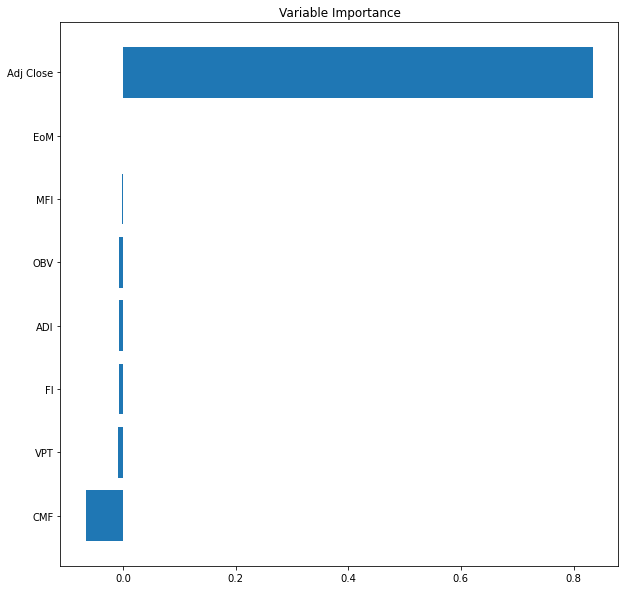

Alpha is: 0.1
R^2 Score: 0.9939211488772769
Mean Absolute Error: 0.06685574880438905
Mean Squared Error: 0.009487677957434186


C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.52922e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


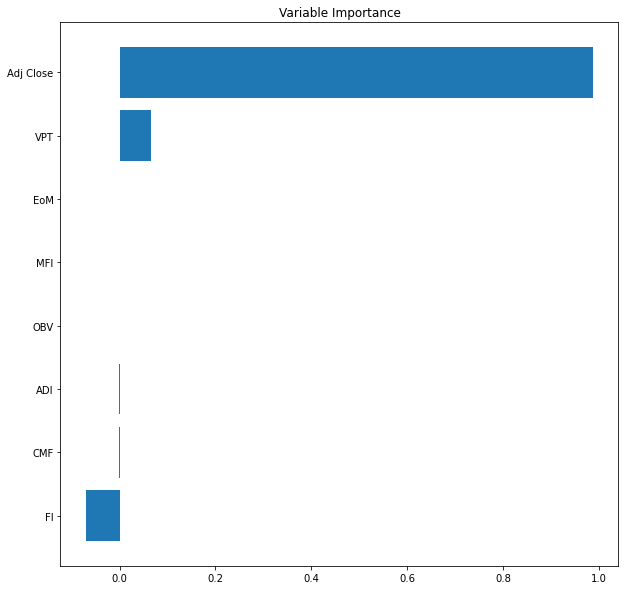

Alpha is: 1.0
R^2 Score: 0.9939189989479683
Mean Absolute Error: 0.06766044683719395
Mean Squared Error: 0.009664572409605497


C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38466e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


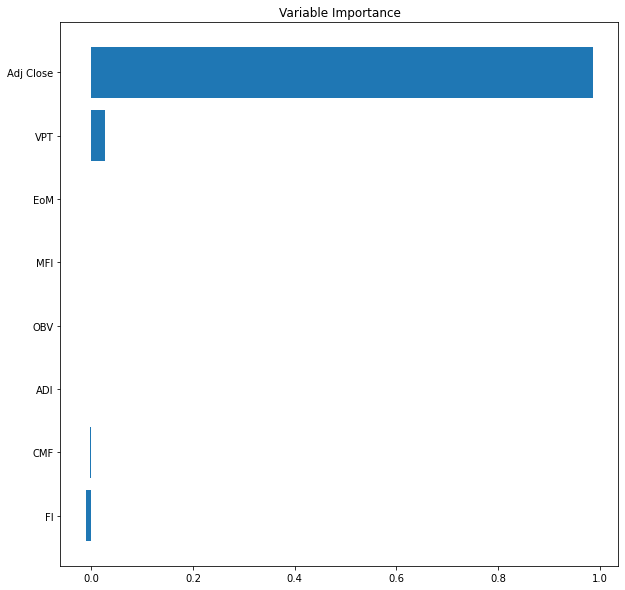

Alpha is: 10.0
R^2 Score: 0.9938227533304088
Mean Absolute Error: 0.08639415102591133
Mean Squared Error: 0.013599863450378108


C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.33731e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


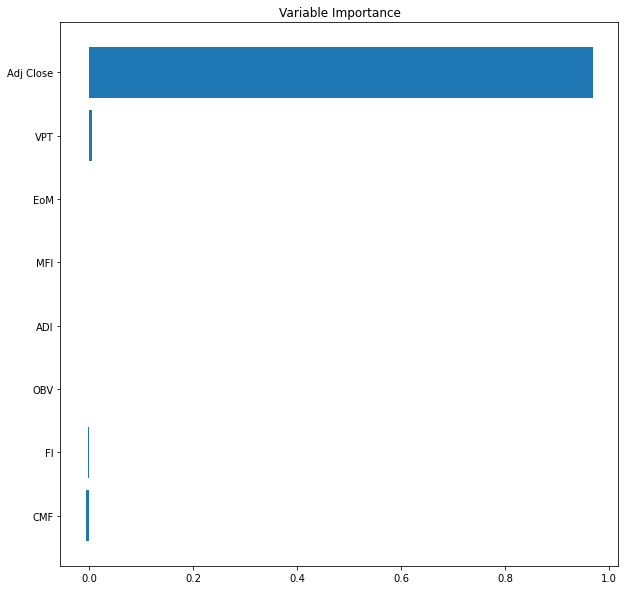

Alpha is: 0.1
R^2 Score: 0.9942727391376563
Mean Absolute Error: 0.0973325509267745
Mean Squared Error: 0.018934757177241697


C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.20572e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


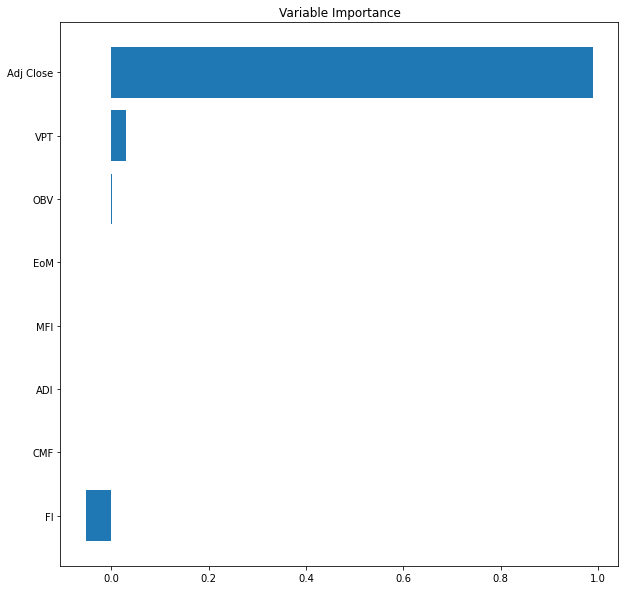

Alpha is: 1.0
R^2 Score: 0.9942721517878429
Mean Absolute Error: 0.09764559415278422
Mean Squared Error: 0.01902764922322882


C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.41448e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


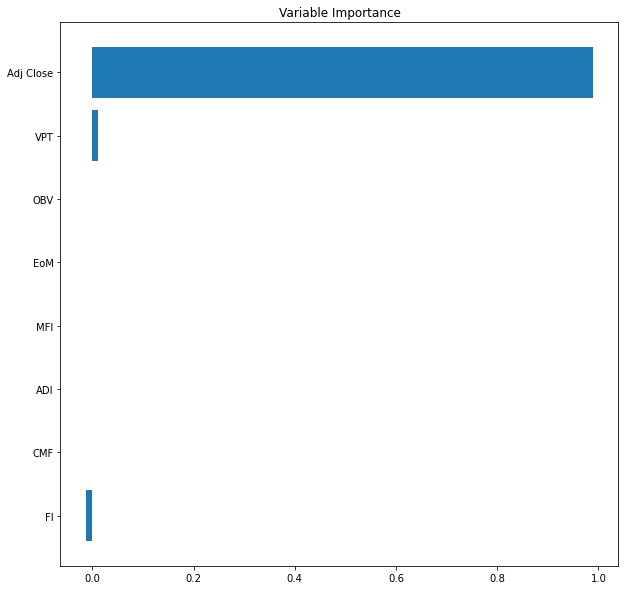

Alpha is: 10.0
R^2 Score: 0.9942429581377319
Mean Absolute Error: 0.10313742958267866
Mean Squared Error: 0.02063400643688955


C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.3105e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


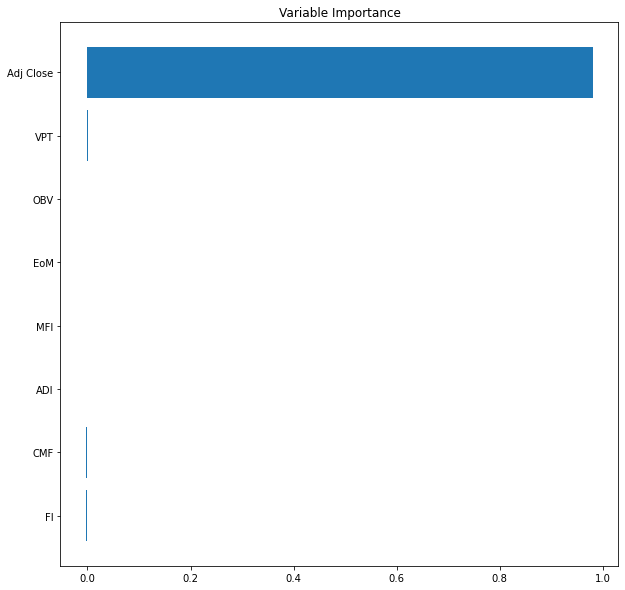

Alpha is: 0.1
R^2 Score: 0.9983429527206437
Mean Absolute Error: 0.14405221210710972
Mean Squared Error: 0.04352639680664313


C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.4099e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


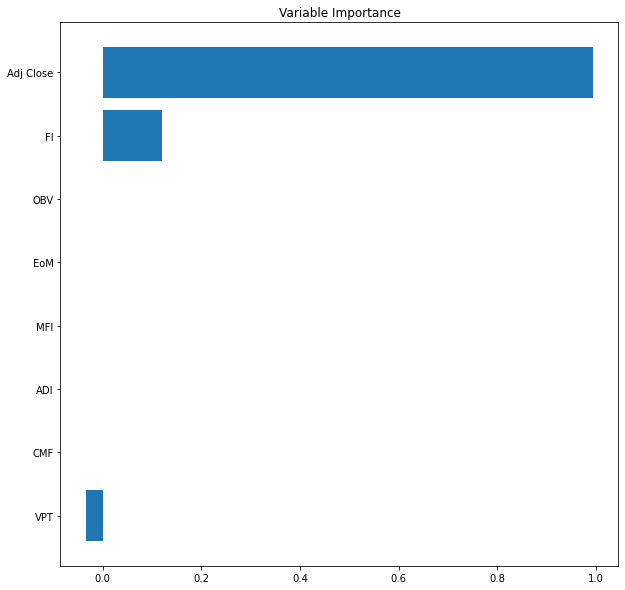

Alpha is: 1.0
R^2 Score: 0.9983426737153194
Mean Absolute Error: 0.14427250175692902
Mean Squared Error: 0.043628774779026123


C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.59474e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


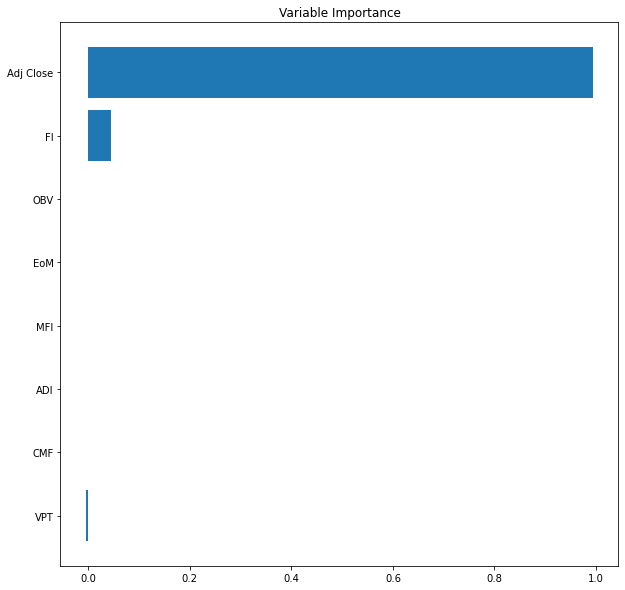

Alpha is: 10.0
R^2 Score: 0.9983403121014721
Mean Absolute Error: 0.14709581794775686
Mean Squared Error: 0.044570027482607855


C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.27006e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


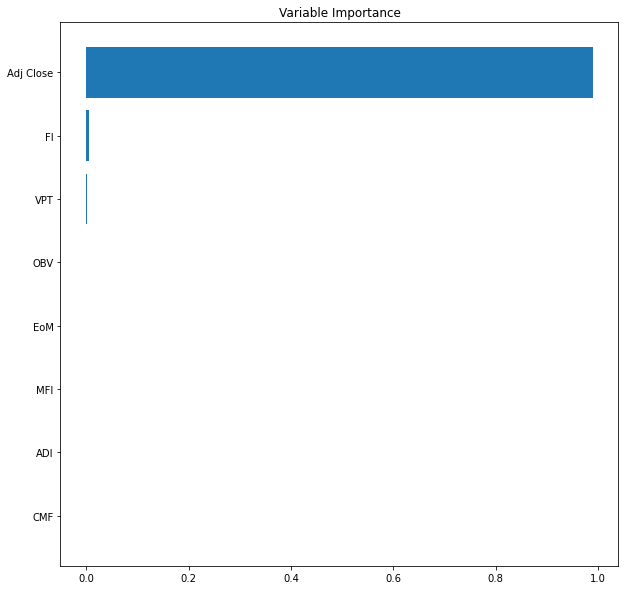

Alpha is: 0.1
R^2 Score: 0.9992294685092566
Mean Absolute Error: 0.3117204819832414
Mean Squared Error: 0.2122538224214573


C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.86844e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


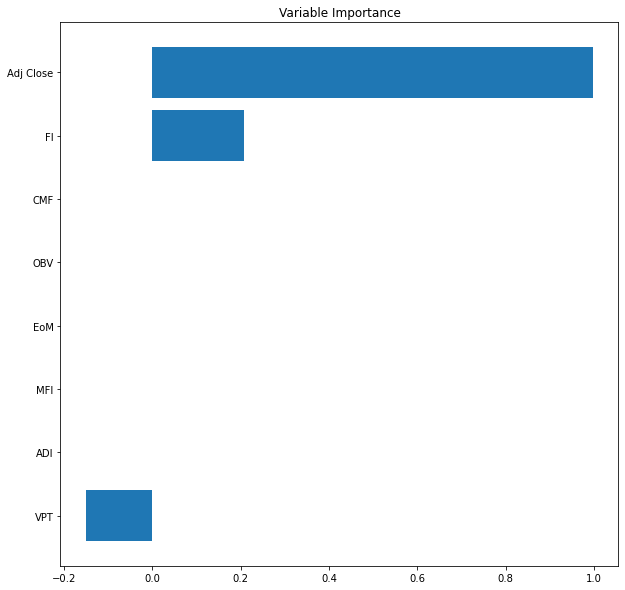

Alpha is: 1.0
R^2 Score: 0.9992292051035069
Mean Absolute Error: 0.31206768334133433
Mean Squared Error: 0.21248979267650467


C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.74224e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


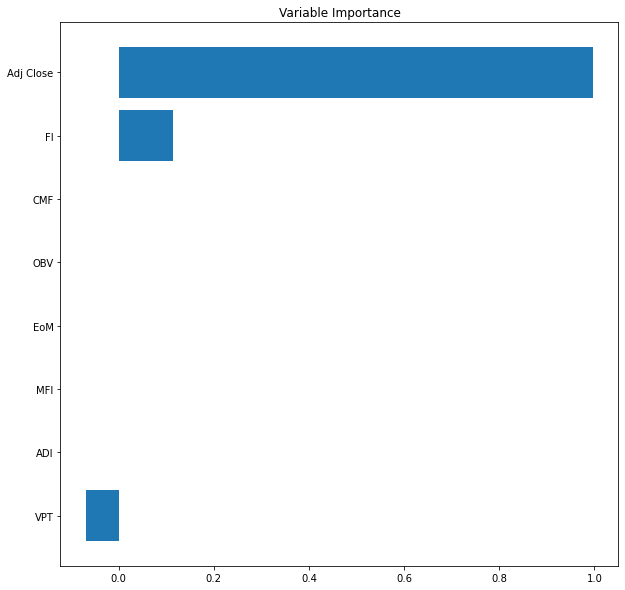

Alpha is: 10.0
R^2 Score: 0.9992283977654207
Mean Absolute Error: 0.3129183748634077
Mean Squared Error: 0.2128552252165213


C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.04001e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


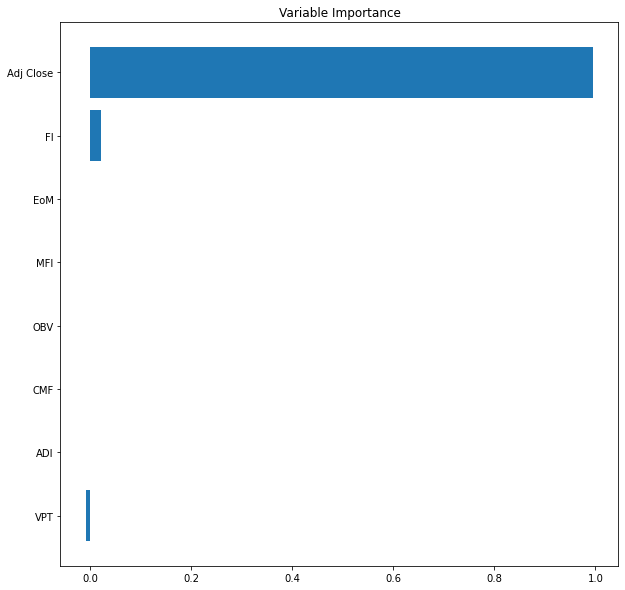

In [61]:
#Ridge Model

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    

    for alpha in [0.1, 1.0, 10.0]:
        print('Alpha is:',alpha)
        ridge_model = linear_model.Ridge(alpha)
        ridge_model.fit(X_tr,y_tr)
        
        ridge_y_pred = ridge_model.predict(X_ts)

        r2 = ridge_model.score(X_tr,y_tr)
        mean_abs_error = mean_absolute_error(y_ts,ridge_y_pred)
        mean_sqr_error = mean_squared_error(y_ts,ridge_y_pred)
        print('R^2 Score:',r2)
        print('Mean Absolute Error:',mean_abs_error)
        print('Mean Squared Error:',mean_sqr_error)

        lm_imp = ridge_model.coef_
        sorted_idx = np.argsort(lm_imp)
        num_features = np.arange(sorted_idx.shape[0])
        plt.figure(figsize=(10,10))
        plt.barh(num_features,lm_imp[sorted_idx],align='center')
        plt.yticks(num_features, X_train_columns[sorted_idx])
        plt.title('Variable Importance')
        plt.show()

Best Parameters:{'max_depth': 2, 'n_estimators': 4}
R^2 Score: 0.9585180025490719
Mean Absolute Error: 0.5815353406137445
Mean Squared Error: 376.7580288754786


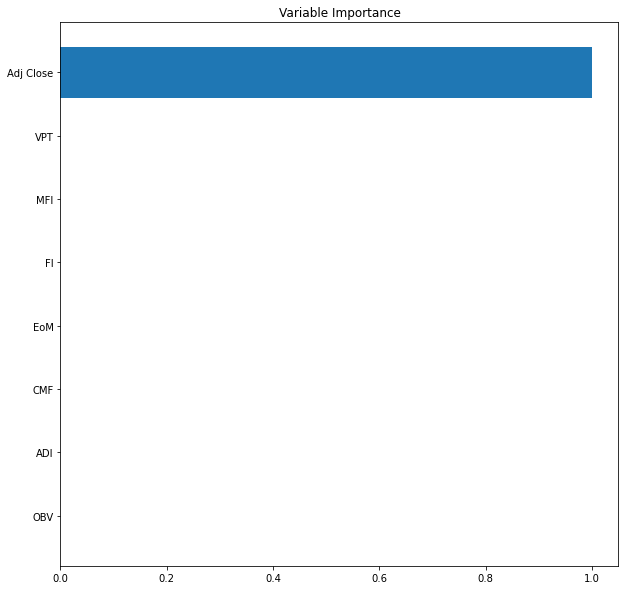

Best Parameters:{'max_depth': 2, 'n_estimators': 2}
R^2 Score: 0.9333647849008003
Mean Absolute Error: 0.2270502781211236
Mean Squared Error: 340.82509580603323


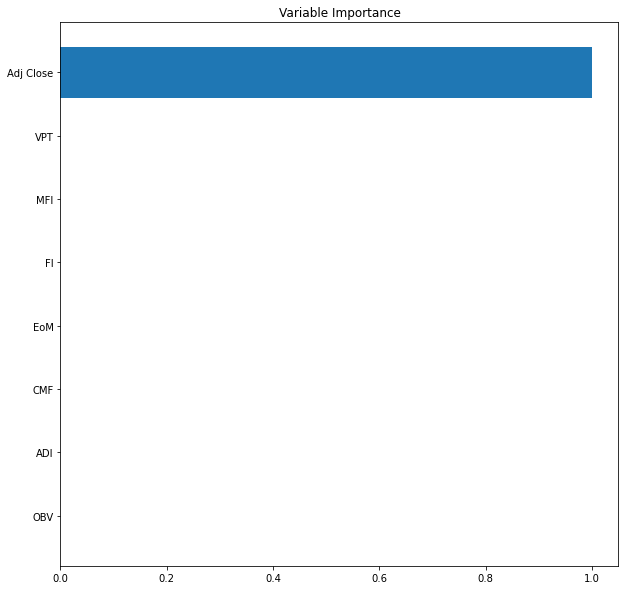

Best Parameters:{'max_depth': 2, 'n_estimators': 4}
R^2 Score: 0.9106770847112159
Mean Absolute Error: 3.7477030238280777
Mean Squared Error: 204.8686117763319


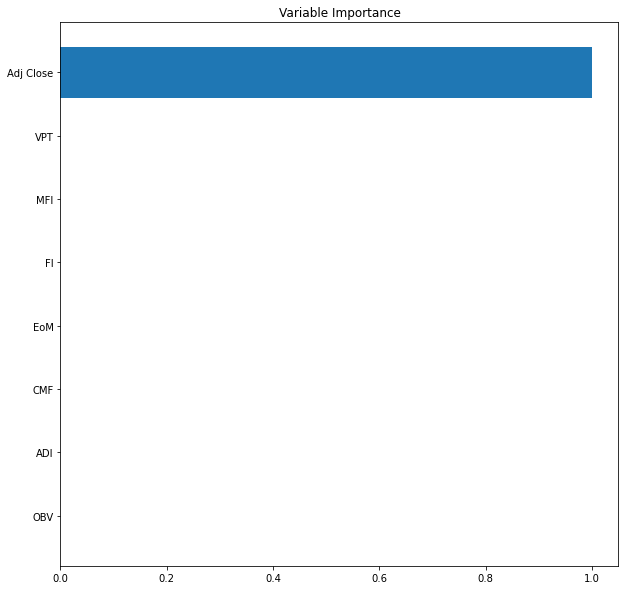

Best Parameters:{'max_depth': 2, 'n_estimators': 3}
R^2 Score: 0.9287426011491602
Mean Absolute Error: 4.946737188229852
Mean Squared Error: 66.50677534260304


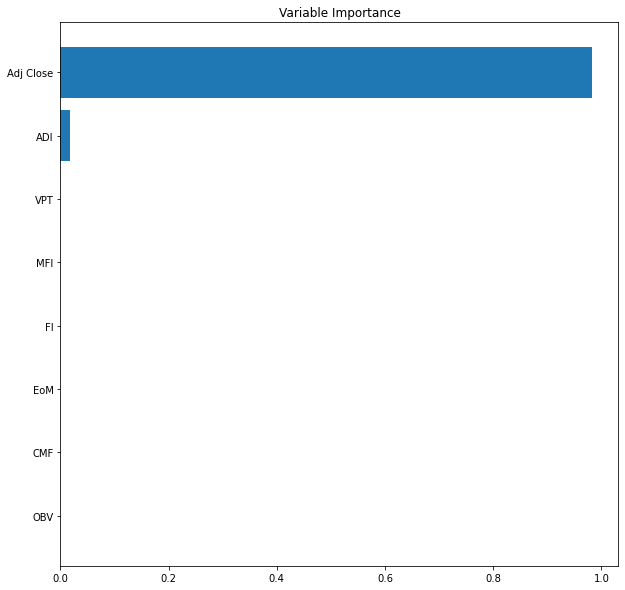

Best Parameters:{'max_depth': 2, 'n_estimators': 2}
R^2 Score: 0.9346465738341295
Mean Absolute Error: 7.211458784334712
Mean Squared Error: 0.2128552252165213


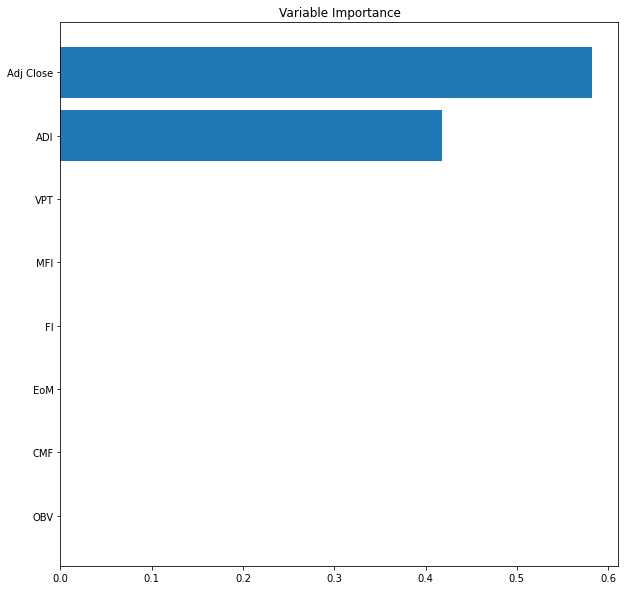

In [62]:
#Random Forest

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    
    random_grid = {'n_estimators':np.arange(1,5),'max_depth':np.arange(1,3)}
    rfr = RandomForestRegressor(random_state=49)
    rfr_cv = GridSearchCV(rfr,random_grid,cv=5)
    rfr_cv.fit(X_tr,y_tr)
    print('Best Parameters:' + str(rfr_cv.best_params_))
    
    rfr = RandomForestRegressor(n_estimators = rfr_cv.best_params_['n_estimators'],max_depth = rfr_cv.best_params_['max_depth'],random_state=49)
    rfr.fit(X_tr,y_tr)
    
    y_pred_rfr = rfr.predict(X_ts)
    
    r2 = rfr.score(X_tr,y_tr)
    mean_abs_error = mean_absolute_error(y_ts,y_pred_rfr)
    mean_sqr_error = mean_squared_error(y_ts,ridge_y_pred)
    print('R^2 Score:',r2)
    print('Mean Absolute Error:',mean_abs_error)
    print('Mean Squared Error:',mean_sqr_error)

    rfr_imp = rfr.feature_importances_
    sorted_idx = np.argsort(rfr_imp)
    num_features = np.arange(sorted_idx.shape[0])
    plt.figure(figsize=(10,10))
    plt.barh(num_features,rfr_imp[sorted_idx],align='center')
    plt.yticks(num_features, X_train_columns[sorted_idx])
    plt.title('Variable Importance')
    plt.show()

Now let's combined the best of each into a df and see how it performs

In [63]:
df_combined = df[['Adj Close Shift','Adj Close','Stoch RSI In','DPO','Ulcer','FI']]

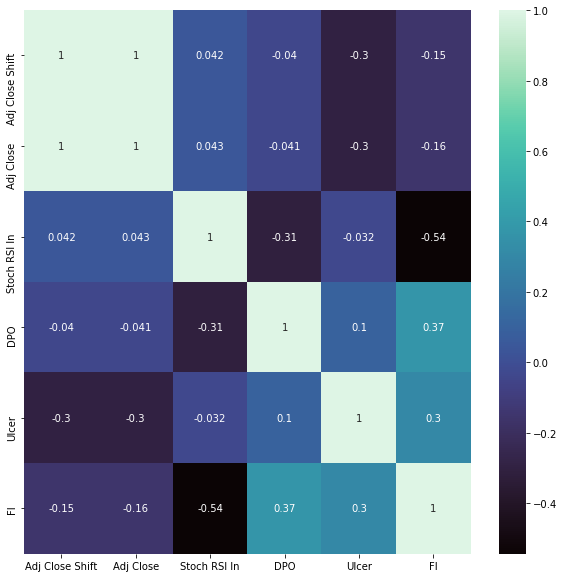

In [64]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_combined.corr(),annot=True,cmap='mako')

In [65]:
#Separating Data
X = df_combined.drop(columns=['Adj Close Shift'])
y = df_combined['Adj Close Shift']
X_train_columns = X.columns

R^2 Score: 0.9954354151899351
Mean Absolute Error: 0.08025891045405871
Mean Sqaured Error: 0.012971169056880944


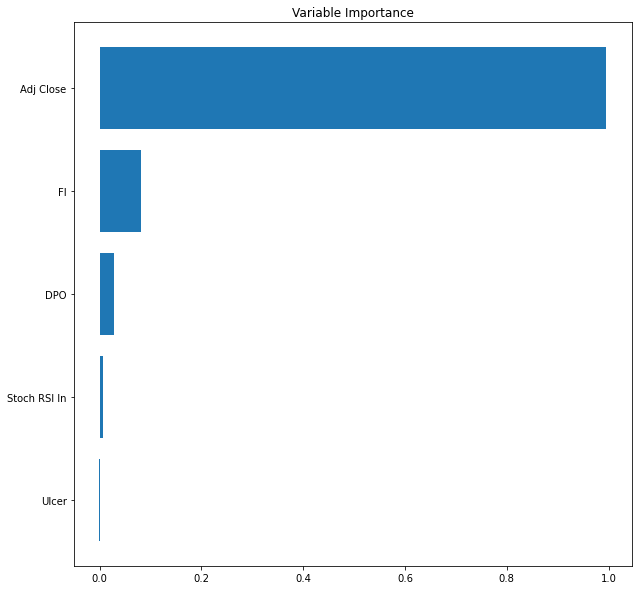

R^2 Score: 0.9939069044232358
Mean Absolute Error: 0.06600774476334767
Mean Sqaured Error: 0.009227658956123106


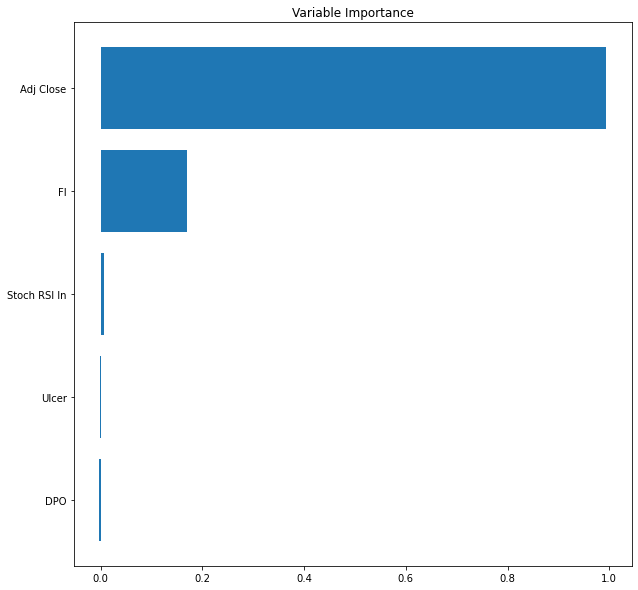

R^2 Score: 0.9942553340969225
Mean Absolute Error: 0.0961772576086598
Mean Sqaured Error: 0.018597021399058868


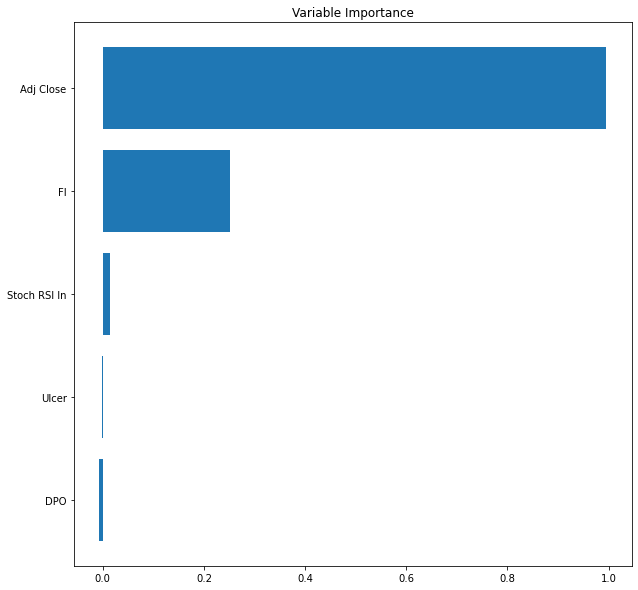

R^2 Score: 0.9983411409411451
Mean Absolute Error: 0.14304094345106108
Mean Sqaured Error: 0.04320396592810136


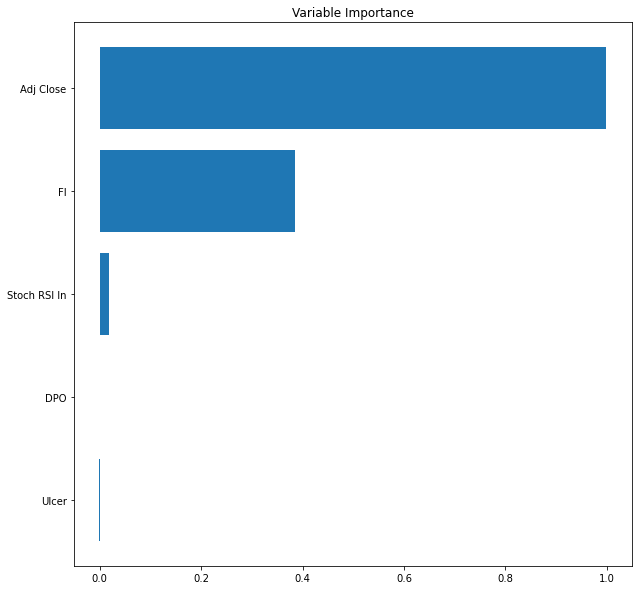

R^2 Score: 0.9992281577131108
Mean Absolute Error: 0.31038974775152456
Mean Sqaured Error: 0.211896681115629


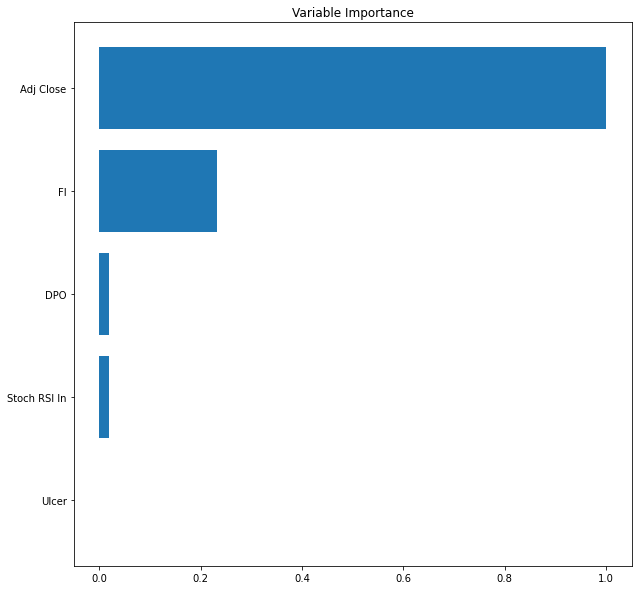

In [66]:
#OLS

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    
    rModel = linear_model.LinearRegression()
    rModel.fit(X_tr,y_tr)
    
    y_pred = rModel.predict(X_ts)
    
    r2 = rModel.score(X_tr,y_tr)
    mean_abs_error = mean_absolute_error(y_ts,y_pred)
    mean_sqr_error = mean_squared_error(y_ts,y_pred)
    print('R^2 Score:',r2)
    print('Mean Absolute Error:',mean_abs_error)
    print('Mean Sqaured Error:',mean_sqr_error)

    lm_imp = rModel.coef_
    sorted_idx = np.argsort(lm_imp)
    num_features = np.arange(sorted_idx.shape[0])
    plt.figure(figsize=(10,10))
    plt.barh(num_features,lm_imp[sorted_idx],align='center')
    plt.yticks(num_features, X_train_columns[sorted_idx])
    plt.title('Variable Importance')
    plt.show()

Alpha is: 0.1
R^2 Score: 0.9954351912726229
Mean Absolute Error: 0.08048197618139998
Mean Sqaured Error: 0.013035339454580148


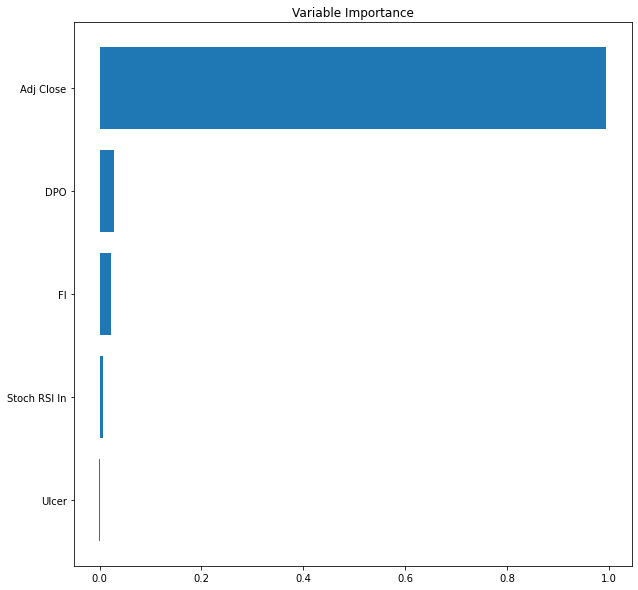

Alpha is: 1.0
R^2 Score: 0.9954324195077613
Mean Absolute Error: 0.08048197618139998
Mean Sqaured Error: 0.013035339454580148


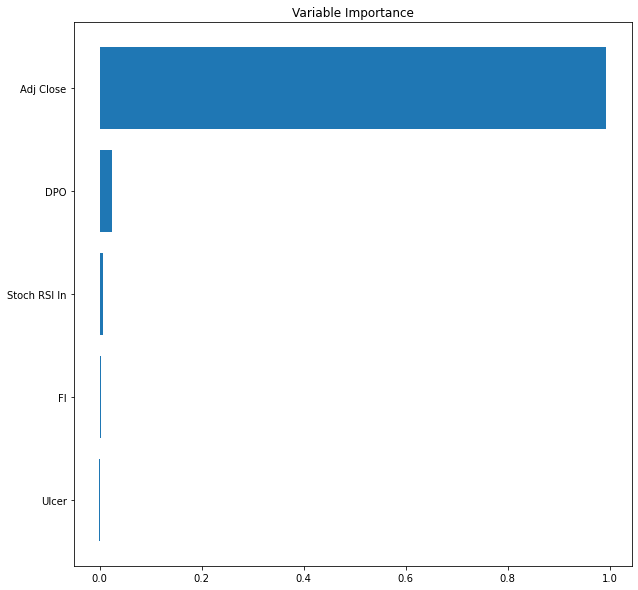

Alpha is: 10.0
R^2 Score: 0.9951892269524286
Mean Absolute Error: 0.08048197618139998
Mean Sqaured Error: 0.013035339454580148


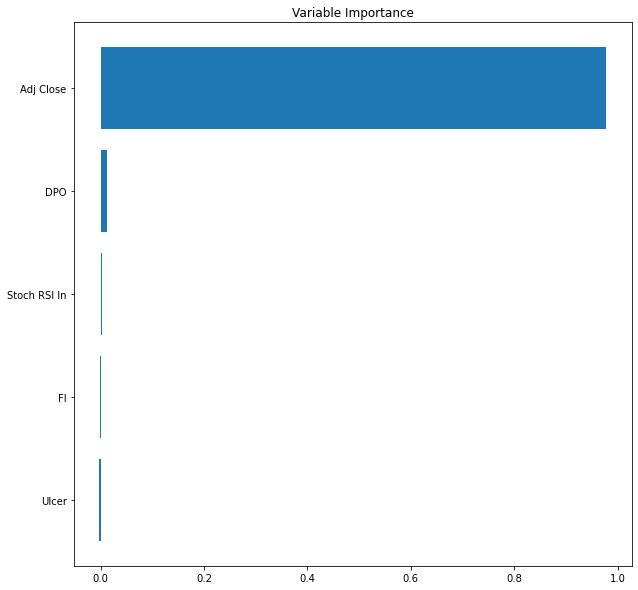

Alpha is: 0.1
R^2 Score: 0.99390653668988
Mean Absolute Error: 0.06543595755496609
Mean Sqaured Error: 0.009183034446126304


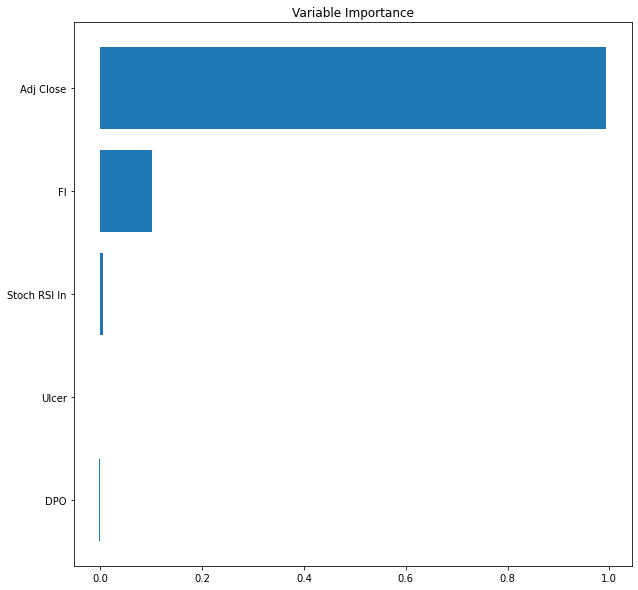

Alpha is: 1.0
R^2 Score: 0.9939048807900953
Mean Absolute Error: 0.06543595755496609
Mean Sqaured Error: 0.009183034446126304


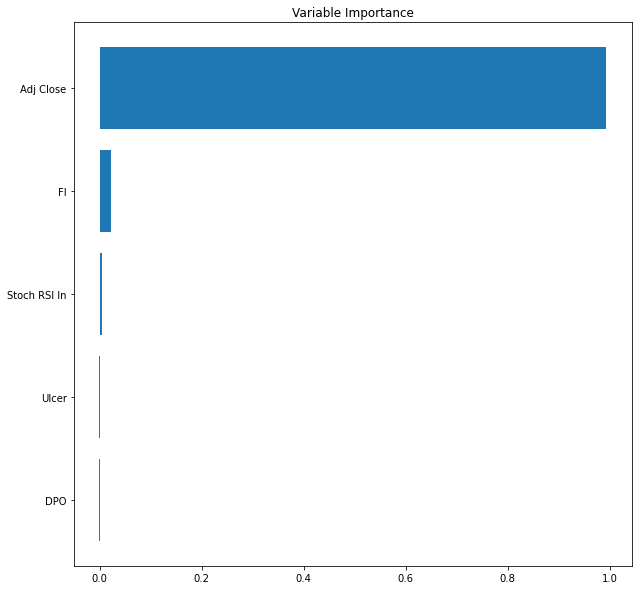

Alpha is: 10.0
R^2 Score: 0.9938749548423744
Mean Absolute Error: 0.06543595755496609
Mean Sqaured Error: 0.009183034446126304


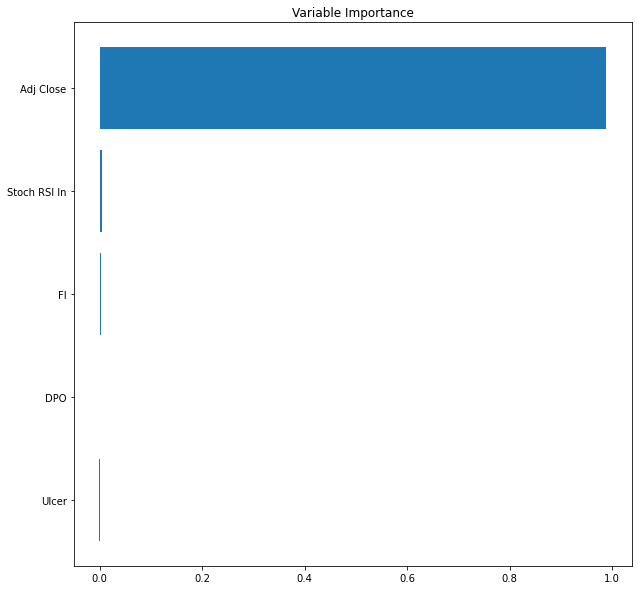

Alpha is: 0.1
R^2 Score: 0.9942548973860698
Mean Absolute Error: 0.09526248340563542
Mean Sqaured Error: 0.018189157403477343


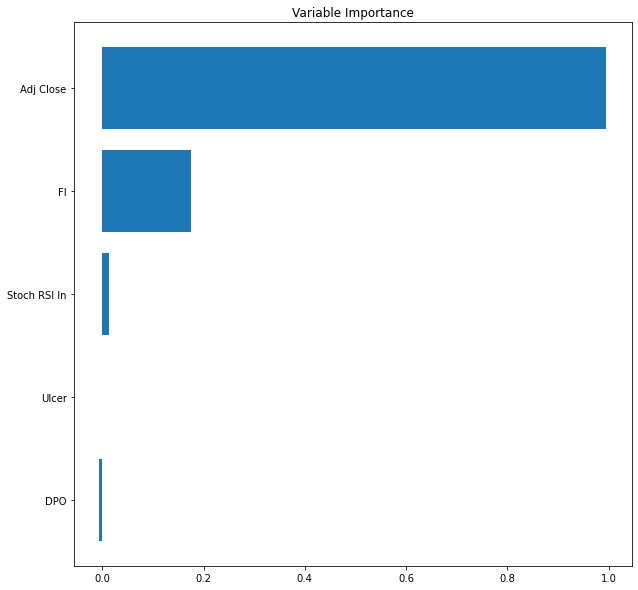

Alpha is: 1.0
R^2 Score: 0.994252066262758
Mean Absolute Error: 0.09526248340563542
Mean Sqaured Error: 0.018189157403477343


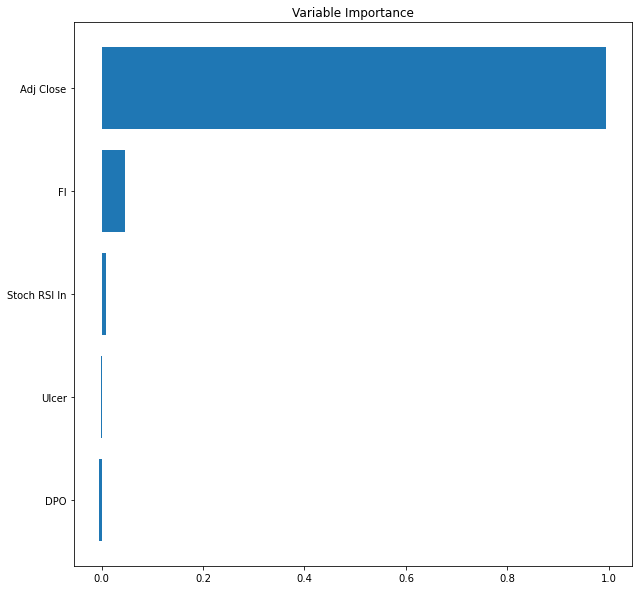

Alpha is: 10.0
R^2 Score: 0.9942385142629598
Mean Absolute Error: 0.09526248340563542
Mean Sqaured Error: 0.018189157403477343


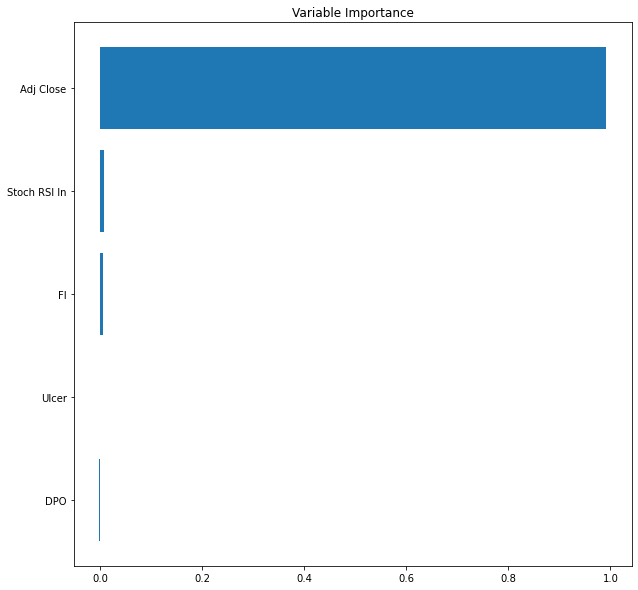

Alpha is: 0.1
R^2 Score: 0.9983410240871855
Mean Absolute Error: 0.1408079466392901
Mean Sqaured Error: 0.04252609320202935


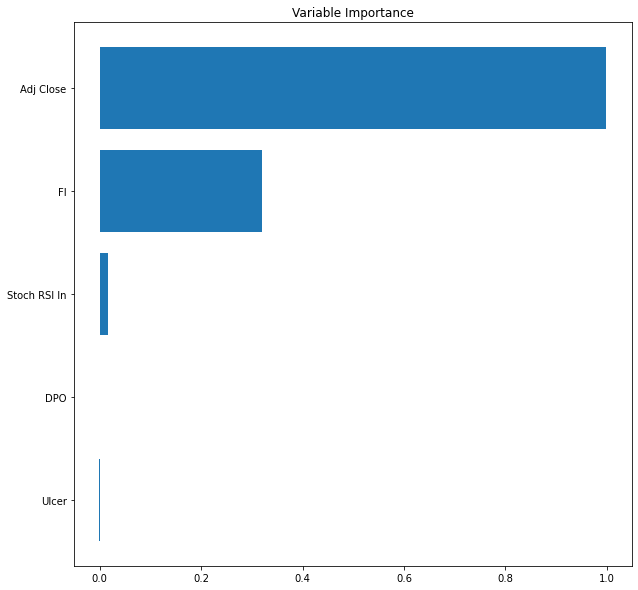

Alpha is: 1.0
R^2 Score: 0.9983393163090768
Mean Absolute Error: 0.1408079466392901
Mean Sqaured Error: 0.04252609320202935


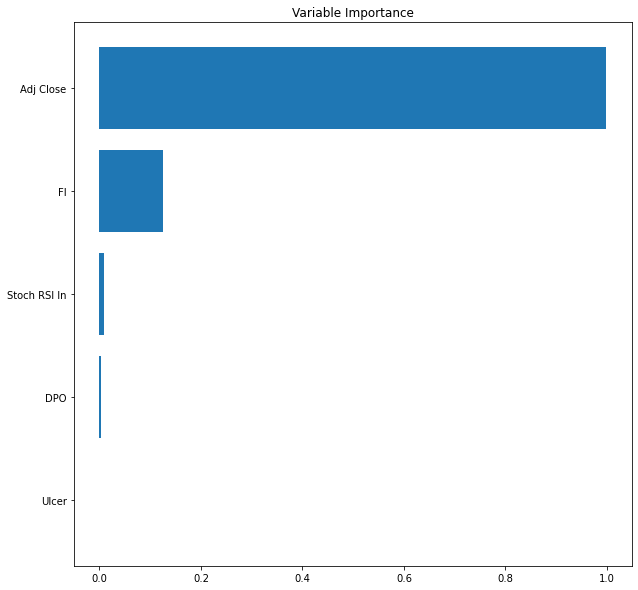

Alpha is: 10.0
R^2 Score: 0.9983371086303726
Mean Absolute Error: 0.1408079466392901
Mean Sqaured Error: 0.04252609320202935


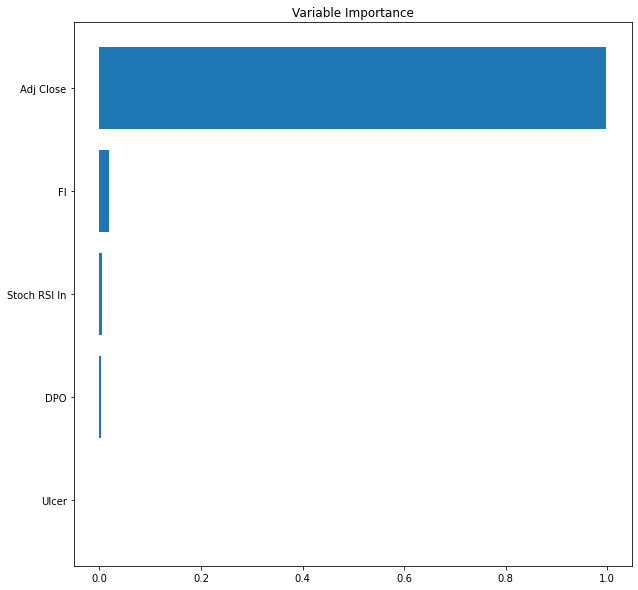

Alpha is: 0.1
R^2 Score: 0.9992281530620291
Mean Absolute Error: 0.31038974775152456
Mean Sqaured Error: 0.211896681115629


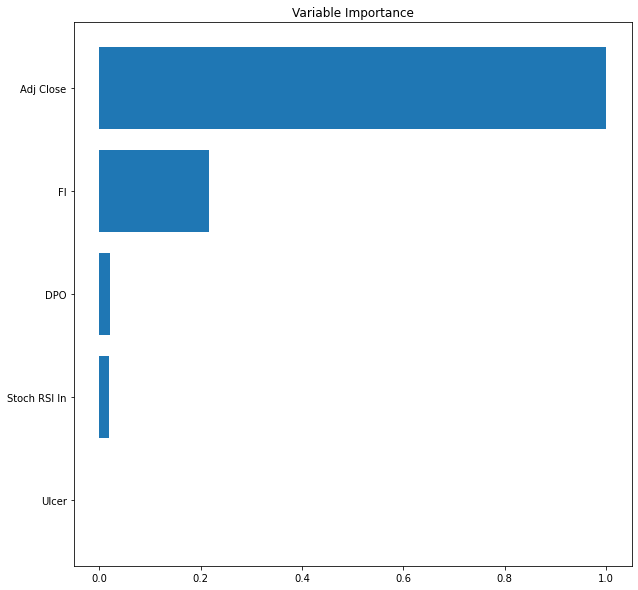

Alpha is: 1.0
R^2 Score: 0.9992279807300376
Mean Absolute Error: 0.31038974775152456
Mean Sqaured Error: 0.211896681115629


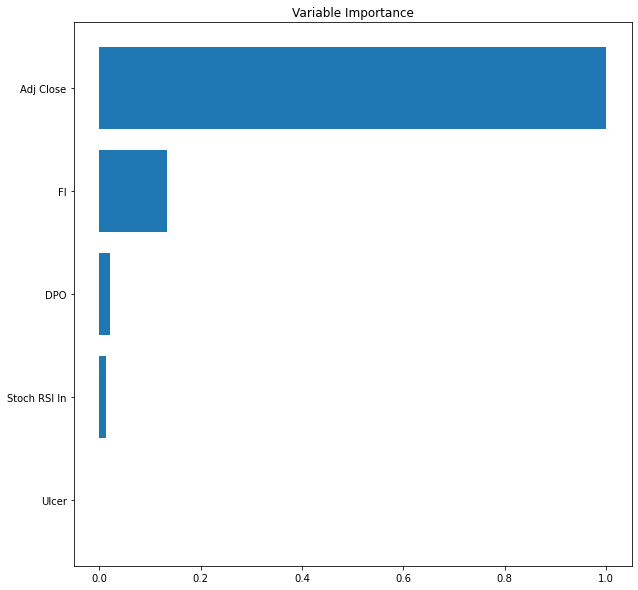

Alpha is: 10.0
R^2 Score: 0.9992273726923928
Mean Absolute Error: 0.31038974775152456
Mean Sqaured Error: 0.211896681115629


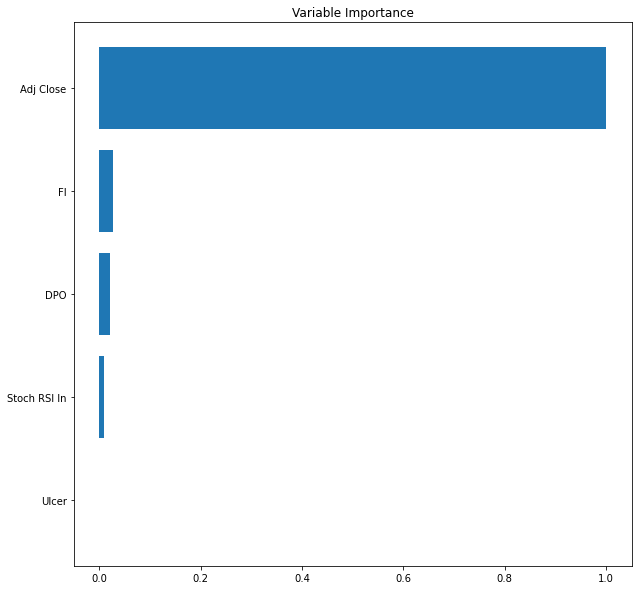

In [67]:
#Ridge Model

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    

    for alpha in [0.1, 1.0, 10.0]:
        print('Alpha is:',alpha)
        ridge_model = linear_model.Ridge(alpha)
        ridge_model.fit(X_tr,y_tr)
        
        ridge_y_pred = rModel.predict(X_ts)
        
        r2 = ridge_model.score(X_tr,y_tr)
        mean_abs_error = mean_absolute_error(y_ts,ridge_y_pred)
        mean_sqr_error = mean_squared_error(y_ts,ridge_y_pred)
        print('R^2 Score:',r2)
        print('Mean Absolute Error:',mean_abs_error)
        print('Mean Sqaured Error:',mean_sqr_error)
        
        lm_imp = ridge_model.coef_
        sorted_idx = np.argsort(lm_imp)
        num_features = np.arange(sorted_idx.shape[0])
        plt.figure(figsize=(10,10))
        plt.barh(num_features,lm_imp[sorted_idx],align='center')
        plt.yticks(num_features, X_train_columns[sorted_idx])
        plt.title('Variable Importance')
        plt.show()

Best Parameters:{'max_depth': 4, 'n_estimators': 1}
R^2 Score: 0.9925594617757049
Mean Absolute Error: 0.2884198946405269
Mean Sqaured Error: 0.2464500087047722


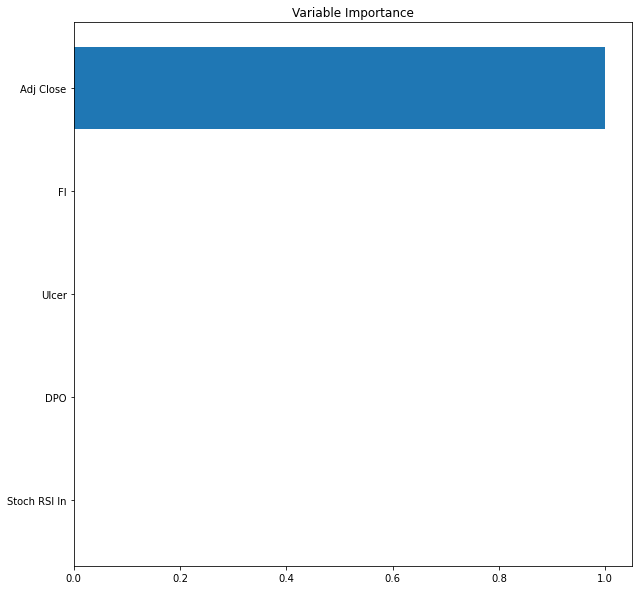

Best Parameters:{'max_depth': 8, 'n_estimators': 1}
R^2 Score: 0.9947088178294619
Mean Absolute Error: 0.12600613684364514
Mean Sqaured Error: 0.02681402797819147


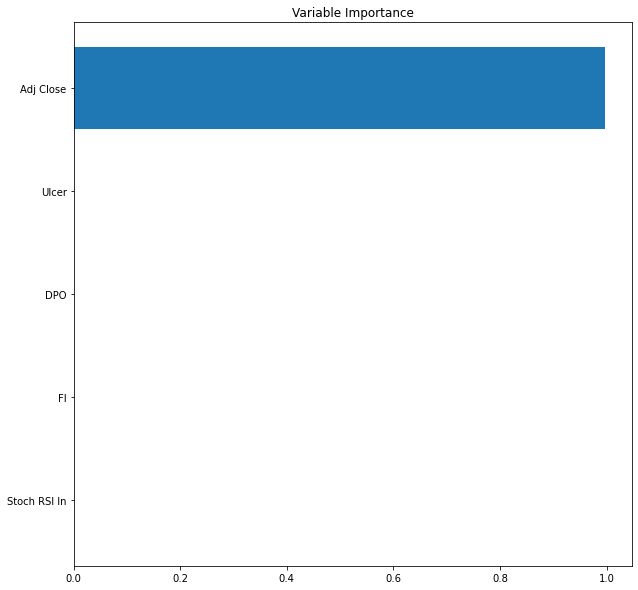

Best Parameters:{'max_depth': 5, 'n_estimators': 4}
R^2 Score: 0.9944466015052299
Mean Absolute Error: 2.510664636490779
Mean Sqaured Error: 8.619027712978628


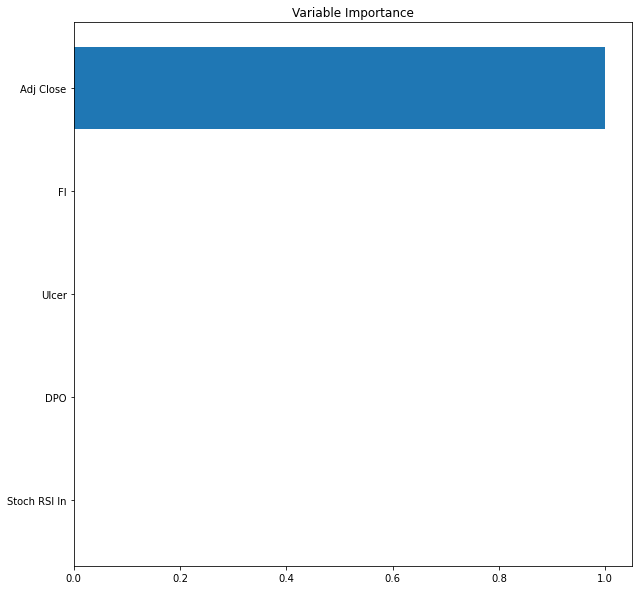

Best Parameters:{'max_depth': 7, 'n_estimators': 1}
R^2 Score: 0.9984779599972796
Mean Absolute Error: 3.972259403510787
Mean Sqaured Error: 21.51248280974813


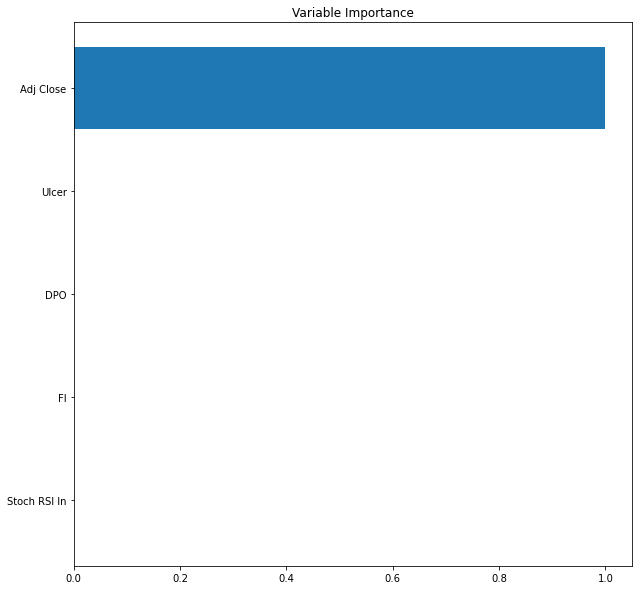

Best Parameters:{'max_depth': 7, 'n_estimators': 9}
R^2 Score: 0.9994791583823023
Mean Absolute Error: 2.822644679298396
Mean Sqaured Error: 14.536684373875776


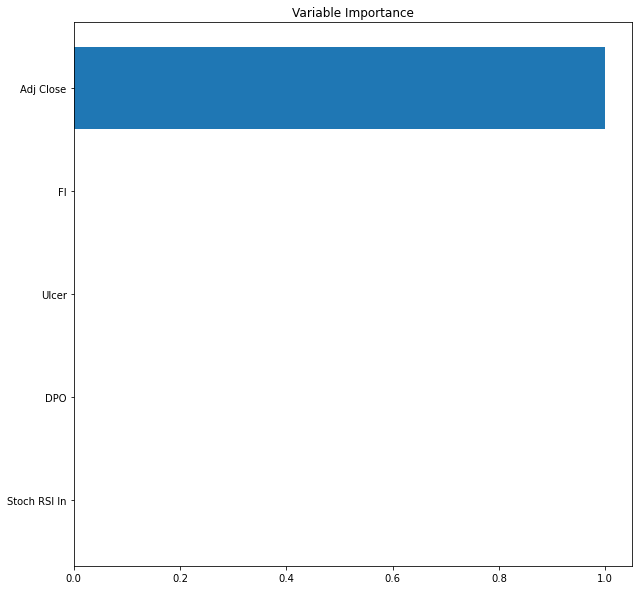

In [72]:
#Random Forest

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    
    random_grid = {'n_estimators':np.arange(1,5),'max_depth':np.arange(1,3)}
    rfr = RandomForestRegressor(random_state=49)
    rfr_cv = GridSearchCV(rfr,random_grid,cv=5)
    rfr_cv.fit(X_tr,y_tr)
    print('Best Parameters:' + str(rfr_cv.best_params_))
    
    rfr = RandomForestRegressor(n_estimators = rfr_cv.best_params_['n_estimators'],max_depth = rfr_cv.best_params_['max_depth'],random_state=49)
    rfr.fit(X_tr,y_tr)
    
    y_pred_rfr = rfr.predict(X_ts)
    
    
    r2 = rfr.score(X_tr,y_tr)
    mean_abs_error = mean_absolute_error(y_ts,y_pred_rfr)
    mean_sqr_error = mean_squared_error(y_ts,y_pred_rfr)
    print('R^2 Score:',r2)
    print('Mean Absolute Error:',mean_abs_error)
    print('Mean Sqaured Error:',mean_sqr_error)


    rfr_imp = rfr.feature_importances_
    sorted_idx = np.argsort(rfr_imp)
    num_features = np.arange(sorted_idx.shape[0])
    plt.figure(figsize=(10,10))
    plt.barh(num_features,rfr_imp[sorted_idx],align='center')
    plt.yticks(num_features, X_train_columns[sorted_idx])
    plt.title('Variable Importance')
    plt.show()